<h1><center>Predicting Drug Response in Tumor Cell Lines 
</center></h1>



### Import Packages

In [ ]:
%load_ext autoreload
%autoreload 2
import ml_functions as mlf  
import sys
import warnings
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
%matplotlib inline

In [2]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Part 1.   “By Drug” Tumor Dose Response 

### Read in Data (Starting with CCLE Study)

In [3]:
CCLE_cell_line = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/cell_lines/CCLE_cl', sep = '\t')

In [4]:
CCLE_cell_line.head()

ID     NAME CLEAN_NAME
0    CCLE.22RV1    22RV1      22RV1
1  CCLE.2313287  2313287    2313287
2   CCLE.253JBV   253JBV     253JBV
3     CCLE.253J     253J       253J
4   CCLE.42MGBA   42MGBA     42MGBA

In [5]:
CCLE_10_drugs = CCLE_cell_line['ID'].head(10).values.tolist() #Picking 10 drugs 

In [6]:
CCLE_10_drugs

['CCLE.22RV1',
 'CCLE.2313287',
 'CCLE.253JBV',
 'CCLE.253J',
 'CCLE.42MGBA',
 'CCLE.5637',
 'CCLE.59M',
 'CCLE.639V',
 'CCLE.647V',
 'CCLE.697']

In [7]:
CCLE_cell_line = CCLE_cell_line[CCLE_cell_line['ID'].isin(CCLE_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

In [8]:
combo_snp =  pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/snps/combo_snp', sep = '\t')

In [9]:
combo_snp.head()

Sample  A1BG:H52R  A1BG:P426S  A1BG:S98F  A1BG:T278P  A1CF:A558S  \
0    CCLE.22RV1          0           0          0           0           0   
1  CCLE.2313287          0           0          0           0           0   
2     CCLE.253J          0           0          0           0           0   
3   CCLE.253JBV          0           0          0           0           0   
4   CCLE.42MGBA          0           0          0           0           0   

   A1CF:E34K  A1CF:E453D  A1CF:G398S  A1CF:L414L  A2M:?  A2M:A981S  \
0          0           0           0           0      0          0   
1          0           0           0           0      0          0   
2          0           0           0           0      0          0   
3          0           0           0           0      0          0   
4          0           0           0           0      0          0   

   A2M:P1202S  A2M:P92S  A2ML1:?  A2ML1:A1190V  A2ML1:A956A  A2ML1:C970Y  \
0           0         0        0             0            0            0   
1           0         0        0             0            0            0   
2           0         0        0             0            0            0   
3           0         0        0             0            0            0   
4           0         0        0             0            0            0   

   A2ML1:D850E  A2ML1:F370S  A2ML1:H1229R  A2ML1:M1257V  A2ML1:P789P  \
0            0            0             0             0            0   
1            0            0             0             0            0   
2            0            0             0             0            0   
3            0            0             0             0            0   
4            0            0             0             0            0   

   A2ML1:P797S  A2ML1:Q1340Q  A2ML1:R1122W  A2ML1:R1345Q  A2ML1:T62T  \
0            0             0             0             0           0   
1            0             0             0             0           0   
2            0             0             0             0           0   
3            0             0             0             0           0   
4            0             0             0             0           0   

   A2ML1:V1079V  A2ML1:V1281V  A2ML1:V425V  A4GALT:M37V  A4GALT:P301P  \
0             0             0            0            0             0   
1             0             0            0            0             0   
2             0             0            0            0             0   
3             0             0            0            0             0   
4             0             0            0            0             0   

   A4GALT:T329T  A4GNT:A218D  A4GNT:C32C  A4GNT:R154S  A4GNT:X341X  \
0             0            0           0            0            0   
1             0            0           0            0            0   
2             0            0           0            0            0   
3             0            0           0            0            0   
4             0            0           0            0            0   

   AAAS:D138D  AAAS:F252F  AACS:I118V  AACS:P492S  AACS:S400C  AADAC:V281I  \
0           0           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            0   

   AADACL2:A186S  AADACL3:C125F  AADACL3:D27D  AADACL3:G66S  AADACL3:L97S  \
0              0              0             0             0             0   
1              0              0             0             0             0   
2              0              0             0             0             0   
3              0              0             0             0             0   
4              0              0             0             0             0   

   AADACL3

In [10]:
combo_snp = combo_snp[combo_snp['Sample'].isin(CCLE_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

In [11]:
combo_snp.head()

Sample  A1BG:H52R  A1BG:P426S  A1BG:S98F  A1BG:T278P  A1CF:A558S  \
0    CCLE.22RV1          0           0          0           0           0   
1  CCLE.2313287          0           0          0           0           0   
2     CCLE.253J          0           0          0           0           0   
3   CCLE.253JBV          0           0          0           0           0   
4   CCLE.42MGBA          0           0          0           0           0   

   A1CF:E34K  A1CF:E453D  A1CF:G398S  A1CF:L414L  A2M:?  A2M:A981S  \
0          0           0           0           0      0          0   
1          0           0           0           0      0          0   
2          0           0           0           0      0          0   
3          0           0           0           0      0          0   
4          0           0           0           0      0          0   

   A2M:P1202S  A2M:P92S  A2ML1:?  A2ML1:A1190V  A2ML1:A956A  A2ML1:C970Y  \
0           0         0        0             0            0            0   
1           0         0        0             0            0            0   
2           0         0        0             0            0            0   
3           0         0        0             0            0            0   
4           0         0        0             0            0            0   

   A2ML1:D850E  A2ML1:F370S  A2ML1:H1229R  A2ML1:M1257V  A2ML1:P789P  \
0            0            0             0             0            0   
1            0            0             0             0            0   
2            0            0             0             0            0   
3            0            0             0             0            0   
4            0            0             0             0            0   

   A2ML1:P797S  A2ML1:Q1340Q  A2ML1:R1122W  A2ML1:R1345Q  A2ML1:T62T  \
0            0             0             0             0           0   
1            0             0             0             0           0   
2            0             0             0             0           0   
3            0             0             0             0           0   
4            0             0             0             0           0   

   A2ML1:V1079V  A2ML1:V1281V  A2ML1:V425V  A4GALT:M37V  A4GALT:P301P  \
0             0             0            0            0             0   
1             0             0            0            0             0   
2             0             0            0            0             0   
3             0             0            0            0             0   
4             0             0            0            0             0   

   A4GALT:T329T  A4GNT:A218D  A4GNT:C32C  A4GNT:R154S  A4GNT:X341X  \
0             0            0           0            0            0   
1             0            0           0            0            0   
2             0            0           0            0            0   
3             0            0           0            0            0   
4             0            0           0            0            0   

   AAAS:D138D  AAAS:F252F  AACS:I118V  AACS:P492S  AACS:S400C  AADAC:V281I  \
0           0           0           0           0           0            0   
1           0           0           0           0           0            0   
2           0           0           0           0           0            0   
3           0           0           0           0           0            0   
4           0           0           0           0           0            0   

   AADACL2:A186S  AADACL3:C125F  AADACL3:D27D  AADACL3:G66S  AADACL3:L97S  \
0              0              0             0             0             0   
1              0              0             0             0             0   
2              0              0             0             0             0   
3              0              0             0             0             0   
4              0              0             0             0             0   

   AADACL3

In [12]:
CCLE_dose_response = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/dose_response/CCLE_dose_response', sep = '\t', low_memory = False)

In [13]:
CCLE_dose_response.head()

DRUG_ID     CELLNAME CONCUNIT  LOG_CONCENTRATION     EXPID  GROWTH
0  CCLE.1  CCLE.1321N1        M           -8.60206  fake_exp    8.67
1  CCLE.1  CCLE.1321N1        M           -8.09691  fake_exp   11.00
2  CCLE.1  CCLE.1321N1        M           -7.60206  fake_exp    2.16
3  CCLE.1  CCLE.1321N1        M           -7.09691  fake_exp    0.27
4  CCLE.1  CCLE.1321N1        M           -6.60206  fake_exp  -10.00

In [14]:
CCLE_dose_response = CCLE_dose_response[CCLE_dose_response['CELLNAME'].isin(CCLE_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

In [15]:
combined_rnaseq_oncogenes = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/rna-seq/combined_rnaseq_data_oncogenes', sep = '\t')

In [16]:
combined_rnaseq_oncogenes.head()

Sample  AARS  ABCB6  ABCC5  ABCF1  ABCF3  ABHD4  ABHD6  ABI1  ABL1  \
0    CCLE.22RV1  8.31   7.17   4.12   5.64   6.04   3.94   2.08  5.86  5.24   
1  CCLE.2313287  8.94   6.30   3.83   6.60   5.99   6.34   3.72  6.30  4.67   
2     CCLE.253J  7.58   6.53   3.59   5.94   5.77   5.93   2.35  5.26  4.84   
3   CCLE.253JBV  7.79   6.01   4.05   6.44   5.97   5.58   2.89  4.79  5.09   
4   CCLE.42MGBA  7.84   6.72   3.09   6.92   5.43   5.38   3.99  5.74  5.85   

   ABL2  ACAA1  ACAD8  ACAT2  ACBD3   ACD  ACLY  ACO1  ACOT9  ACSL3  ACSL6  \
0  3.97   5.23   5.38   7.35   6.42  5.49  8.41  4.31   1.20   6.89   1.95   
1  4.17   5.78   4.37   6.30   5.63  4.24  6.97  4.42   5.03   7.42   0.01   
2  3.72   4.50   3.63   5.47   6.03  5.11  7.29  5.40   5.28   5.34   0.01   
3  3.94   4.39   3.76   6.00   5.89  5.85  7.90  4.86   5.76   5.18   0.00   
4  4.37   5.17   4.54   6.68   5.93  5.58  7.74  4.59   4.36   5.45   0.01   

    ACTB  ACTG1  ACTG2  ACVR1  ACVR1B  ACVR2A  ADAM10  ADAT1  ADCY1  ADH5  \
0  11.20  10.90   0.06   2.58    4.88    2.40    5.64   5.16   0.24  6.56   
1  11.09  10.73   0.00   4.46    5.02    3.26    6.78   4.10   0.04  7.36   
2  11.52  10.04   0.06   3.81    4.91    3.34    8.26   3.58   1.76  6.97   
3  11.70  10.44   0.06   3.49    5.31    1.79    6.08   4.00   2.82  6.78   
4  12.85  11.89   6.64   5.51    3.34    3.80    6.36   4.26   2.59  7.02   

   ADI1   ADO  ADRB2  AFF1  AFF3  AFF4   AGL  AGO2  AHCTF1  AHNAK   AHR  \
0  5.16  4.79   3.97  4.65  5.73  5.20  5.00  4.60    6.31   7.02  3.59   
1  4.54  5.04   0.10  4.62  0.01  5.77  5.45  5.85    5.39   7.44  7.18   
2  3.79  4.04   0.14  4.79  3.15  4.78  2.62  3.23    4.41   5.62  4.52   
3  3.63  4.63   0.08  4.04  3.36  4.81  3.22  4.81    5.07   6.91  2.98   
4  4.48  4.26   2.34  4.11  0.70  6.01  3.79  4.54    4.37   9.20  6.42   

   AKAP8  AKAP8L  AKAP9  AKR1C4  AKR7A2  AKT1  AKT2  AKT3  ALAS1  ALDH2  \
0   5.43    5.48   7.24    0.87    5.99  7.06  5.66  0.16   6.33   2.91   
1   5.28    4.94   5.43    2.73    6.14  7.18  4.93  0.12   7.17   9.33   
2   4.59    5.50   3.22    0.60    5.65  5.53  4.65  4.49   6.35   6.30   
3   4.66    4.98   3.24    0.12    5.79  6.14  4.63  4.28   6.92   7.35   
4   5.26    5.87   3.91    0.00    6.09  7.43  5.00  3.78   5.63   0.44   

   ALDH7A1  ALDOA  ALDOC   ALK  ALOX12B  AMDHD2  AMER1  ANK3  ANKRD10  \
0     4.82   8.60   4.90  0.03     1.92    3.64   2.52  3.97     4.29   
1     0.12   9.08   4.94  0.00     0.04    3.33   2.53  3.61     5.38   
2     5.13   9.83   3.45  0.00     0.57    4.76   2.66  0.04     4.33   
3     5.13   9.80   3.30  0.00     1.65    5.07   3.44  0.01     3.96   
4     5.94   9.91   0.69  1.56     0.00    4.03   2.18  0.25     4.36   

   ANKRD11  ANO10  ANXA7  APAF1  APBB2   APC  APH1A  APOBEC3B  APOE    APP  \
0     5.32   2.63   7.27   4.17   3.28  4.03   7.58      4.78  1.91   5.81   
1     6.20   4.33   7.26   3.83   4.75  4.04   7.37      4.20  0.82   9.29   
2     4.06   4.52   6.64   3.99   3.25  2.45   7.34      6.28  1.34   9.47   
3     4.72   3.39   7.00   3.78   2.48  2.77   7.38      6.52  0.99   7.86   
4     5.54   5.41   7.10   4.26   3.33  3.79   6.86      6.49  3.99  10.19   

   APPBP2   AQR    AR  ARAF  ARAP3  ARFGAP1  ARFGAP3  ARFGEF1  ARFGEF2  \
0    3.95  5.17  7.54  5.40   0.60     4.96     5.86     5.31     5.04   
1    4.16  5.29  0.03  5.06   0.31     6.12     6.98     5.40     7.18   
2    3.47  3.64  0.01  5.55   0.14     5.51     5.78     3.41     4.51   
3    3.47  4.00  0.04  5.40   0.04     5.69     5.42     3.71     4.82   
4    3.60  4.97  1.97  4.17   3.29     7.28     6.40     4.89     6.10   

   ARFIP2  ARFRP1  ARHGAP1  ARHGAP26  ARHGAP29  ARHGAP35  ARHGEF12  ARHGEF2  \
0    6.95    4.69     6.51      2.30      3.54      6.02      6.45     3.76   
1    7.10    6.28     6.82      5.71      2.43      5.76      6.53     6.84   
2    5.33    5.19     5.07      3.84      5.90      4.39      5.57     4.73   
3    5.59    5.47     5.59     

In [17]:
combined_rnaseq_oncogenes = combined_rnaseq_oncogenes[combined_rnaseq_oncogenes['Sample'].isin(CCLE_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

In [18]:
combined_rnaseq_oncogenes.head()

Sample  AARS  ABCB6  ABCC5  ABCF1  ABCF3  ABHD4  ABHD6  ABI1  ABL1  \
0    CCLE.22RV1  8.31   7.17   4.12   5.64   6.04   3.94   2.08  5.86  5.24   
1  CCLE.2313287  8.94   6.30   3.83   6.60   5.99   6.34   3.72  6.30  4.67   
2     CCLE.253J  7.58   6.53   3.59   5.94   5.77   5.93   2.35  5.26  4.84   
3   CCLE.253JBV  7.79   6.01   4.05   6.44   5.97   5.58   2.89  4.79  5.09   
4   CCLE.42MGBA  7.84   6.72   3.09   6.92   5.43   5.38   3.99  5.74  5.85   

   ABL2  ACAA1  ACAD8  ACAT2  ACBD3   ACD  ACLY  ACO1  ACOT9  ACSL3  ACSL6  \
0  3.97   5.23   5.38   7.35   6.42  5.49  8.41  4.31   1.20   6.89   1.95   
1  4.17   5.78   4.37   6.30   5.63  4.24  6.97  4.42   5.03   7.42   0.01   
2  3.72   4.50   3.63   5.47   6.03  5.11  7.29  5.40   5.28   5.34   0.01   
3  3.94   4.39   3.76   6.00   5.89  5.85  7.90  4.86   5.76   5.18   0.00   
4  4.37   5.17   4.54   6.68   5.93  5.58  7.74  4.59   4.36   5.45   0.01   

    ACTB  ACTG1  ACTG2  ACVR1  ACVR1B  ACVR2A  ADAM10  ADAT1  ADCY1  ADH5  \
0  11.20  10.90   0.06   2.58    4.88    2.40    5.64   5.16   0.24  6.56   
1  11.09  10.73   0.00   4.46    5.02    3.26    6.78   4.10   0.04  7.36   
2  11.52  10.04   0.06   3.81    4.91    3.34    8.26   3.58   1.76  6.97   
3  11.70  10.44   0.06   3.49    5.31    1.79    6.08   4.00   2.82  6.78   
4  12.85  11.89   6.64   5.51    3.34    3.80    6.36   4.26   2.59  7.02   

   ADI1   ADO  ADRB2  AFF1  AFF3  AFF4   AGL  AGO2  AHCTF1  AHNAK   AHR  \
0  5.16  4.79   3.97  4.65  5.73  5.20  5.00  4.60    6.31   7.02  3.59   
1  4.54  5.04   0.10  4.62  0.01  5.77  5.45  5.85    5.39   7.44  7.18   
2  3.79  4.04   0.14  4.79  3.15  4.78  2.62  3.23    4.41   5.62  4.52   
3  3.63  4.63   0.08  4.04  3.36  4.81  3.22  4.81    5.07   6.91  2.98   
4  4.48  4.26   2.34  4.11  0.70  6.01  3.79  4.54    4.37   9.20  6.42   

   AKAP8  AKAP8L  AKAP9  AKR1C4  AKR7A2  AKT1  AKT2  AKT3  ALAS1  ALDH2  \
0   5.43    5.48   7.24    0.87    5.99  7.06  5.66  0.16   6.33   2.91   
1   5.28    4.94   5.43    2.73    6.14  7.18  4.93  0.12   7.17   9.33   
2   4.59    5.50   3.22    0.60    5.65  5.53  4.65  4.49   6.35   6.30   
3   4.66    4.98   3.24    0.12    5.79  6.14  4.63  4.28   6.92   7.35   
4   5.26    5.87   3.91    0.00    6.09  7.43  5.00  3.78   5.63   0.44   

   ALDH7A1  ALDOA  ALDOC   ALK  ALOX12B  AMDHD2  AMER1  ANK3  ANKRD10  \
0     4.82   8.60   4.90  0.03     1.92    3.64   2.52  3.97     4.29   
1     0.12   9.08   4.94  0.00     0.04    3.33   2.53  3.61     5.38   
2     5.13   9.83   3.45  0.00     0.57    4.76   2.66  0.04     4.33   
3     5.13   9.80   3.30  0.00     1.65    5.07   3.44  0.01     3.96   
4     5.94   9.91   0.69  1.56     0.00    4.03   2.18  0.25     4.36   

   ANKRD11  ANO10  ANXA7  APAF1  APBB2   APC  APH1A  APOBEC3B  APOE    APP  \
0     5.32   2.63   7.27   4.17   3.28  4.03   7.58      4.78  1.91   5.81   
1     6.20   4.33   7.26   3.83   4.75  4.04   7.37      4.20  0.82   9.29   
2     4.06   4.52   6.64   3.99   3.25  2.45   7.34      6.28  1.34   9.47   
3     4.72   3.39   7.00   3.78   2.48  2.77   7.38      6.52  0.99   7.86   
4     5.54   5.41   7.10   4.26   3.33  3.79   6.86      6.49  3.99  10.19   

   APPBP2   AQR    AR  ARAF  ARAP3  ARFGAP1  ARFGAP3  ARFGEF1  ARFGEF2  \
0    3.95  5.17  7.54  5.40   0.60     4.96     5.86     5.31     5.04   
1    4.16  5.29  0.03  5.06   0.31     6.12     6.98     5.40     7.18   
2    3.47  3.64  0.01  5.55   0.14     5.51     5.78     3.41     4.51   
3    3.47  4.00  0.04  5.40   0.04     5.69     5.42     3.71     4.82   
4    3.60  4.97  1.97  4.17   3.29     7.28     6.40     4.89     6.10   

   ARFIP2  ARFRP1  ARHGAP1  ARHGAP26  ARHGAP29  ARHGAP35  ARHGEF12  ARHGEF2  \
0    6.95    4.69     6.51      2.30      3.54      6.02      6.45     3.76   
1    7.10    6.28     6.82      5.71      2.43      5.76      6.53     6.84   
2    5.33    5.19     5.07      3.84      5.90      4.39      5.57     4.73   
3    5.59    5.47     5.59     

In [19]:
CCLE_merged = pd.merge(CCLE_cell_line, combo_snp, how='inner', left_on='ID', right_on='Sample')

In [20]:
CCLE_merged.head()

ID     NAME CLEAN_NAME        Sample  A1BG:H52R  A1BG:P426S  \
0    CCLE.22RV1    22RV1      22RV1    CCLE.22RV1          0           0   
1  CCLE.2313287  2313287    2313287  CCLE.2313287          0           0   
2   CCLE.253JBV   253JBV     253JBV   CCLE.253JBV          0           0   
3     CCLE.253J     253J       253J     CCLE.253J          0           0   
4   CCLE.42MGBA   42MGBA     42MGBA   CCLE.42MGBA          0           0   

   A1BG:S98F  A1BG:T278P  A1CF:A558S  A1CF:E34K  A1CF:E453D  A1CF:G398S  \
0          0           0           0          0           0           0   
1          0           0           0          0           0           0   
2          0           0           0          0           0           0   
3          0           0           0          0           0           0   
4          0           0           0          0           0           0   

   A1CF:L414L  A2M:?  A2M:A981S  A2M:P1202S  A2M:P92S  A2ML1:?  A2ML1:A1190V  \
0           0      0          0           0         0        0             0   
1           0      0          0           0         0        0             0   
2           0      0          0           0         0        0             0   
3           0      0          0           0         0        0             0   
4           0      0          0           0         0        0             0   

   A2ML1:A956A  A2ML1:C970Y  A2ML1:D850E  A2ML1:F370S  A2ML1:H1229R  \
0            0            0            0            0             0   
1            0            0            0            0             0   
2            0            0            0            0             0   
3            0            0            0            0             0   
4            0            0            0            0             0   

   A2ML1:M1257V  A2ML1:P789P  A2ML1:P797S  A2ML1:Q1340Q  A2ML1:R1122W  \
0             0            0            0             0             0   
1             0            0            0             0             0   
2             0            0            0             0             0   
3             0            0            0             0             0   
4             0            0            0             0             0   

   A2ML1:R1345Q  A2ML1:T62T  A2ML1:V1079V  A2ML1:V1281V  A2ML1:V425V  \
0             0           0             0             0            0   
1             0           0             0             0            0   
2             0           0             0             0            0   
3             0           0             0             0            0   
4             0           0             0             0            0   

   A4GALT:M37V  A4GALT:P301P  A4GALT:T329T  A4GNT:A218D  A4GNT:C32C  \
0            0             0             0            0           0   
1            0             0             0            0           0   
2            0             0             0            0           0   
3            0             0             0            0           0   
4            0             0             0            0           0   

   A4GNT:R154S  A4GNT:X341X  AAAS:D138D  AAAS:F252F  AACS:I118V  AACS:P492S  \
0            0            0           0           0           0           0   
1            0            0           0           0           0           0   
2            0            0           0           0           0           0   
3            0            0           0           0           0           0   
4            0            0           0           0           0           0   

   AACS:S400C  AADAC:V281I  AADACL2:A186S  AADACL3:C125F  AADACL3:D27D  \
0           0            0              0              0             0   
1           0            0              0              0             0   
2           0            0              0              0             0   
3           0            0              0              0             0   
4           0            0              0            

In [21]:
CCLE_merged = pd.merge(CCLE_merged, CCLE_dose_response, how='inner', left_on='ID', right_on='CELLNAME')

In [22]:
CCLE_merged.head()

ID   NAME CLEAN_NAME      Sample  A1BG:H52R  A1BG:P426S  A1BG:S98F  \
0  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
1  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
2  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
3  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
4  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   

   A1BG:T278P  A1CF:A558S  A1CF:E34K  A1CF:E453D  A1CF:G398S  A1CF:L414L  \
0           0           0          0           0           0           0   
1           0           0          0           0           0           0   
2           0           0          0           0           0           0   
3           0           0          0           0           0           0   
4           0           0          0           0           0           0   

   A2M:?  A2M:A981S  A2M:P1202S  A2M:P92S  A2ML1:?  A2ML1:A1190V  A2ML1:A956A  \
0      0          0           0         0        0             0            0   
1      0          0           0         0        0             0            0   
2      0          0           0         0        0             0            0   
3      0          0           0         0        0             0            0   
4      0          0           0         0        0             0            0   

   A2ML1:C970Y  A2ML1:D850E  A2ML1:F370S  A2ML1:H1229R  A2ML1:M1257V  \
0            0            0            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            0            0             0             0   
4            0            0            0             0             0   

   A2ML1:P789P  A2ML1:P797S  A2ML1:Q1340Q  A2ML1:R1122W  A2ML1:R1345Q  \
0            0            0             0             0             0   
1            0            0             0             0             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            0            0             0             0             0   

   A2ML1:T62T  A2ML1:V1079V  A2ML1:V1281V  A2ML1:V425V  A4GALT:M37V  \
0           0             0             0            0            0   
1           0             0             0            0            0   
2           0             0             0            0            0   
3           0             0             0            0            0   
4           0             0             0            0            0   

   A4GALT:P301P  A4GALT:T329T  A4GNT:A218D  A4GNT:C32C  A4GNT:R154S  \
0             0             0            0           0            0   
1             0             0            0           0            0   
2             0             0            0           0            0   
3             0             0            0           0            0   
4             0             0            0           0            0   

   A4GNT:X341X  AAAS:D138D  AAAS:F252F  AACS:I118V  AACS:P492S  AACS:S400C  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

   AADAC:V281I  AADACL2:A186S  AADACL3:C125F  AADACL3:D27D  AADACL3:G66S  \
0            0              0              0             0             0   
1            0              0              0             0             0   
2            0              0              0             0             0   
3            0              0              0             0             0   
4    

In [23]:
CCLE_merged = pd.merge(CCLE_merged, combined_rnaseq_oncogenes, how='inner', left_on='ID', right_on='Sample')

In [24]:
CCLE_merged.head()

ID   NAME CLEAN_NAME    Sample_x  A1BG:H52R  A1BG:P426S  A1BG:S98F  \
0  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
1  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
2  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
3  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
4  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   

   A1BG:T278P  A1CF:A558S  A1CF:E34K  A1CF:E453D  A1CF:G398S  A1CF:L414L  \
0           0           0          0           0           0           0   
1           0           0          0           0           0           0   
2           0           0          0           0           0           0   
3           0           0          0           0           0           0   
4           0           0          0           0           0           0   

   A2M:?  A2M:A981S  A2M:P1202S  A2M:P92S  A2ML1:?  A2ML1:A1190V  A2ML1:A956A  \
0      0          0           0         0        0             0            0   
1      0          0           0         0        0             0            0   
2      0          0           0         0        0             0            0   
3      0          0           0         0        0             0            0   
4      0          0           0         0        0             0            0   

   A2ML1:C970Y  A2ML1:D850E  A2ML1:F370S  A2ML1:H1229R  A2ML1:M1257V  \
0            0            0            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            0            0             0             0   
4            0            0            0             0             0   

   A2ML1:P789P  A2ML1:P797S  A2ML1:Q1340Q  A2ML1:R1122W  A2ML1:R1345Q  \
0            0            0             0             0             0   
1            0            0             0             0             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            0            0             0             0             0   

   A2ML1:T62T  A2ML1:V1079V  A2ML1:V1281V  A2ML1:V425V  A4GALT:M37V  \
0           0             0             0            0            0   
1           0             0             0            0            0   
2           0             0             0            0            0   
3           0             0             0            0            0   
4           0             0             0            0            0   

   A4GALT:P301P  A4GALT:T329T  A4GNT:A218D  A4GNT:C32C  A4GNT:R154S  \
0             0             0            0           0            0   
1             0             0            0           0            0   
2             0             0            0           0            0   
3             0             0            0           0            0   
4             0             0            0           0            0   

   A4GNT:X341X  AAAS:D138D  AAAS:F252F  AACS:I118V  AACS:P492S  AACS:S400C  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

   AADAC:V281I  AADACL2:A186S  AADACL3:C125F  AADACL3:D27D  AADACL3:G66S  \
0            0              0              0             0             0   
1            0              0              0             0             0   
2            0              0              0             0             0   
3            0              0              0             0             0   
4    

In [26]:
CCLE_merged.to_csv('CCLE_merged_data.csv', encoding='utf-8', index = False) # Export to CSV to ease memory burden

In [15]:
CCLE_merged = pd.read_csv('/Users/saptarshighose/Documents/Saptarshi/University of Chicago/Genomic Data Science/CCLE_merged_data.csv')

In [16]:
CCLE_merged.head()

ID   NAME CLEAN_NAME    Sample_x  A1BG:H52R  A1BG:P426S  A1BG:S98F  \
0  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
1  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
2  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
3  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
4  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   

   A1BG:T278P  A1CF:A558S  A1CF:E34K  A1CF:E453D  A1CF:G398S  A1CF:L414L  \
0           0           0          0           0           0           0   
1           0           0          0           0           0           0   
2           0           0          0           0           0           0   
3           0           0          0           0           0           0   
4           0           0          0           0           0           0   

   A2M:?  A2M:A981S  A2M:P1202S  A2M:P92S  A2ML1:?  A2ML1:A1190V  A2ML1:A956A  \
0      0          0           0         0        0             0            0   
1      0          0           0         0        0             0            0   
2      0          0           0         0        0             0            0   
3      0          0           0         0        0             0            0   
4      0          0           0         0        0             0            0   

   A2ML1:C970Y  A2ML1:D850E  A2ML1:F370S  A2ML1:H1229R  A2ML1:M1257V  \
0            0            0            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            0            0             0             0   
4            0            0            0             0             0   

   A2ML1:P789P  A2ML1:P797S  A2ML1:Q1340Q  A2ML1:R1122W  A2ML1:R1345Q  \
0            0            0             0             0             0   
1            0            0             0             0             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            0            0             0             0             0   

   A2ML1:T62T  A2ML1:V1079V  A2ML1:V1281V  A2ML1:V425V  A4GALT:M37V  \
0           0             0             0            0            0   
1           0             0             0            0            0   
2           0             0             0            0            0   
3           0             0             0            0            0   
4           0             0             0            0            0   

   A4GALT:P301P  A4GALT:T329T  A4GNT:A218D  A4GNT:C32C  A4GNT:R154S  \
0             0             0            0           0            0   
1             0             0            0           0            0   
2             0             0            0           0            0   
3             0             0            0           0            0   
4             0             0            0           0            0   

   A4GNT:X341X  AAAS:D138D  AAAS:F252F  AACS:I118V  AACS:P492S  AACS:S400C  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

   AADAC:V281I  AADACL2:A186S  AADACL3:C125F  AADACL3:D27D  AADACL3:G66S  \
0            0              0              0             0             0   
1            0              0              0             0             0   
2            0              0              0             0             0   
3            0              0              0             0             0   
4    

In [17]:
CCLE_merged_num = CCLE_merged.select_dtypes(include=[np.number])

In [18]:
CCLE_merged_num = (CCLE_merged_num - CCLE_merged_num.mean()) / (CCLE_merged_num.max() - CCLE_merged_num.min())

In [19]:
# CCLE_merged[CCLE_merged_num.columns] = CCLE_merged_num

In [20]:
CCLE_merged.head()

ID   NAME CLEAN_NAME    Sample_x  A1BG:H52R  A1BG:P426S  A1BG:S98F  \
0  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
1  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
2  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
3  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   
4  CCLE.22RV1  22RV1      22RV1  CCLE.22RV1          0           0          0   

   A1BG:T278P  A1CF:A558S  A1CF:E34K  A1CF:E453D  A1CF:G398S  A1CF:L414L  \
0           0           0          0           0           0           0   
1           0           0          0           0           0           0   
2           0           0          0           0           0           0   
3           0           0          0           0           0           0   
4           0           0          0           0           0           0   

   A2M:?  A2M:A981S  A2M:P1202S  A2M:P92S  A2ML1:?  A2ML1:A1190V  A2ML1:A956A  \
0      0          0           0         0        0             0            0   
1      0          0           0         0        0             0            0   
2      0          0           0         0        0             0            0   
3      0          0           0         0        0             0            0   
4      0          0           0         0        0             0            0   

   A2ML1:C970Y  A2ML1:D850E  A2ML1:F370S  A2ML1:H1229R  A2ML1:M1257V  \
0            0            0            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            0            0             0             0   
4            0            0            0             0             0   

   A2ML1:P789P  A2ML1:P797S  A2ML1:Q1340Q  A2ML1:R1122W  A2ML1:R1345Q  \
0            0            0             0             0             0   
1            0            0             0             0             0   
2            0            0             0             0             0   
3            0            0             0             0             0   
4            0            0             0             0             0   

   A2ML1:T62T  A2ML1:V1079V  A2ML1:V1281V  A2ML1:V425V  A4GALT:M37V  \
0           0             0             0            0            0   
1           0             0             0            0            0   
2           0             0             0            0            0   
3           0             0             0            0            0   
4           0             0             0            0            0   

   A4GALT:P301P  A4GALT:T329T  A4GNT:A218D  A4GNT:C32C  A4GNT:R154S  \
0             0             0            0           0            0   
1             0             0            0           0            0   
2             0             0            0           0            0   
3             0             0            0           0            0   
4             0             0            0           0            0   

   A4GNT:X341X  AAAS:D138D  AAAS:F252F  AACS:I118V  AACS:P492S  AACS:S400C  \
0            0           0           0           0           0           0   
1            0           0           0           0           0           0   
2            0           0           0           0           0           0   
3            0           0           0           0           0           0   
4            0           0           0           0           0           0   

   AADAC:V281I  AADACL2:A186S  AADACL3:C125F  AADACL3:D27D  AADACL3:G66S  \
0            0              0              0             0             0   
1            0              0              0             0             0   
2            0              0              0             0             0   
3            0              0              0             0             0   
4    

In [9]:
CCLE_merged.to_csv('CCLE_normalized.csv', encoding='utf-8', index = False) # Export to CSV

In [21]:
CCLE_features = CCLE_merged_num.loc[:, CCLE_merged_num.columns != 'GROWTH'] #Feature Set

In [22]:
CCLE_label = CCLE_merged_num.loc[:, CCLE_merged_num.columns == 'GROWTH']  #Label

In [23]:
CCLE_features = CCLE_features.dropna(axis='columns') #Drop NAs

In [24]:
CCLE_label = CCLE_label.dropna(axis='columns') #Drop NAs

In [25]:
CCLE_label['GROWTH'] = np.where(CCLE_label['GROWTH']<=0, 0, 1) 
#Binarize label (1 means growth, 0 means no change or decrease in growth var)

In [24]:
CCLE_features.head()

AAMP:P15fs  ABCC10:R570W  ABCC4:L883fs  ACVR2A:K437fs  AGAP9:W295*  \
0     0.79288       -0.1726       0.79288        0.79288      0.79288   
1     0.79288       -0.1726       0.79288        0.79288      0.79288   
2     0.79288       -0.1726       0.79288        0.79288      0.79288   
3     0.79288       -0.1726       0.79288        0.79288      0.79288   
4     0.79288       -0.1726       0.79288        0.79288      0.79288   

   AHNAK2:V1523A  AL627309.1:N175H  ALDH3B2:T238M  ANKRD11:N452fs  \
0       -0.20712           0.79288      -0.206041         -0.1726   
1       -0.20712           0.79288      -0.206041         -0.1726   
2       -0.20712           0.79288      -0.206041         -0.1726   
3       -0.20712           0.79288      -0.206041         -0.1726   
4       -0.20712           0.79288      -0.206041         -0.1726   

   ANKRD62:K480fs  ANO3:A657T  AP3B1:K923fs  APBA1:Y338D  APOB:M1189fs  \
0         0.79288     0.79288       0.79288    -0.206041       0.79288   
1         0.79288     0.79288       0.79288    -0.206041       0.79288   
2         0.79288     0.79288       0.79288    -0.206041       0.79288   
3         0.79288     0.79288       0.79288    -0.206041       0.79288   
4         0.79288     0.79288       0.79288    -0.206041       0.79288   

   ARFGAP2:F92fs  ARIH1:79_79G>GG  ARMCX1:F332fs  ASH1L:L1835fs  ASXL1:G646fs  \
0        0.79288         -0.20712        -0.1726        0.79288      0.586839   
1        0.79288         -0.20712        -0.1726        0.79288      0.586839   
2        0.79288         -0.20712        -0.1726        0.79288      0.586839   
3        0.79288         -0.20712        -0.1726        0.79288      0.586839   
4        0.79288         -0.20712        -0.1726        0.79288      0.586839   

   ATF7IP:K983fs  ATR:I774fs  ATXN2L:G999fs  B4GALNT4:W989fs  BIRC3:F55F  \
0        0.79288     0.79288      -0.206041          0.79288     -0.1726   
1        0.79288     0.79288      -0.206041          0.79288     -0.1726   
2        0.79288     0.79288      -0.206041          0.79288     -0.1726   
3        0.79288     0.79288      -0.206041          0.79288     -0.1726   
4        0.79288     0.79288      -0.206041          0.79288     -0.1726   

   BIRC3:Y57Y  BRCA2:TK3030fs  BRD3:P24fs  C1QC:A172A  CAPRIN2:T342fs  \
0     -0.1726         0.79288     0.79288     0.79288         -0.1726   
1     -0.1726         0.79288     0.79288     0.79288         -0.1726   
2     -0.1726         0.79288     0.79288     0.79288         -0.1726   
3     -0.1726         0.79288     0.79288     0.79288         -0.1726   
4     -0.1726         0.79288     0.79288     0.79288         -0.1726   

   CASD1:L634fs  CBX8:K386fs  CD93:D280fs  CDC25A:R446*  CDC42BPB:R745*  \
0       -0.1726      -0.1726      0.79288       0.79288       -0.206041   
1       -0.1726      -0.1726      0.79288       0.79288       -0.206041   
2       -0.1726      -0.1726      0.79288       0.79288       -0.206041   
3       -0.1726      -0.1726      0.79288       0.79288       -0.206041   
4       -0.1726      -0.1726      0.79288       0.79288       -0.206041   

   CDKN2A:R58*  CEP128:L778fs  CHD3:P539fs  CLASP2:M965fs  CPSF2:AK457fs  \
0    -0.206041       -0.20712      0.79288        0.79288       -0.20712   
1    -0.206041       -0.20712      0.79288        0.79288       -0.20712   
2    -0.206041       -0.20712      0.79288        0.79288       -0.20712   
3    -0.206041       -0.20712      0.79288        0.79288       -0.20712   
4    -0.206041       -0.20712      0.79288        0.79288       -0.20712   

   CRIPAK:TC273fs  CRYGA:G159fs  CSTL1:R69Q  CTDP1:582_583insE  CYB5R4:Q245fs  \
0        -0.20712       0.79288   -0.206041           -0.20712        0.79288   
1        -0.20712       0.79288   -0.206041           -0.20712        0.79288   
2        -0.20712       0.79288   -0.206041           -0.20712        0.79288   
3        -0.20712       0.79288   -0.206041           -0.20712        0.79288   
4       

In [31]:
mlf.run_simple_loop(CCLE_features, CCLE_label, ['LR','NB','RF', 'DT'])  

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.506263  0.646424   
1                        {'C': 0.01, 'penalty': 'l2'}  0.832918  0.646424   
2                         {'C': 0.1, 'penalty': 'l1'}  0.829746  0.646424   
3                         {'C': 0.1, 'penalty': 'l2'}  0.831499  0.646424   
4                           {'C': 1, 'penalty': 'l1'}  0.822320  0.646424   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.467357   0.65587   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000   0.65587   
2                         {'C': 0.1, 'penalty': 'l1'}  0.833269   0.65587   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000   0.65587   
4                           {'C': 1, 'penalty': 'l1'}  0.678718   0.65587   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.549571  0.642857   
1                        {'C': 0.01, 'penalty': 'l2'}  0.682635  0.642857   
2                         {'C': 0.1, 'penalty': 'l1'}  0.813390  0.642857   
3                         {'C': 0.1, 'penalty': 'l2'}  0.746248  0.642857   
4                           {'C': 1, 'penalty': 'l1'}  0.781595  0.642857   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.468035  0.642857   
1                        {'C': 0.01, 'penalty': 'l2'}  0.633116  0.642857   
2                         {'C': 0.1, 'penalty': 'l1'}  0.815909  0.642857   
3                         {'C': 0.1, 'penalty': 'l2'}  0.638551  0.642857   
4                           {'C': 1, 'penalty': 'l1'}  0.678383  0.642857   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.476011  0.675202   
1                        {'C': 0.01, 'penalty': 'l2'}  0.809207  0.675202   
2                         {'C': 0.1, 'penalty': 'l1'}  0.805526  0.675202   
3                         {'C': 0.1, 'penalty': 'l2'}  0.808276  0.675202   
4                           {'C': 1, 'penalty': 'l1'}  0.802594  0.675202   
5   

lr_model1:  0.4934472723923154
lr_model2:  0.6915751853589384
lr_model3:  0.8195679264102631
lr_model4:  0.704914746523777
lr_model5:  0.7527219066647313
lr_model6:  0.7066237669620647

nb_model1:  0.6218052267693481

rf_model1:  0.7507080530382478
rf_model2:  0.751446604935351
rf_model3:  0.7486924427639094
rf_model4:  0.7439163546077119
rf_model5:  0.7481353548316867
rf_model6:  0.7528242056704092
rf_model7:  0.7477912484408243
rf_model8:  0.7528889834505137



### Read in Data (gCSI Study)

In [12]:
gCSI_cell_line = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/cell_lines/gCSI_cl', sep = '\t')

gCSI_10_drugs = gCSI_cell_line['ID'].head(10).values.tolist() #Picking 10 drugs 

gCSI_cell_line = gCSI_cell_line[gCSI_cell_line['ID'].isin(gCSI_10_drugs)] # Filter dataframe to just 10 drugs within gCSI study

combo_snp =  pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/snps/combo_snp', sep = '\t')

combo_snp = combo_snp[combo_snp['Sample'].isin(gCSI_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

gCSI_dose_response = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/dose_response/gCSI_dose_response', sep = '\t', low_memory = False)

gCSI_dose_response = gCSI_dose_response[gCSI_dose_response['CELLNAME'].isin(gCSI_10_drugs)] # Filter dataframe to just 10 drugs within gCSI study

combined_rnaseq_oncogenes = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/rna-seq/combined_rnaseq_data_oncogenes', sep = '\t')

combined_rnaseq_oncogenes = combined_rnaseq_oncogenes[combined_rnaseq_oncogenes['Sample'].isin(gCSI_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

In [13]:
# gCSI_merged = pd.merge(gCSI_cell_line, combo_snp, how='inner', left_on='ID', right_on='Sample')

gCSI_merged = pd.merge(gCSI_cell_line, gCSI_dose_response, how='inner', left_on='ID', right_on='CELLNAME')

gCSI_merged = pd.merge(gCSI_merged, combined_rnaseq_oncogenes, how='inner', left_on='ID', right_on='Sample')

# gCSI_merged.to_csv('gCSI_merged_data.csv', encoding='utf-8', index = False) # Export to CSV to ease memory burden

# gCSI_merged = pd.read_csv('/Users/saptarshighose/Documents/Saptarshi/University of Chicago/Genomic Data Science/gCSI_merged_data.csv')

gCSI_merged_num = gCSI_merged.select_dtypes(include=[np.number])

gCSI_merged_num = (gCSI_merged_num - gCSI_merged_num.mean()) / (gCSI_merged_num.max() - gCSI_merged_num.min())

# gCSI_merged.to_csv('gCSI_normalized.csv', encoding='utf-8', index = False) # Export to CSV

gCSI_features = gCSI_merged_num.loc[:, gCSI_merged_num.columns != 'GROWTH'] #Feature Set

gCSI_label = gCSI_merged_num.loc[:, gCSI_merged_num.columns == 'GROWTH']  #Label

gCSI_features = gCSI_features.dropna(axis='columns') #Drop NAs

gCSI_label = gCSI_label.dropna(axis='columns') #Drop NAs

gCSI_label['GROWTH'] = np.where(gCSI_label['GROWTH']<=0, 0, 1) 
#Binarize label (1 means growth, 0 means no change or decrease in growth var)

In [22]:
gCSI_merged_num.head()

LOG_CONCENTRATION     EXPID    GROWTH      AARS     ABCB6     ABCC5  \
0          -0.221301 -0.499474  0.190626  0.503531  0.354523  0.033557   
1          -0.143419 -0.499474  0.158148  0.503531  0.354523  0.033557   
2          -0.065515 -0.499474  0.192336  0.503531  0.354523  0.033557   
3           0.012383 -0.499474  0.153563  0.503531  0.354523  0.033557   
4           0.090281 -0.499474  0.154573  0.503531  0.354523  0.033557   

      ABCF1     ABCF3     ABHD4     ABHD6      ABI1      ABL1      ABL2  \
0 -0.136561  0.255597  0.577422  0.270485  0.488043 -0.252261 -0.356667   
1 -0.136561  0.255597  0.577422  0.270485  0.488043 -0.252261 -0.356667   
2 -0.136561  0.255597  0.577422  0.270485  0.488043 -0.252261 -0.356667   
3 -0.136561  0.255597  0.577422  0.270485  0.488043 -0.252261 -0.356667   
4 -0.136561  0.255597  0.577422  0.270485  0.488043 -0.252261 -0.356667   

      ACAA1     ACAD8     ACAT2     ACBD3       ACD      ACLY      ACO1  \
0  0.484827  0.215569 -0.006522 -0.317669 -0.622175 -0.486809 -0.181686   
1  0.484827  0.215569 -0.006522 -0.317669 -0.622175 -0.486809 -0.181686   
2  0.484827  0.215569 -0.006522 -0.317669 -0.622175 -0.486809 -0.181686   
3  0.484827  0.215569 -0.006522 -0.317669 -0.622175 -0.486809 -0.181686   
4  0.484827  0.215569 -0.006522 -0.317669 -0.622175 -0.486809 -0.181686   

      ACOT9     ACSL3     ACSL6      ACTB     ACTG1     ACTG2     ACVR1  \
0 -0.175332  0.440957 -0.261364 -0.590241 -0.434006 -0.181052 -0.064535   
1 -0.175332  0.440957 -0.261364 -0.590241 -0.434006 -0.181052 -0.064535   
2 -0.175332  0.440957 -0.261364 -0.590241 -0.434006 -0.181052 -0.064535   
3 -0.175332  0.440957 -0.261364 -0.590241 -0.434006 -0.181052 -0.064535   
4 -0.175332  0.440957 -0.261364 -0.590241 -0.434006 -0.181052 -0.064535   

     ACVR1B    ACVR2A    ADAM10     ADAT1     ADCY1      ADH5     ADI1  \
0  0.545878  0.561699  0.473301 -0.274834 -0.375326  0.098039  0.00105   
1  0.545878  0.561699  0.473301 -0.274834 -0.375326  0.098039  0.00105   
2  0.545878  0.561699  0.473301 -0.274834 -0.375326  0.098039  0.00105   
3  0.545878  0.561699  0.473301 -0.274834 -0.375326  0.098039  0.00105   
4  0.545878  0.561699  0.473301 -0.274834 -0.375326  0.098039  0.00105   

        ADO     ADRB2      AFF1      AFF3      AFF4       AGL      AGO2  \
0  0.224242 -0.253832  0.179656 -0.383721  0.261111  0.718297  0.572973   
1  0.224242 -0.253832  0.179656 -0.383721  0.261111  0.718297  0.572973   
2  0.224242 -0.253832  0.179656 -0.383721  0.261111  0.718297  0.572973   
3  0.224242 -0.253832  0.179656 -0.383721  0.261111  0.718297  0.572973   
4  0.224242 -0.253832  0.179656 -0.383721  0.261111  0.718297  0.572973   

     AHCTF1     AHNAK       AHR     AKAP8    AKAP8L    AKAP9    AKR1C4  \
0  0.007056 -0.006972  0.507945  0.065625 -0.469828  0.61713  0.855769   
1  0.007056 -0.006972  0.507945  0.065625 -0.469828  0.61713  0.855769   
2  0.007056 -0.006972  0.507945  0.065625 -0.469828  0.61713  0.855769   
3  0.007056 -0.006972  0.507945  0.065625 -0.469828  0.61713  0.855769   
4  0.007056 -0.006972  0.507945  0.065625 -0.469828  0.61713  0.855769   

     AKR7A2      AKT1      AKT2      AKT3     ALAS1     ALDH2   ALDH7A1  \
0  0.043803  0.197011 -0.502841 -0.651786  0.637681  0.575676 -0.704255   
1  0.043803  0.197011 -0.502841 -0.651786  0.637681  0.575676 -0.704255   
2  0.043803  0.197011 -0.502841 -0.651786  0.637681  0.575676 -0.704255   
3  0.043803  0.197011 -0.502841 -0.651786  0.637681  0.575676 -0.704255   
4  0.043803  0.197011 -0.502841 -0.651786  0.637681  0.575676 -0.704255   

      ALDOA     ALDOC       ALK   ALOX12B  AMDHD2    AMER1      ANK3  \
0 -0.608247  0.364858 -0.226351 -0.253788    -0.5 -0.04212  0.273942   
1 -0.608247  0.364858 -0.226351 -0.253788    -0.5 -0.04212  0.273942   
2 -0.608247  0.364858 -0.226351 -0.253788    -0.5 -0.04212  0.273942   
3 -0.608247  0.364858 -0.226351 -0.253788    -0.5 -0.04212  0.273942   
4 -0.608247  0.364858 -0.226351 -0.253788    -0.5 -0.

In [23]:
mlf.run_simple_loop(gCSI_features, gCSI_label, ['LR','NB','RF', 'DT'])  

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.499393   0.65038   
1                        {'C': 0.01, 'penalty': 'l2'}  0.782593   0.65038   
2                         {'C': 0.1, 'penalty': 'l1'}  0.807938   0.65038   
3                         {'C': 0.1, 'penalty': 'l2'}  0.812954   0.65038   
4                           {'C': 1, 'penalty': 'l1'}  0.810497   0.65038   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.514533  0.674267   
1                        {'C': 0.01, 'penalty': 'l2'}  0.709249  0.674267   
2                         {'C': 0.1, 'penalty': 'l1'}  0.828030  0.674267   
3                         {'C': 0.1, 'penalty': 'l2'}  0.799887  0.674267   
4                           {'C': 1, 'penalty': 'l1'}  0.815405  0.674267   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.518110  0.672451   
1                        {'C': 0.01, 'penalty': 'l2'}  0.798382  0.672451   
2                         {'C': 0.1, 'penalty': 'l1'}  0.827628  0.672451   
3                         {'C': 0.1, 'penalty': 'l2'}  0.830138  0.672451   
4                           {'C': 1, 'penalty': 'l1'}  0.839821  0.672451   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.471143  0.673536   
1                        {'C': 0.01, 'penalty': 'l2'}  0.686697  0.673536   
2                         {'C': 0.1, 'penalty': 'l1'}  0.810578  0.673536   
3                         {'C': 0.1, 'penalty': 'l2'}  0.786862  0.673536   
4                           {'C': 1, 'penalty': 'l1'}  0.808930  0.673536   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.496768   0.68872   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000   0.68872   
2                         {'C': 0.1, 'penalty': 'l1'}  0.826549   0.68872   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000   0.68872   
4                           {'C': 1, 'penalty': 'l1'}  0.837790   0.68872   
5   

lr_model1:  0.49998956657039884
lr_model2:  0.6953839881100382
lr_model3:  0.8201446074343031
lr_model4:  0.7459682403404073
lr_model5:  0.8224884732902502
lr_model6:  0.7525846102215404

nb_model1:  0.49489411140211564

rf_model1:  0.8555292594527684
rf_model2:  0.8606693149752965
rf_model3:  0.8564745743749222
rf_model4:  0.8572570355662654
rf_model5:  0.8829197719788077
rf_model6:  0.884183032523509
rf_model7:  0.8829071647046967
rf_model8:  0.8784268883307114



### Read in Data (CTRP Study)

In [4]:
CTRP_cell_line = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/cell_lines/CTRP_cl', sep = '\t')

CTRP_10_drugs = CTRP_cell_line['ID'].head(10).values.tolist() #Picking 10 drugs 

CTRP_cell_line = CTRP_cell_line[CTRP_cell_line['ID'].isin(CTRP_10_drugs)] # Filter dataframe to just 10 drugs within CTRP study

combo_snp =  pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/snps/combo_snp', sep = '\t')

combo_snp = combo_snp[combo_snp['Sample'].isin(CTRP_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

CTRP_dose_response = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/dose_response/CTRP_dose_response', sep = '\t', low_memory = False)

CTRP_dose_response = CTRP_dose_response[CTRP_dose_response['CELLNAME'].isin(CTRP_10_drugs)] # Filter dataframe to just 10 drugs within CTRP study

combined_rnaseq_oncogenes = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/rna-seq/combined_rnaseq_data_oncogenes', sep = '\t')

combined_rnaseq_oncogenes = combined_rnaseq_oncogenes[combined_rnaseq_oncogenes['Sample'].isin(CTRP_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

In [5]:
# CTRP_merged = pd.merge(CTRP_cell_line, combo_snp, how='inner', left_on='ID', right_on='Sample')

CTRP_merged = pd.merge(CTRP_cell_line, CTRP_dose_response, how='inner', left_on='ID', right_on='CELLNAME')

CTRP_merged = pd.merge(CTRP_merged, combined_rnaseq_oncogenes, how='inner', left_on='ID', right_on='Sample')

# CTRP_merged.to_csv('CTRP_merged_data.csv', encoding='utf-8', index = False) # Export to CSV to ease memory burden

# CTRP_merged = pd.read_csv('/Users/saptarshighose/Documents/Saptarshi/University of Chicago/Genomic Data Science/CTRP_merged_data.csv')

CTRP_merged_num = CTRP_merged.select_dtypes(include=[np.number])

CTRP_merged_num = (CTRP_merged_num - CTRP_merged_num.mean()) / (CTRP_merged_num.max() - CTRP_merged_num.min())

# CTRP_merged.to_csv('CTRP_normalized.csv', encoding='utf-8', index = False) # Export to CSV

CTRP_features = CTRP_merged_num.loc[:, CTRP_merged_num.columns != 'GROWTH'] #Feature Set

CTRP_label = CTRP_merged_num.loc[:, CTRP_merged_num.columns == 'GROWTH']  #Label

CTRP_features = CTRP_features.dropna(axis='columns') #Drop NAs

CTRP_label = CTRP_label.dropna(axis='columns') #Drop NAs

CTRP_label['GROWTH'] = np.where(CTRP_label['GROWTH']<=0, 0, 1) 
#Binarize label (1 means growth, 0 means no change or decrease in growth var)

In [ ]:
mlf.run_simple_loop(CTRP_features, CTRP_label, ['LR','NB','RF', 'DT'])  

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.762429  0.700717   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000  0.700717   
2                         {'C': 0.1, 'penalty': 'l1'}  0.724111  0.700717   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000  0.700717   
4                           {'C': 1, 'penalty': 'l1'}  0.693500  0.700717   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.764762  0.709513   
1                        {'C': 0.01, 'penalty': 'l2'}  0.765964  0.709513   
2                         {'C': 0.1, 'penalty': 'l1'}  0.745030  0.709513   
3                         {'C': 0.1, 'penalty': 'l2'}  0.767115  0.709513   
4                           {'C': 1, 'penalty': 'l1'}  0.698391  0.709513   
5   

LR


### Read in Data (NCI60 Study)

In [28]:
NCI60_cell_line = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/cell_lines/NCI60_cl', sep = '\t')

NCI60_10_drugs = NCI60_cell_line['ID'].head(10).values.tolist() #Picking 10 drugs 

NCI60_cell_line = NCI60_cell_line[NCI60_cell_line['ID'].isin(NCI60_10_drugs)] # Filter dataframe to just 10 drugs within NCI60 study

combo_snp =  pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/snps/combo_snp', sep = '\t')

combo_snp = combo_snp[combo_snp['Sample'].isin(NCI60_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

NCI60_dose_response = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/dose_response/NCI60_dose_response', sep = '\t', low_memory = False)

NCI60_dose_response = NCI60_dose_response[NCI60_dose_response['CELLNAME'].isin(NCI60_10_drugs)] # Filter dataframe to just 10 drugs within NCI60 study

combined_rnaseq_oncogenes = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/rna-seq/combined_rnaseq_data_oncogenes', sep = '\t')

combined_rnaseq_oncogenes = combined_rnaseq_oncogenes[combined_rnaseq_oncogenes['Sample'].isin(NCI60_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

In [29]:
# NCI60_merged = pd.merge(NCI60_cell_line, combo_snp, how='inner', left_on='ID', right_on='Sample')

NCI60_merged = pd.merge(NCI60_cell_line, NCI60_dose_response, how='inner', left_on='ID', right_on='CELLNAME')

NCI60_merged = pd.merge(NCI60_merged, combined_rnaseq_oncogenes, how='inner', left_on='ID', right_on='Sample')

# NCI60_merged.to_csv('NCI60_merged_data.csv', encoding='utf-8', index = False) # Export to CSV to ease memory burden

# NCI60_merged = pd.read_csv('/Users/saptarshighose/Documents/Saptarshi/University of Chicago/Genomic Data Science/NCI60_merged_data.csv')

NCI60_merged_num = NCI60_merged.select_dtypes(include=[np.number])

NCI60_merged_num = (NCI60_merged_num - NCI60_merged_num.mean()) / (NCI60_merged_num.max() - NCI60_merged_num.min())

# NCI60_merged.to_csv('NCI60_normalized.csv', encoding='utf-8', index = False) # Export to CSV

NCI60_features = NCI60_merged_num.loc[:, NCI60_merged_num.columns != 'GROWTH'] #Feature Set

NCI60_label = NCI60_merged_num.loc[:, NCI60_merged_num.columns == 'GROWTH']  #Label

NCI60_features = NCI60_features.dropna(axis='columns') #Drop NAs

NCI60_label = NCI60_label.dropna(axis='columns') #Drop NAs

NCI60_label['GROWTH'] = np.where(NCI60_label['GROWTH']<=0, 0, 1) 
#Binarize label (1 means growth, 0 means no change or decrease in growth var)

NCI60_label.to_csv('NCI60_label.csv', encoding='utf-8', index = False)
NCI60_features.to_csv('NCI60_features.csv', encoding='utf-8', index = False)

In [2]:
NCI60_label = pd.read_csv('/Users/saptarshighose/Documents/Saptarshi/University of Chicago/Genomic Data Science/NCI60_label.csv')
NCI60_features = pd.read_csv('/Users/saptarshighose/Documents/Saptarshi/University of Chicago/Genomic Data Science/NCI60_features.csv')

In [ ]:
mlf.run_simple_loop(NCI60_features, NCI60_label, ['LR','NB','RF', 'DT'])  

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.858136  0.685675   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000  0.685675   
2                         {'C': 0.1, 'penalty': 'l1'}  0.858142  0.685675   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000  0.685675   
4                           {'C': 1, 'penalty': 'l1'}  0.816707  0.685675   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.857343   0.69124   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000   0.69124   
2                         {'C': 0.1, 'penalty': 'l1'}  0.857489   0.69124   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000   0.69124   
4                           {'C': 1, 'penalty': 'l1'}  0.804947   0.69124   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.856921  0.689163   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000  0.689163   
2                         {'C': 0.1, 'penalty': 'l1'}  0.857380  0.689163   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000  0.689163   
4                           {'C': 1, 'penalty': 'l1'}  0.857073  0.689163   
5   

LR


### Read in Data (GDSC Study)

In [2]:
GDSC_cell_line = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/cell_lines/GDSC_cl', sep = '\t')

GDSC_10_drugs = GDSC_cell_line['ID'].head(10).values.tolist() #Picking 10 drugs 

GDSC_cell_line = GDSC_cell_line[GDSC_cell_line['ID'].isin(GDSC_10_drugs)] # Filter dataframe to just 10 drugs within GDSC study

combo_snp =  pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/snps/combo_snp', sep = '\t')

combo_snp = combo_snp[combo_snp['Sample'].isin(GDSC_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

GDSC_dose_response = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/dose_response/GDSC_dose_response', sep = '\t', low_memory = False)

GDSC_dose_response = GDSC_dose_response[GDSC_dose_response['CELLNAME'].isin(GDSC_10_drugs)] # Filter dataframe to just 10 drugs within GDSC study

combined_rnaseq_oncogenes = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/rna-seq/combined_rnaseq_data_oncogenes', sep = '\t')

combined_rnaseq_oncogenes = combined_rnaseq_oncogenes[combined_rnaseq_oncogenes['Sample'].isin(GDSC_10_drugs)] # Filter dataframe to just 10 drugs within CCLE study

In [3]:
# GDSC_merged = pd.merge(GDSC_cell_line, combo_snp, how='inner', left_on='ID', right_on='Sample')

GDSC_merged = pd.merge(GDSC_cell_line, GDSC_dose_response, how='inner', left_on='ID', right_on='CELLNAME')

GDSC_merged = pd.merge(GDSC_merged, combined_rnaseq_oncogenes, how='inner', left_on='ID', right_on='Sample')

# GDSC_merged.to_csv('GDSC_merged_data.csv', encoding='utf-8', index = False) # Export to CSV to ease memory burden

# GDSC_merged = pd.read_csv('/Users/saptarshighose/Documents/Saptarshi/University of Chicago/Genomic Data Science/GDSC_merged_data.csv')

GDSC_merged_num = GDSC_merged.select_dtypes(include=[np.number])

GDSC_merged_num = (GDSC_merged_num - GDSC_merged_num.mean()) / (GDSC_merged_num.max() - GDSC_merged_num.min())

# GDSC_merged.to_csv('GDSC_normalized.csv', encoding='utf-8', index = False) # Export to CSV

GDSC_features = GDSC_merged_num.loc[:, GDSC_merged_num.columns != 'GROWTH'] #Feature Set

GDSC_label = GDSC_merged_num.loc[:, GDSC_merged_num.columns == 'GROWTH']  #Label

GDSC_features = GDSC_features.dropna(axis='columns') #Drop NAs

GDSC_label = GDSC_label.dropna(axis='columns') #Drop NAs

GDSC_label['GROWTH'] = np.where(GDSC_label['GROWTH']<=0, 0, 1) 
#Binarize label (1 means growth, 0 means no change or decrease in growth var)

In [5]:
GDSC_label.to_csv('GDSC_label.csv', encoding='utf-8', index = False)
GDSC_features.to_csv('GDSC_features.csv', encoding='utf-8', index = False)

In [18]:
GDSC_label = pd.read_csv('/Users/saptarshighose/Documents/Saptarshi/University of Chicago/Genomic Data Science/GDSC_label.csv')
GDSC_features = pd.read_csv('/Users/saptarshighose/Documents/Saptarshi/University of Chicago/Genomic Data Science/GDSC_features.csv')

In [ ]:
mlf.run_simple_loop(GDSC_features, GDSC_label, ['LR','NB','RF', 'DT'])  

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.654859  0.670111   
1                        {'C': 0.01, 'penalty': 'l2'}  0.636857  0.670111   
2                         {'C': 0.1, 'penalty': 'l1'}  0.637377  0.670111   
3                         {'C': 0.1, 'penalty': 'l2'}  0.636712  0.670111   
4                           {'C': 1, 'penalty': 'l1'}  0.598633  0.670111   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.612234  0.658831   
1                        {'C': 0.01, 'penalty': 'l2'}  0.624662  0.658831   
2                         {'C': 0.1, 'penalty': 'l1'}  0.611774  0.658831   
3                         {'C': 0.1, 'penalty': 'l2'}  0.627751  0.658831   
4                           {'C': 1, 'penalty': 'l1'}  0.621553  0.658831   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.654424  0.662649   
1                        {'C': 0.01, 'penalty': 'l2'}  0.659870  0.662649   
2                         {'C': 0.1, 'penalty': 'l1'}  0.652557  0.662649   
3                         {'C': 0.1, 'penalty': 'l2'}  0.661959  0.662649   
4                           {'C': 1, 'penalty': 'l1'}  0.651985  0.662649   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.661856  0.668073   
1                        {'C': 0.01, 'penalty': 'l2'}  0.651809  0.668073   
2                         {'C': 0.1, 'penalty': 'l1'}  0.658059  0.668073   
3                         {'C': 0.1, 'penalty': 'l2'}  0.653993  0.668073   
4                           {'C': 1, 'penalty': 'l1'}  0.612884  0.668073   
5   

LR


### Feature Selection: <100 Gene Signature CCLE

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=99)
selector.fit(CCLE_features, CCLE_label)

feature_selection_100_CCLE = features.columns[selector.get_support(indices=True)]

feature_selection_100_CCLE_list = feature_selection_100_CCLE.tolist()
print(feature_selection_99_CCLE_list)

### Feature Selection 100 Most Important Features gCSI

In [16]:
from sklearn import preprocessing

x = gCSI_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
gCSI_features = pd.DataFrame(x_scaled)

selector = SelectKBest(chi2, k=100)
selector.fit(gCSI_features, gCSI_label)

feature_selection_100_gCSI = gCSI_features.columns[selector.get_support(indices=True)]

feature_selection_100_gCSI_list = feature_selection_100_gCSI.tolist()
print(feature_selection_100_gCSI_list)

[1947, 1948, 1974, 1996, 2000, 2002, 2005, 2009, 2011, 2186, 2248, 2253, 2257, 2267, 2268, 2280, 2290, 2293, 2301, 2314, 2315, 2321, 2332, 2375, 2399, 2409, 2422, 2424, 2428, 2431, 2432, 2438, 2439, 2451, 2452, 2500, 2505, 2508, 2510, 2516, 2526, 2535, 2540, 2544, 2549, 2555, 2560, 2569, 2570, 2579, 2585, 2588, 2593, 2597, 2600, 2602, 2607, 2609, 2614, 2616, 2622, 2627, 2630, 2631, 2632, 2644, 2646, 2653, 2665, 2676, 2681, 2685, 2692, 2695, 2703, 2709, 2714, 2715, 2717, 2723, 2725, 2731, 2733, 2734, 2741, 2745, 2748, 2750, 2757, 2759, 2764, 2766, 2773, 2778, 2781, 2782, 2783, 2795, 2796, 2798]


### Feature Selection 100 Most Important Features CTRP

In [ ]:
from sklearn import preprocessing

x = CTRP_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
CTRP_features = pd.DataFrame(x_scaled)

selector = SelectKBest(chi2, k=100)
selector.fit(CTRP_features, CTRP_label)

feature_selection_100_CTRP = CTRP_features.columns[selector.get_support(indices=True)]

feature_selection_100_CTRP_list = feature_selection_100_CTRP.tolist()
print(feature_selection_100_CTRP_list)

### Feature Selection 100 Most Important Features NCI60

In [13]:
from sklearn import preprocessing

x = NCI60_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
NCI60_features = pd.DataFrame(x_scaled)

selector = SelectKBest(chi2, k=100)
selector.fit(NCI60_features, NCI60_label)

feature_selection_100_NCI60 = NCI60_features.columns[selector.get_support(indices=True)]

feature_selection_100_NCI60_list = feature_selection_100_NCI60.tolist()
print(feature_selection_100_NCI60_list)

[0, 28, 59, 71, 100, 113, 124, 154, 184, 193, 207, 230, 243, 278, 320, 404, 431, 457, 466, 486, 506, 522, 523, 536, 537, 545, 547, 591, 594, 597, 605, 610, 617, 625, 647, 663, 700, 758, 788, 789, 801, 838, 873, 886, 889, 895, 905, 912, 923, 927, 932, 959, 996, 1003, 1014, 1070, 1089, 1150, 1157, 1190, 1197, 1198, 1213, 1232, 1249, 1279, 1306, 1309, 1325, 1330, 1338, 1343, 1373, 1381, 1405, 1423, 1439, 1457, 1504, 1508, 1541, 1564, 1573, 1590, 1617, 1619, 1623, 1667, 1679, 1697, 1714, 1745, 1791, 1808, 1812, 1829, 1848, 1867, 1873, 1922]


### Feature Selection 100 Most Important Features GDSC

In [19]:
from sklearn import preprocessing

x = GDSC_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
GDSC_features = pd.DataFrame(x_scaled)

selector = SelectKBest(chi2, k=100)
selector.fit(GDSC_features, GDSC_label)

feature_selection_100_GDSC = GDSC_features.columns[selector.get_support(indices=True)]

feature_selection_100_GDSC_list = feature_selection_100_GDSC.tolist()
print(feature_selection_100_GDSC_list)

[79, 144, 154, 156, 184, 199, 231, 259, 270, 271, 329, 364, 377, 381, 385, 386, 407, 411, 466, 475, 479, 488, 492, 495, 546, 555, 592, 596, 602, 605, 621, 622, 628, 631, 643, 655, 660, 661, 699, 712, 753, 767, 782, 815, 817, 818, 833, 843, 846, 865, 899, 918, 921, 949, 967, 974, 992, 1002, 1010, 1016, 1020, 1060, 1079, 1084, 1086, 1119, 1154, 1156, 1182, 1206, 1207, 1210, 1213, 1264, 1278, 1309, 1334, 1359, 1386, 1387, 1435, 1441, 1461, 1482, 1483, 1517, 1524, 1557, 1572, 1583, 1601, 1642, 1652, 1701, 1719, 1725, 1736, 1821, 1863, 1873]


### Run Keras Deep Learning Models CCLE

Epoch 1/10
741/741 [==============================] - 1s 764us/step - loss: 1.2481 - acc: 0.5574
Epoch 2/10
741/741 [==============================] - 0s 123us/step - loss: 0.9404 - acc: 0.5560
Epoch 3/10
741/741 [==============================] - 0s 112us/step - loss: 0.9131 - acc: 0.5911
Epoch 4/10
741/741 [==============================] - 0s 118us/step - loss: 0.8454 - acc: 0.5601
Epoch 5/10
741/741 [==============================] - 0s 119us/step - loss: 0.8958 - acc: 0.5682
Epoch 6/10
741/741 [==============================] - 0s 117us/step - loss: 0.9029 - acc: 0.5695
Epoch 7/10
741/741 [==============================] - 0s 129us/step - loss: 0.8583 - acc: 0.6005
Epoch 8/10
741/741 [==============================] - 0s 129us/step - loss: 0.7835 - acc: 0.6194
Epoch 9/10
741/741 [==============================] - 0s 115us/step - loss: 0.8109 - acc: 0.5978
Epoch 10/10
186/186 [==============================] - 0s 764us/step
acc: 67.74%
[67.74193535568894]


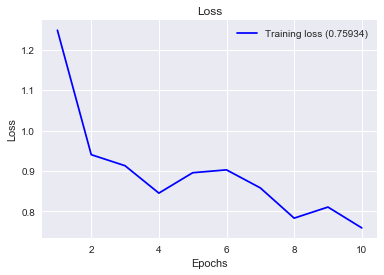

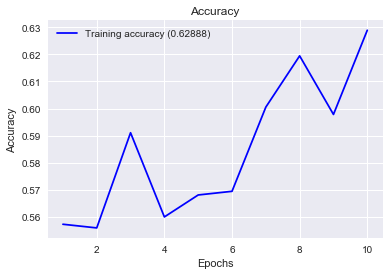

Epoch 1/10
741/741 [==============================] - 1s 775us/step - loss: 1.3642 - acc: 0.5655
Epoch 2/10
741/741 [==============================] - 0s 135us/step - loss: 1.0186 - acc: 0.5601
Epoch 3/10
741/741 [==============================] - 0s 123us/step - loss: 0.9660 - acc: 0.5843
Epoch 4/10
741/741 [==============================] - 0s 121us/step - loss: 0.9282 - acc: 0.6032
Epoch 5/10
741/741 [==============================] - 0s 110us/step - loss: 0.8943 - acc: 0.6221
Epoch 6/10
741/741 [==============================] - 0s 127us/step - loss: 0.9886 - acc: 0.5709
Epoch 7/10
741/741 [==============================] - 0s 125us/step - loss: 0.8585 - acc: 0.6005
Epoch 8/10
741/741 [==============================] - 0s 131us/step - loss: 0.8978 - acc: 0.5816
Epoch 9/10
741/741 [==============================] - 0s 142us/step - loss: 0.7359 - acc: 0.6424
Epoch 10/10
186/186 [==============================] - 0s 802us/step
acc: 42.47%
[67.74193535568894, 42.47311799116032]


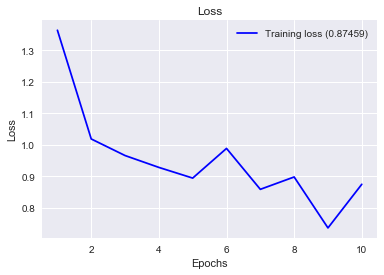

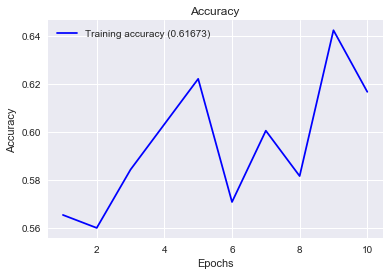

Epoch 1/10
742/742 [==============================] - 1s 739us/step - loss: 1.4242 - acc: 0.5512
Epoch 2/10
742/742 [==============================] - 0s 112us/step - loss: 1.1113 - acc: 0.5795
Epoch 3/10
742/742 [==============================] - 0s 118us/step - loss: 1.0865 - acc: 0.5553
Epoch 4/10
742/742 [==============================] - 0s 109us/step - loss: 1.0931 - acc: 0.5943
Epoch 5/10
742/742 [==============================] - 0s 115us/step - loss: 1.0852 - acc: 0.5836
Epoch 6/10
742/742 [==============================] - 0s 106us/step - loss: 1.0126 - acc: 0.5984
Epoch 7/10
742/742 [==============================] - 0s 115us/step - loss: 1.0518 - acc: 0.5822
Epoch 8/10
742/742 [==============================] - 0s 108us/step - loss: 0.9837 - acc: 0.5822
Epoch 9/10
742/742 [==============================] - 0s 112us/step - loss: 1.0411 - acc: 0.5822
Epoch 10/10
185/185 [==============================] - 0s 884us/step
acc: 69.19%
[67.74193535568894, 42.47311799116032, 69.1891

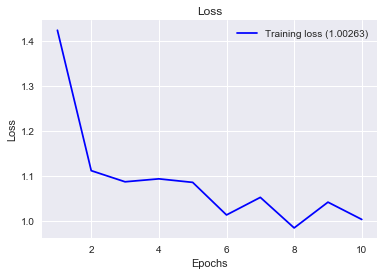

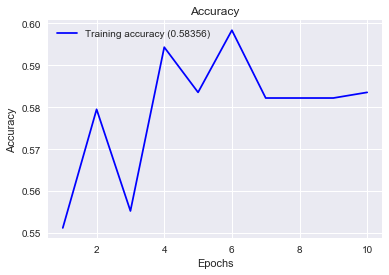

Epoch 1/10
742/742 [==============================] - 1s 869us/step - loss: 1.3542 - acc: 0.6092
Epoch 2/10
742/742 [==============================] - 0s 136us/step - loss: 1.0702 - acc: 0.5970
Epoch 3/10
742/742 [==============================] - 0s 113us/step - loss: 1.0676 - acc: 0.5660
Epoch 4/10
742/742 [==============================] - 0s 112us/step - loss: 1.0426 - acc: 0.5593
Epoch 5/10
742/742 [==============================] - 0s 119us/step - loss: 1.0377 - acc: 0.5903
Epoch 6/10
742/742 [==============================] - 0s 120us/step - loss: 0.9375 - acc: 0.5970
Epoch 7/10
742/742 [==============================] - 0s 110us/step - loss: 1.0082 - acc: 0.6065
Epoch 8/10
742/742 [==============================] - 0s 111us/step - loss: 0.9939 - acc: 0.5984
Epoch 9/10
742/742 [==============================] - 0s 110us/step - loss: 0.8344 - acc: 0.6253
Epoch 10/10
185/185 [==============================] - 0s 863us/step
acc: 65.41%
[67.74193535568894, 42.47311799116032, 69.1891

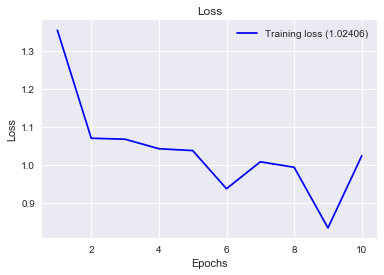

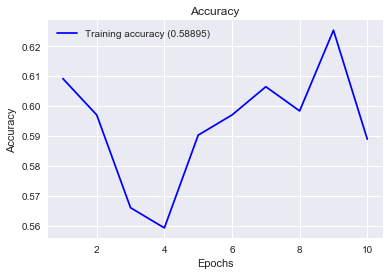

Epoch 1/10
742/742 [==============================] - 1s 854us/step - loss: 1.5523 - acc: 0.5674
Epoch 2/10
742/742 [==============================] - 0s 106us/step - loss: 1.2272 - acc: 0.5889
Epoch 3/10
742/742 [==============================] - 0s 103us/step - loss: 1.1558 - acc: 0.6334
Epoch 4/10
742/742 [==============================] - 0s 110us/step - loss: 1.1630 - acc: 0.6065
Epoch 5/10
742/742 [==============================] - 0s 101us/step - loss: 1.0476 - acc: 0.6105
Epoch 6/10
742/742 [==============================] - 0s 112us/step - loss: 1.0530 - acc: 0.5512
Epoch 7/10
742/742 [==============================] - 0s 109us/step - loss: 1.0292 - acc: 0.6105
Epoch 8/10
742/742 [==============================] - 0s 108us/step - loss: 1.0904 - acc: 0.5997
Epoch 9/10
742/742 [==============================] - 0s 107us/step - loss: 0.9779 - acc: 0.6119
Epoch 10/10
185/185 [==============================] - 0s 905us/step
acc: 56.22%
[67.74193535568894, 42.47311799116032, 69.1891

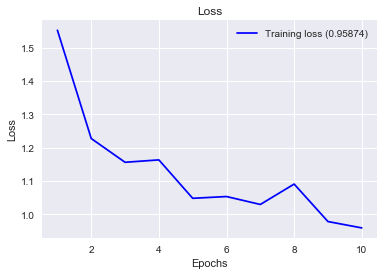

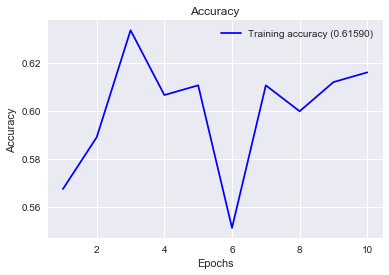

In [26]:
mlf.run_deep_learning_loop(CCLE_features, CCLE_label)

### Run Keras Deep Learning Models gCSI

Epoch 1/10
921/921 [==============================] - 0s 434us/step - loss: 1.1512 - acc: 0.5418
Epoch 2/10
921/921 [==============================] - 0s 112us/step - loss: 0.8541 - acc: 0.5961
Epoch 3/10
921/921 [==============================] - 0s 106us/step - loss: 0.8894 - acc: 0.5852
Epoch 4/10
921/921 [==============================] - 0s 121us/step - loss: 0.8652 - acc: 0.5972
Epoch 5/10
921/921 [==============================] - 0s 138us/step - loss: 0.8284 - acc: 0.6102
Epoch 6/10
921/921 [==============================] - 0s 129us/step - loss: 0.8258 - acc: 0.6048
Epoch 7/10
921/921 [==============================] - 0s 130us/step - loss: 0.7995 - acc: 0.6395
Epoch 8/10
921/921 [==============================] - 0s 127us/step - loss: 0.8362 - acc: 0.5787
Epoch 9/10
921/921 [==============================] - 0s 130us/step - loss: 0.7766 - acc: 0.6102
Epoch 10/10
231/231 [==============================] - 0s 385us/step
acc: 24.24%
[24.242424513354447]


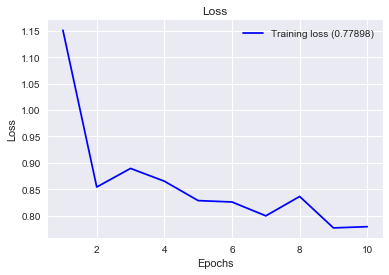

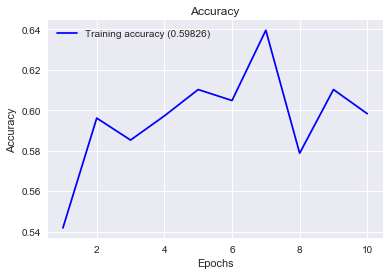

Epoch 1/10
921/921 [==============================] - 0s 498us/step - loss: 1.0485 - acc: 0.5798
Epoch 2/10
921/921 [==============================] - 0s 126us/step - loss: 0.8451 - acc: 0.6113
Epoch 3/10
921/921 [==============================] - 0s 130us/step - loss: 0.8320 - acc: 0.6037
Epoch 4/10
921/921 [==============================] - 0s 125us/step - loss: 0.8361 - acc: 0.6059
Epoch 5/10
921/921 [==============================] - 0s 135us/step - loss: 0.8030 - acc: 0.6200
Epoch 6/10
921/921 [==============================] - 0s 113us/step - loss: 0.7931 - acc: 0.6102
Epoch 7/10
921/921 [==============================] - 0s 85us/step - loss: 0.7618 - acc: 0.6341
Epoch 8/10
921/921 [==============================] - 0s 91us/step - loss: 0.7651 - acc: 0.6167
Epoch 9/10
921/921 [==============================] - 0s 94us/step - loss: 0.7672 - acc: 0.5993
Epoch 10/10
231/231 [==============================] - 0s 512us/step
acc: 51.52%
[24.242424513354447, 51.51515107650262]


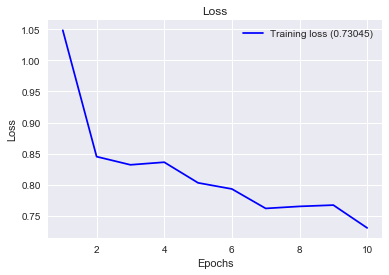

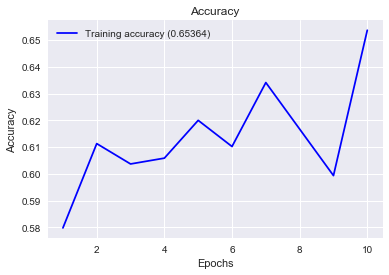

Epoch 1/10
922/922 [==============================] - 0s 482us/step - loss: 1.0379 - acc: 0.5900
Epoch 2/10
922/922 [==============================] - 0s 97us/step - loss: 0.8863 - acc: 0.6139
Epoch 3/10
922/922 [==============================] - 0s 102us/step - loss: 0.8765 - acc: 0.6041
Epoch 4/10
922/922 [==============================] - 0s 104us/step - loss: 0.8610 - acc: 0.6009
Epoch 5/10
922/922 [==============================] - 0s 95us/step - loss: 0.8528 - acc: 0.5716
Epoch 6/10
922/922 [==============================] - 0s 96us/step - loss: 0.7807 - acc: 0.6106
Epoch 7/10
922/922 [==============================] - 0s 99us/step - loss: 0.8041 - acc: 0.6215
Epoch 8/10
922/922 [==============================] - 0s 98us/step - loss: 0.7749 - acc: 0.6117
Epoch 9/10
922/922 [==============================] - 0s 105us/step - loss: 0.7971 - acc: 0.6095
Epoch 10/10
230/230 [==============================] - 0s 484us/step
acc: 66.96%
[24.242424513354447, 51.51515107650262, 66.95652262

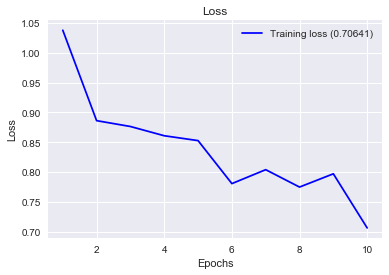

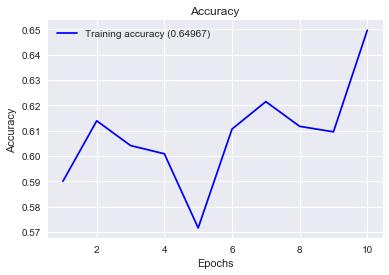

Epoch 1/10
922/922 [==============================] - 0s 522us/step - loss: 0.9693 - acc: 0.5889
Epoch 2/10
922/922 [==============================] - 0s 100us/step - loss: 0.7726 - acc: 0.6193
Epoch 3/10
922/922 [==============================] - 0s 101us/step - loss: 0.7856 - acc: 0.6193
Epoch 4/10
922/922 [==============================] - 0s 96us/step - loss: 0.7779 - acc: 0.5965
Epoch 5/10
922/922 [==============================] - 0s 115us/step - loss: 0.7681 - acc: 0.6236
Epoch 6/10
922/922 [==============================] - 0s 97us/step - loss: 0.7658 - acc: 0.5900
Epoch 7/10
922/922 [==============================] - 0s 104us/step - loss: 0.7210 - acc: 0.6291
Epoch 8/10
922/922 [==============================] - 0s 101us/step - loss: 0.7082 - acc: 0.6443
Epoch 9/10
922/922 [==============================] - 0s 82us/step - loss: 0.6884 - acc: 0.6367
Epoch 10/10
230/230 [==============================] - 0s 509us/step
acc: 59.57%
[24.242424513354447, 51.51515107650262, 66.956522

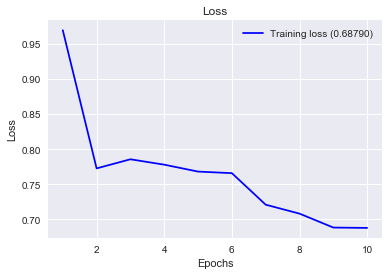

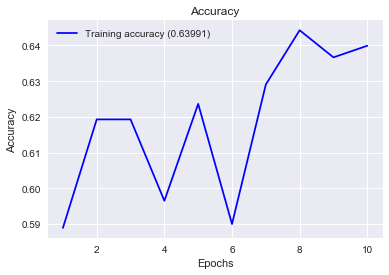

Epoch 1/10
922/922 [==============================] - 1s 549us/step - loss: 1.1271 - acc: 0.5629
Epoch 2/10
922/922 [==============================] - 0s 92us/step - loss: 0.8792 - acc: 0.6215
Epoch 3/10
922/922 [==============================] - 0s 107us/step - loss: 0.9220 - acc: 0.5998
Epoch 4/10
922/922 [==============================] - 0s 108us/step - loss: 0.8656 - acc: 0.6312
Epoch 5/10
922/922 [==============================] - 0s 103us/step - loss: 0.8030 - acc: 0.6258
Epoch 6/10
922/922 [==============================] - 0s 92us/step - loss: 0.8080 - acc: 0.6399
Epoch 7/10
922/922 [==============================] - 0s 96us/step - loss: 0.7810 - acc: 0.6367
Epoch 8/10
922/922 [==============================] - 0s 93us/step - loss: 0.8017 - acc: 0.6367
Epoch 9/10
922/922 [==============================] - 0s 98us/step - loss: 0.7264 - acc: 0.6453
Epoch 10/10
230/230 [==============================] - 0s 537us/step
acc: 47.39%
[24.242424513354447, 51.51515107650262, 66.95652262

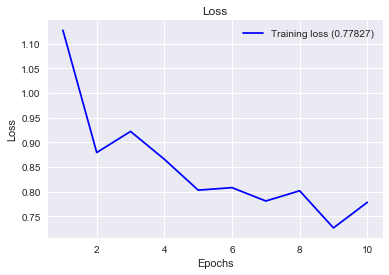

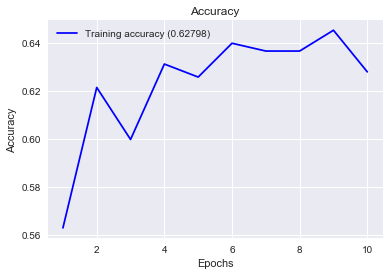

In [14]:
mlf.run_deep_learning_loop(gCSI_features, gCSI_label)

### Run Keras Deep Learning Models CTRP

Epoch 1/10
49114/49114 [==============================] - 8s 162us/step - loss: 0.6225 - acc: 0.6890
Epoch 2/10
49114/49114 [==============================] - 7s 153us/step - loss: 0.5325 - acc: 0.7354
Epoch 3/10
49114/49114 [==============================] - 7s 146us/step - loss: 0.5187 - acc: 0.7460
Epoch 4/10
49114/49114 [==============================] - 12s 248us/step - loss: 0.5126 - acc: 0.7512
Epoch 5/10
49114/49114 [==============================] - 10s 203us/step - loss: 0.5097 - acc: 0.7534
Epoch 6/10
49114/49114 [==============================] - 11s 227us/step - loss: 0.5087 - acc: 0.75620s - loss: 0.50
Epoch 7/10
49114/49114 [==============================] - 9s 180us/step - loss: 0.5066 - acc: 0.7572
Epoch 8/10
49114/49114 [==============================] - 8s 156us/step - loss: 0.5049 - acc: 0.7586
Epoch 9/10
49114/49114 [==============================] - 9s 184us/step - loss: 0.5048 - acc: 0.7564
Epoch 10/10
12279/12279 [==============================] - 1s 62us/step
a

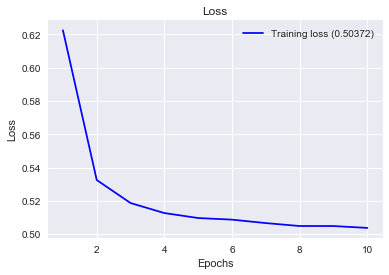

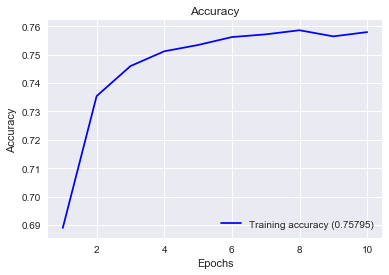

Epoch 1/10
49114/49114 [==============================] - 7s 145us/step - loss: 0.6587 - acc: 0.6893
Epoch 2/10
49114/49114 [==============================] - 7s 152us/step - loss: 0.5249 - acc: 0.7402
Epoch 3/10
49114/49114 [==============================] - 7s 152us/step - loss: 0.5076 - acc: 0.7540
Epoch 4/10
49114/49114 [==============================] - 7s 151us/step - loss: 0.5007 - acc: 0.7599
Epoch 5/10
49114/49114 [==============================] - 7s 152us/step - loss: 0.4967 - acc: 0.7627
Epoch 6/10
49114/49114 [==============================] - 8s 159us/step - loss: 0.4953 - acc: 0.7631
Epoch 7/10
49114/49114 [==============================] - 8s 161us/step - loss: 0.4940 - acc: 0.7636
Epoch 8/10
49114/49114 [==============================] - 8s 163us/step - loss: 0.4918 - acc: 0.7644
Epoch 9/10
49114/49114 [==============================] - 7s 151us/step - loss: 0.4918 - acc: 0.7649
Epoch 10/10
12279/12279 [==============================] - 1s 48us/step
acc: 74.06%
[74.289

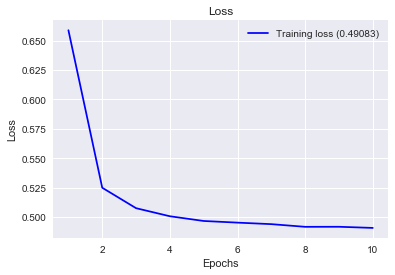

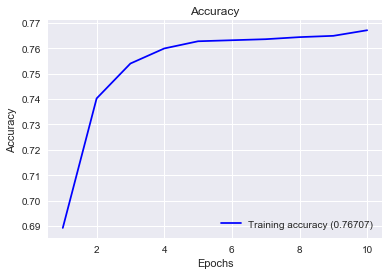

Epoch 1/10
49114/49114 [==============================] - 8s 164us/step - loss: 0.6098 - acc: 0.7030
Epoch 2/10
49114/49114 [==============================] - 8s 170us/step - loss: 0.5162 - acc: 0.7465
Epoch 3/10
49114/49114 [==============================] - 8s 164us/step - loss: 0.5037 - acc: 0.7565
Epoch 4/10
49114/49114 [==============================] - 8s 170us/step - loss: 0.4978 - acc: 0.7602
Epoch 5/10
49114/49114 [==============================] - 8s 153us/step - loss: 0.4948 - acc: 0.7654
Epoch 6/10
49114/49114 [==============================] - 8s 156us/step - loss: 0.4922 - acc: 0.7662
Epoch 7/10
49114/49114 [==============================] - 6s 119us/step - loss: 0.4919 - acc: 0.7659
Epoch 8/10
49114/49114 [==============================] - 7s 144us/step - loss: 0.4898 - acc: 0.7668
Epoch 9/10
49114/49114 [==============================] - 8s 160us/step - loss: 0.4897 - acc: 0.7670
Epoch 10/10
12279/12279 [==============================] - 1s 44us/step
acc: 70.97%
[74.289

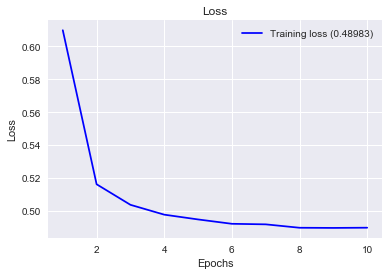

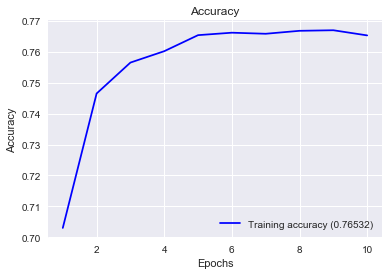

Epoch 1/10
49115/49115 [==============================] - 8s 169us/step - loss: 0.6762 - acc: 0.6749
Epoch 2/10
49115/49115 [==============================] - 8s 155us/step - loss: 0.5533 - acc: 0.7228
Epoch 3/10
49115/49115 [==============================] - 8s 153us/step - loss: 0.5315 - acc: 0.7357
Epoch 4/10
49115/49115 [==============================] - 7s 145us/step - loss: 0.5251 - acc: 0.7415
Epoch 5/10
49115/49115 [==============================] - 7s 138us/step - loss: 0.5206 - acc: 0.7454
Epoch 6/10
49115/49115 [==============================] - 8s 155us/step - loss: 0.5186 - acc: 0.7468
Epoch 7/10
49115/49115 [==============================] - 8s 157us/step - loss: 0.5170 - acc: 0.7480
Epoch 8/10
49115/49115 [==============================] - 8s 156us/step - loss: 0.5157 - acc: 0.7499
Epoch 9/10
49115/49115 [==============================] - 6s 126us/step - loss: 0.5148 - acc: 0.7515
Epoch 10/10
12278/12278 [==============================] - 1s 53us/step
acc: 73.98%
[74.289

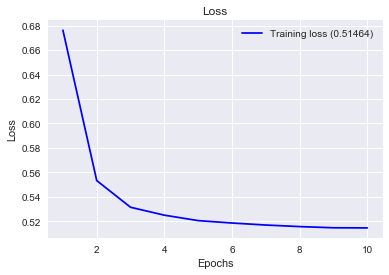

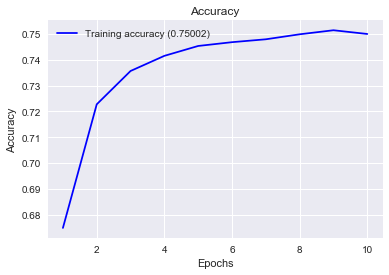

Epoch 1/10
49115/49115 [==============================] - 10s 207us/step - loss: 0.6516 - acc: 0.6917
Epoch 2/10
49115/49115 [==============================] - 9s 187us/step - loss: 0.5370 - acc: 0.7334
Epoch 3/10
49115/49115 [==============================] - 7s 151us/step - loss: 0.5141 - acc: 0.7476
Epoch 4/10
49115/49115 [==============================] - 8s 156us/step - loss: 0.5059 - acc: 0.7534
Epoch 5/10
49115/49115 [==============================] - 8s 156us/step - loss: 0.5019 - acc: 0.7582
Epoch 6/10
49115/49115 [==============================] - 8s 158us/step - loss: 0.4997 - acc: 0.7595
Epoch 7/10
49115/49115 [==============================] - 8s 161us/step - loss: 0.4985 - acc: 0.7590
Epoch 8/10
49115/49115 [==============================] - 9s 174us/step - loss: 0.4972 - acc: 0.7609
Epoch 9/10
49115/49115 [==============================] - 9s 173us/step - loss: 0.4976 - acc: 0.7605
Epoch 10/10
12278/12278 [==============================] - 1s 42us/step
acc: 65.60%
[74.28

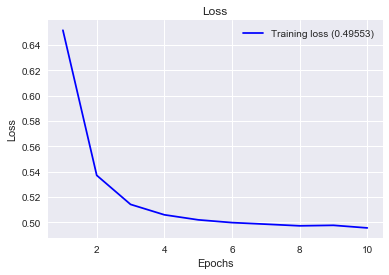

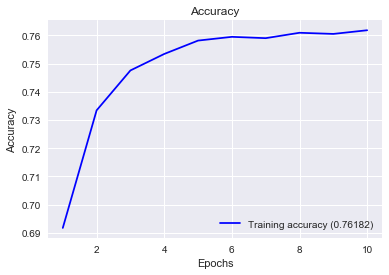

In [6]:
mlf.run_deep_learning_loop(CTRP_features, CTRP_label)

### Run Keras Deep Learning Models NCI60

Epoch 1/10
99200/99200 [==============================] - 17s 167us/step - loss: 0.5638 - acc: 0.7378
Epoch 2/10
99200/99200 [==============================] - 16s 158us/step - loss: 0.4519 - acc: 0.7887
Epoch 3/10
99200/99200 [==============================] - 16s 162us/step - loss: 0.4413 - acc: 0.7969
Epoch 4/10
99200/99200 [==============================] - 16s 163us/step - loss: 0.4374 - acc: 0.7986
Epoch 5/10
99200/99200 [==============================] - 16s 163us/step - loss: 0.4349 - acc: 0.7988
Epoch 6/10
99200/99200 [==============================] - 16s 163us/step - loss: 0.4336 - acc: 0.8008
Epoch 7/10
99200/99200 [==============================] - 16s 161us/step - loss: 0.4327 - acc: 0.8003
Epoch 8/10
99200/99200 [==============================] - 16s 163us/step - loss: 0.4318 - acc: 0.8014
Epoch 9/10
99200/99200 [==============================] - 16s 160us/step - loss: 0.4309 - acc: 0.8021
Epoch 10/10
24800/24800 [==============================] - 1s 38us/step
acc: 69.88

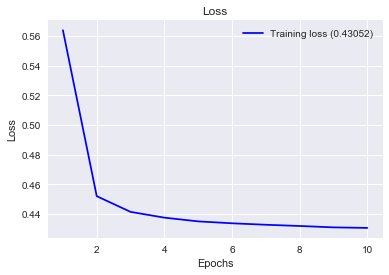

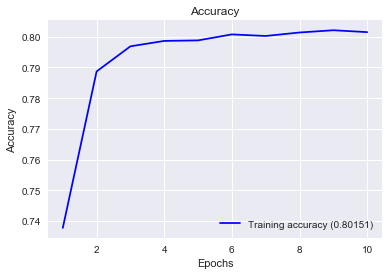

Epoch 1/10
99200/99200 [==============================] - 16s 165us/step - loss: 0.5319 - acc: 0.7425
Epoch 2/10
99200/99200 [==============================] - 16s 159us/step - loss: 0.4476 - acc: 0.7936
Epoch 3/10
99200/99200 [==============================] - 15s 150us/step - loss: 0.4383 - acc: 0.7979
Epoch 4/10
99200/99200 [==============================] - 15s 155us/step - loss: 0.4343 - acc: 0.8014
Epoch 5/10
99200/99200 [==============================] - 16s 164us/step - loss: 0.4321 - acc: 0.8013
Epoch 6/10
99200/99200 [==============================] - 13s 128us/step - loss: 0.4304 - acc: 0.8034
Epoch 7/10
99200/99200 [==============================] - 13s 131us/step - loss: 0.4294 - acc: 0.8025
Epoch 8/10
99200/99200 [==============================] - 16s 164us/step - loss: 0.4287 - acc: 0.8026
Epoch 9/10
99200/99200 [==============================] - 16s 161us/step - loss: 0.4280 - acc: 0.8033
Epoch 10/10
24800/24800 [==============================] - 1s 37us/step
acc: 67.69

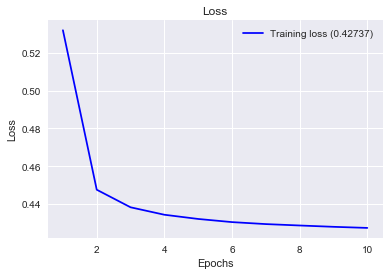

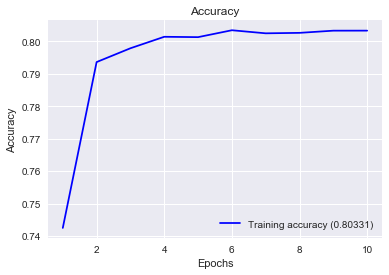

Epoch 1/10
99200/99200 [==============================] - 17s 167us/step - loss: 0.5412 - acc: 0.7376
Epoch 2/10
99200/99200 [==============================] - 16s 158us/step - loss: 0.4508 - acc: 0.79081s - 
Epoch 3/10
99200/99200 [==============================] - 16s 161us/step - loss: 0.4395 - acc: 0.7993
Epoch 4/10
99200/99200 [==============================] - 16s 162us/step - loss: 0.4358 - acc: 0.8004
Epoch 5/10
99200/99200 [==============================] - 16s 165us/step - loss: 0.4341 - acc: 0.8004
Epoch 6/10
99200/99200 [==============================] - 15s 155us/step - loss: 0.4320 - acc: 0.8027
Epoch 7/10
99200/99200 [==============================] - 17s 168us/step - loss: 0.4308 - acc: 0.8017
Epoch 8/10
99200/99200 [==============================] - 16s 158us/step - loss: 0.4299 - acc: 0.8023
Epoch 9/10
99200/99200 [==============================] - 17s 168us/step - loss: 0.4293 - acc: 0.8017
Epoch 10/10
24800/24800 [==============================] - 1s 40us/step
acc: 

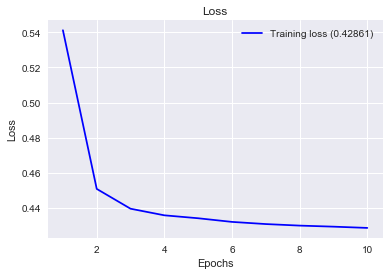

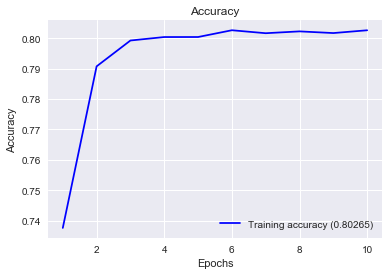

Epoch 1/10
99200/99200 [==============================] - 18s 185us/step - loss: 0.5278 - acc: 0.7407
Epoch 2/10
99200/99200 [==============================] - 19s 192us/step - loss: 0.4464 - acc: 0.7934
Epoch 3/10
99200/99200 [==============================] - 18s 183us/step - loss: 0.4361 - acc: 0.7997
Epoch 4/10
99200/99200 [==============================] - 17s 176us/step - loss: 0.4325 - acc: 0.8030
Epoch 5/10
99200/99200 [==============================] - 16s 157us/step - loss: 0.4304 - acc: 0.8031
Epoch 6/10
99200/99200 [==============================] - 17s 169us/step - loss: 0.4292 - acc: 0.8033
Epoch 7/10
99200/99200 [==============================] - 17s 169us/step - loss: 0.4280 - acc: 0.8043
Epoch 8/10
99200/99200 [==============================] - 18s 179us/step - loss: 0.4275 - acc: 0.8044
Epoch 9/10
99200/99200 [==============================] - 17s 169us/step - loss: 0.4264 - acc: 0.8042
Epoch 10/10
24800/24800 [==============================] - 2s 70us/step
acc: 50.17

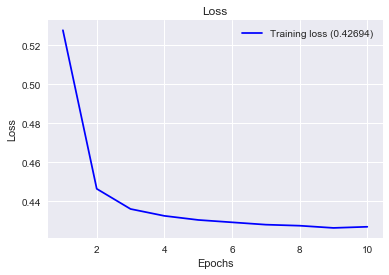

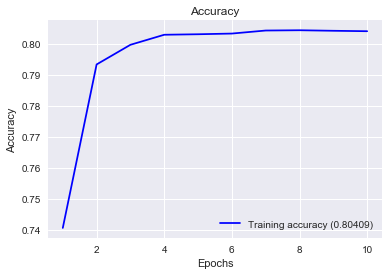

Epoch 1/10
99200/99200 [==============================] - 17s 174us/step - loss: 0.5271 - acc: 0.7407
Epoch 2/10
99200/99200 [==============================] - 18s 181us/step - loss: 0.4496 - acc: 0.7917
Epoch 3/10
99200/99200 [==============================] - 17s 172us/step - loss: 0.4392 - acc: 0.7976
Epoch 4/10
99200/99200 [==============================] - 16s 162us/step - loss: 0.4354 - acc: 0.7998
Epoch 5/10
99200/99200 [==============================] - 17s 168us/step - loss: 0.4333 - acc: 0.8011
Epoch 6/10
99200/99200 [==============================] - 18s 179us/step - loss: 0.4317 - acc: 0.8012
Epoch 7/10
99200/99200 [==============================] - 18s 177us/step - loss: 0.4303 - acc: 0.8018
Epoch 8/10
99200/99200 [==============================] - 15s 152us/step - loss: 0.4299 - acc: 0.8014
Epoch 9/10
99200/99200 [==============================] - 18s 181us/step - loss: 0.4288 - acc: 0.8028
Epoch 10/10
24800/24800 [==============================] - 1s 46us/step
acc: 75.79

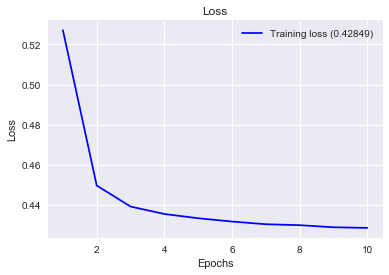

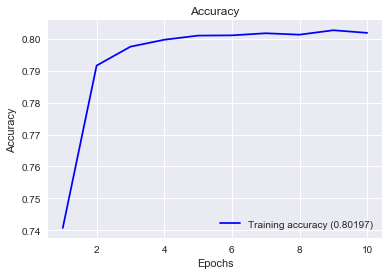

In [3]:
mlf.run_deep_learning_loop(NCI60_features, NCI60_label)

### Run Keras Deep Learning Models GDSC

Epoch 1/10
11613/11613 [==============================] - 2s 136us/step - loss: 0.8193 - acc: 0.6045
Epoch 2/10
11613/11613 [==============================] - 1s 100us/step - loss: 0.7152 - acc: 0.6191
Epoch 3/10
11613/11613 [==============================] - 1s 119us/step - loss: 0.6711 - acc: 0.6424
Epoch 4/10
11613/11613 [==============================] - 1s 114us/step - loss: 0.6466 - acc: 0.6553
Epoch 5/10
11613/11613 [==============================] - 1s 117us/step - loss: 0.6343 - acc: 0.6651
Epoch 6/10
11613/11613 [==============================] - 1s 116us/step - loss: 0.6261 - acc: 0.6734
Epoch 7/10
11613/11613 [==============================] - 1s 116us/step - loss: 0.6189 - acc: 0.6743
Epoch 8/10
11613/11613 [==============================] - 1s 121us/step - loss: 0.6151 - acc: 0.6817
Epoch 9/10
11613/11613 [==============================] - 1s 121us/step - loss: 0.6119 - acc: 0.6843
Epoch 10/10
2904/2904 [==============================] - 0s 42us/step
acc: 44.97%
[44.97245

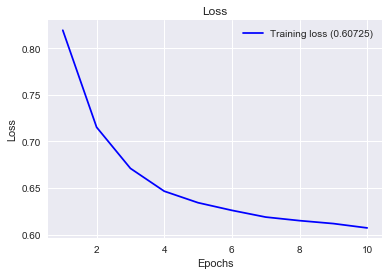

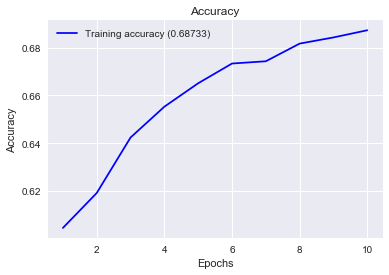

Epoch 1/10
11613/11613 [==============================] - 2s 153us/step - loss: 0.8642 - acc: 0.6099
Epoch 2/10
11613/11613 [==============================] - 1s 126us/step - loss: 0.7484 - acc: 0.6218
Epoch 3/10
11613/11613 [==============================] - 1s 110us/step - loss: 0.6936 - acc: 0.6347
Epoch 4/10
11613/11613 [==============================] - 1s 113us/step - loss: 0.6547 - acc: 0.6502
Epoch 5/10
11613/11613 [==============================] - 1s 113us/step - loss: 0.6369 - acc: 0.6594
Epoch 6/10
11613/11613 [==============================] - 1s 118us/step - loss: 0.6269 - acc: 0.6723
Epoch 7/10
11613/11613 [==============================] - 1s 104us/step - loss: 0.6214 - acc: 0.6717
Epoch 8/10
11613/11613 [==============================] - 1s 105us/step - loss: 0.6180 - acc: 0.6747
Epoch 9/10
11613/11613 [==============================] - 1s 110us/step - loss: 0.6133 - acc: 0.6799 1s - lo
Epoch 10/10
2904/2904 [==============================] - 0s 40us/step
acc: 45.08%
[

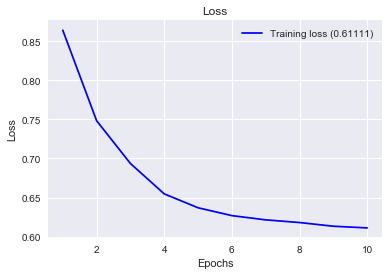

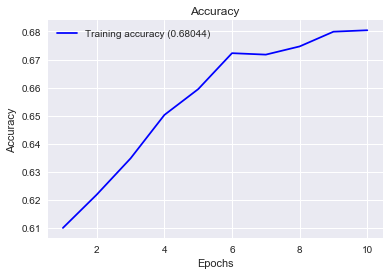

Epoch 1/10
11614/11614 [==============================] - 2s 151us/step - loss: 0.8808 - acc: 0.5932
Epoch 2/10
11614/11614 [==============================] - 1s 127us/step - loss: 0.7473 - acc: 0.6142
Epoch 3/10
11614/11614 [==============================] - 1s 122us/step - loss: 0.6791 - acc: 0.6395
Epoch 4/10
11614/11614 [==============================] - 1s 120us/step - loss: 0.6530 - acc: 0.6513
Epoch 5/10
11614/11614 [==============================] - 1s 123us/step - loss: 0.6379 - acc: 0.6574
Epoch 6/10
11614/11614 [==============================] - 1s 118us/step - loss: 0.6310 - acc: 0.6673
Epoch 7/10
11614/11614 [==============================] - 1s 124us/step - loss: 0.6213 - acc: 0.6728
Epoch 8/10
11614/11614 [==============================] - 1s 126us/step - loss: 0.6180 - acc: 0.6726
Epoch 9/10
11614/11614 [==============================] - 1s 123us/step - loss: 0.6125 - acc: 0.6809
Epoch 10/10
2903/2903 [==============================] - 0s 49us/step
acc: 70.41%
[44.97245

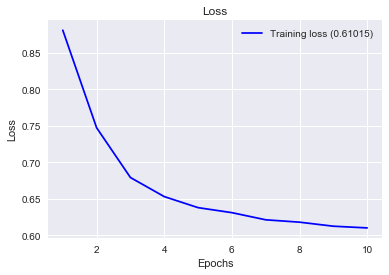

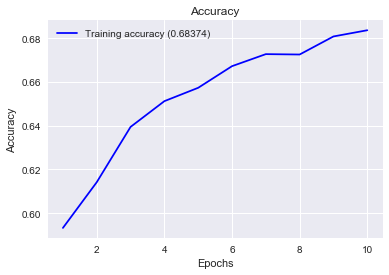

Epoch 1/10
11614/11614 [==============================] - 2s 143us/step - loss: 0.8116 - acc: 0.6031
Epoch 2/10
11614/11614 [==============================] - 1s 124us/step - loss: 0.7203 - acc: 0.6304
Epoch 3/10
11614/11614 [==============================] - 2s 130us/step - loss: 0.6683 - acc: 0.6517
Epoch 4/10
11614/11614 [==============================] - 1s 120us/step - loss: 0.6483 - acc: 0.6557
Epoch 5/10
11614/11614 [==============================] - 1s 126us/step - loss: 0.6361 - acc: 0.6619
Epoch 6/10
11614/11614 [==============================] - 1s 109us/step - loss: 0.6283 - acc: 0.6667
Epoch 7/10
11614/11614 [==============================] - 1s 121us/step - loss: 0.6233 - acc: 0.6726
Epoch 8/10
11614/11614 [==============================] - 1s 97us/step - loss: 0.6183 - acc: 0.6766
Epoch 9/10
11614/11614 [==============================] - 1s 102us/step - loss: 0.6147 - acc: 0.6775
Epoch 10/10
2903/2903 [==============================] - 0s 44us/step
acc: 68.96%
[44.972451

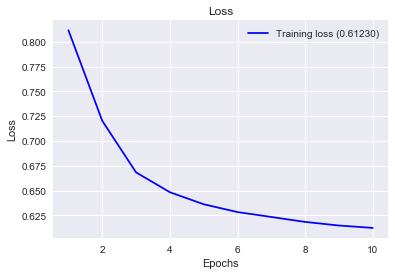

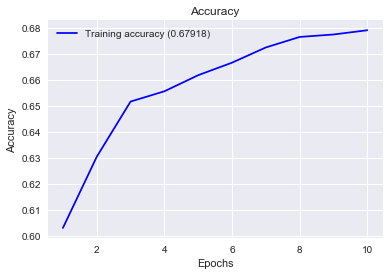

Epoch 1/10
11614/11614 [==============================] - 1s 124us/step - loss: 0.7308 - acc: 0.6405
Epoch 2/10
11614/11614 [==============================] - 1s 100us/step - loss: 0.6635 - acc: 0.6593
Epoch 3/10
11614/11614 [==============================] - 1s 103us/step - loss: 0.6302 - acc: 0.6781
Epoch 4/10
11614/11614 [==============================] - 1s 102us/step - loss: 0.6218 - acc: 0.6848
Epoch 5/10
11614/11614 [==============================] - 1s 96us/step - loss: 0.6128 - acc: 0.6907
Epoch 6/10
11614/11614 [==============================] - 1s 106us/step - loss: 0.6101 - acc: 0.6921
Epoch 7/10
11614/11614 [==============================] - 1s 120us/step - loss: 0.6090 - acc: 0.6930
Epoch 8/10
11614/11614 [==============================] - 1s 118us/step - loss: 0.6045 - acc: 0.6944
Epoch 9/10
11614/11614 [==============================] - 1s 118us/step - loss: 0.6023 - acc: 0.6967
Epoch 10/10
2903/2903 [==============================] - 0s 56us/step
acc: 63.76%
[44.972451

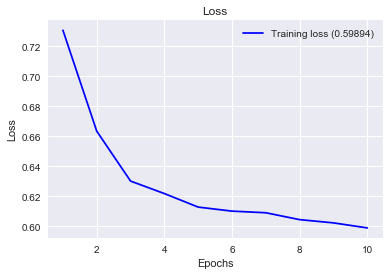

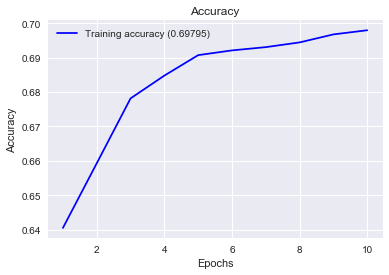

In [11]:
mlf.run_deep_learning_loop(GDSC_features, GDSC_label)

### EXTRA CREDIT: Tree-Based Pipeline Optimization Tool (TPOT) to Find a Better Solution to Part a

In [4]:
from tpot import TPOTClassifier
from sklearn import preprocessing, cross_validation, svm, metrics, tree, decomposition, svm
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(GDSC_features, GDSC_label, test_size=0.2)
scaler_x = preprocessing.StandardScaler().fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)
y_train = np.ravel(y_train,order='C')
tpot = TPOTClassifier(generations=1, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.7204000680307059

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.1, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
0.7210743801652892


# Part 2.	Dose independent formulation.

### Read in Data CCLE

In [6]:
agg_dataset = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/agg_response/combo_response_agg', sep = '\t')

In [7]:
agg_dataset.head()

SOURCE         CELL       DRUG1       DRUG2     STUDY    MEAN
0  ALMANAC.1A  NCI60.786-0  NSC.256439  NSC.102816  1305AC99  0.6323
1  ALMANAC.1A  NCI60.786-0  NSC.256439  NSC.105014  1306AC10  0.6836
2  ALMANAC.1A  NCI60.786-0  NSC.256439  NSC.109724  1307AC23  0.7331
3  ALMANAC.1A  NCI60.786-0  NSC.256439  NSC.119875  1305AC94  0.7492
4  ALMANAC.1A  NCI60.786-0  NSC.256439  NSC.122758  1308AC52  0.7498

In [26]:
agg_dataset_single_response = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/agg_response/combined_single_response_agg', sep = '\t')

In [27]:
agg_dataset_single_response.head()

SOURCE         CELL     DRUG     STUDY     AUC   IC50   EC50     EC50se  \
0   CCLE  CCLE.1321N1   CCLE.1  fake_exp  0.8330  4.883  5.183     0.5746   
1   CCLE  CCLE.1321N1  CCLE.10  fake_exp  0.7909  5.217  5.217     2.2840   
2   CCLE  CCLE.1321N1  CCLE.11  fake_exp  0.5255  7.120  7.168     0.0295   
3   CCLE  CCLE.1321N1  CCLE.12  fake_exp  0.8532  4.881  4.881  8547.0000   
4   CCLE  CCLE.1321N1  CCLE.14  fake_exp  0.5688  6.911  6.946     0.1882   

    R2fit    Einf      HS    AAC1    AUC1    DSS1  
0  0.9864  0.2017  0.7463  0.1017  0.8983  0.0551  
1  0.6526  0.0000  0.8993  0.1136  0.8864  0.0728  
2  0.9962  0.1014  2.0400  0.5310  0.4690  0.5032  
3 -0.2764  0.0000  4.0000  0.0040  0.9960  0.0001  
4  0.8392  0.1218  3.4770  0.4633  0.5367  0.4439

In [28]:
dragon7_descriptors = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/drug_descriptors/combined_dragon7_descriptors', sep = '\t')

In [29]:
dragon7_descriptors.head()

NAME      MW    AMW      Sv      Se      Sp      Si     Mv     Me  \
0   CCLE.1  439.61  7.090  39.143   61.44  41.620  69.683  0.631  0.991   
1  CCLE.10  475.40  8.804  34.718  54.523  36.597  61.160  0.643   1.01   
2  CCLE.11  349.47  7.132  30.762  48.796  32.540  55.066  0.628  0.996   
3  CCLE.12  464.86  9.685  33.422   50.32  33.148  54.906  0.696  1.048   
4  CCLE.13  586.75  7.244   50.33  81.392  52.694  91.308  0.621  1.005   

      Mp     Mi     GD  nAT  nSK  nTA  nBT  nBO  nBM  SCBO  RBN    RBF  nDB  \
0  0.671  1.124  0.072   62   33    1   67   38   22  49.0    7  0.104    0   
1  0.678  1.133  0.076   54   30    4   57   33   17  41.5    6  0.105    0   
2  0.664  1.124  0.086   49   26    3   51   28   18  38.0    7  0.137    2   
3  0.691  1.144  0.069   48   32    7   50   34   20  45.0    5  0.100    2   
4  0.651  1.127  0.054   81   43    6   87   49   16  59.5    5  0.057    5   

   nTB  nAB  nH  nC  nN  nO  nP  nS  nF  nCL  nBR  nI  nB  nHM  nHet  nX  \
0    0   22  29  27   5   1   0   0   0    0    0   0   0    0     6   0   
1    0   17  24  22   4   2   0   0   1    0    1   0   0    1     8   2   
2    0   16  23  21   3   2   0   0   0    0    0   0   0    0     5   0   
3    0   18  16  21   4   3   0   0   3    1    0   0   0    1    11   4   
4    0   11  38  33   4   6   0   0   0    0    0   0   0    0    10   0   

     H%    C%   N%   O%   X%  nCsp3  nCsp2  nCsp  nStructures  totalcharge  \
0  46.8  43.5  8.1  1.6  0.0      9     18     0            1            0   
1  44.4  40.7  7.4  3.7  3.7      8     14     0            1            0   
2  46.9  42.9  6.1  4.1  0.0      4     17     0            1            0   
3  33.3  43.8  8.3  6.3  8.3      2     19     0            1            0   
4  46.9  40.7  4.9  7.4  0.0     17     16     0            1            0   

   nCIC  nCIR  TRS  Rperim  Rbrid    MCD    RFD    RCI  NRS   NNRS  nR03  \
0     6     7   31      29      1  0.879  0.069  1.069    5  0.833     0   
1     4     5   24      22      1  0.733  0.091  1.091    3  0.750     0   
2     3     4   17      15      1  0.577  0.133  1.133    2  0.667     0   
3     3     3   18      18      0  0.563  0.000  1.000    3  1.000     0   
4     7    17   41      33      4  0.767  0.242  1.242    3  0.429     0   

   nR04  nR05  nR06  nR07  nR08  nR09  nR10  nR11  nR12  nBnz    ARR  D/Dtr03  \
0     2     1     3     0     0     1     0     0     0     2  0.579      0.0   
1     0     0     4     0     0     0     1     0     0     2  0.515      0.0   
2     0     1     2     0     0     1     0     0     0     2  0.571      0.0   
3     0     0     3     0     0     0     0     0     0     2  0.529      0.0   
4     0     1     6     0     0     2     2     0     0     1  0.224      0.0   

   D/Dtr04  D/Dtr05  D/Dtr06  D/Dtr07  D/Dtr08  D/Dtr09  D/Dtr10  D/Dtr11  \
0  146.497   71.012  298.077      0.0      0.0  135.179    0.000      0.0   
1    0.000    0.000  348.882      0.0      0.0    0.000  134.100      0.0   
2    0.000   65.108  172.598      0.0      0.0  121.509    0.000      0.0   
3    0.000    0.000  372.995      0.0      0.0    0.000    0.000      0.0   
4    0.000   60.427  601.607      0.0      0.0  224.927  284.802      0.0   

   D/Dtr12  ZM1 ZM1V   ZM1Kup   ZM1Mad  ZM1Per ZM1MulPer  ZM2 ZM2V   ZM2Kup  \
0      0.0  184  402  429.628  197.007  602.91   423.906  221  446  462.863   
1      0.0  158  474  519.505  241.478  674.14     505.9  185  444   462.01   
2      0.0  130  324  350.884  138.483  471.46   347.737  149  330  342.796   
3      0.0  164  628  766.387  212.555  873.99   681.716  187  543  586.788   
4      0.0  246  612  693.408  273.234  901.39   652.752  306  638  676.286   

    ZM2Mad  ZM2Per ZM2MulPer     ON0    ON0V    ON1   ON1V Qindex BBI    DBI  \
0  235.479  697.63   472.577  15.167  10.883  7.083  3.883     29  54  2.915   
1    232.1  694.84   475.659  15.333  10.302  6.611  3.191     22  46      3   
2   157.04  502.11   351.196  13

In [30]:
combined_rnaseq_oncogenes = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/rna-seq/combined_rnaseq_data_oncogenes', sep = '\t')
combined_rnaseq_oncogenes.head()


Sample  AARS  ABCB6  ABCC5  ABCF1  ABCF3  ABHD4  ABHD6  ABI1  ABL1  \
0    CCLE.22RV1  8.31   7.17   4.12   5.64   6.04   3.94   2.08  5.86  5.24   
1  CCLE.2313287  8.94   6.30   3.83   6.60   5.99   6.34   3.72  6.30  4.67   
2     CCLE.253J  7.58   6.53   3.59   5.94   5.77   5.93   2.35  5.26  4.84   
3   CCLE.253JBV  7.79   6.01   4.05   6.44   5.97   5.58   2.89  4.79  5.09   
4   CCLE.42MGBA  7.84   6.72   3.09   6.92   5.43   5.38   3.99  5.74  5.85   

   ABL2  ACAA1  ACAD8  ACAT2  ACBD3   ACD  ACLY  ACO1  ACOT9  ACSL3  ACSL6  \
0  3.97   5.23   5.38   7.35   6.42  5.49  8.41  4.31   1.20   6.89   1.95   
1  4.17   5.78   4.37   6.30   5.63  4.24  6.97  4.42   5.03   7.42   0.01   
2  3.72   4.50   3.63   5.47   6.03  5.11  7.29  5.40   5.28   5.34   0.01   
3  3.94   4.39   3.76   6.00   5.89  5.85  7.90  4.86   5.76   5.18   0.00   
4  4.37   5.17   4.54   6.68   5.93  5.58  7.74  4.59   4.36   5.45   0.01   

    ACTB  ACTG1  ACTG2  ACVR1  ACVR1B  ACVR2A  ADAM10  ADAT1  ADCY1  ADH5  \
0  11.20  10.90   0.06   2.58    4.88    2.40    5.64   5.16   0.24  6.56   
1  11.09  10.73   0.00   4.46    5.02    3.26    6.78   4.10   0.04  7.36   
2  11.52  10.04   0.06   3.81    4.91    3.34    8.26   3.58   1.76  6.97   
3  11.70  10.44   0.06   3.49    5.31    1.79    6.08   4.00   2.82  6.78   
4  12.85  11.89   6.64   5.51    3.34    3.80    6.36   4.26   2.59  7.02   

   ADI1   ADO  ADRB2  AFF1  AFF3  AFF4   AGL  AGO2  AHCTF1  AHNAK   AHR  \
0  5.16  4.79   3.97  4.65  5.73  5.20  5.00  4.60    6.31   7.02  3.59   
1  4.54  5.04   0.10  4.62  0.01  5.77  5.45  5.85    5.39   7.44  7.18   
2  3.79  4.04   0.14  4.79  3.15  4.78  2.62  3.23    4.41   5.62  4.52   
3  3.63  4.63   0.08  4.04  3.36  4.81  3.22  4.81    5.07   6.91  2.98   
4  4.48  4.26   2.34  4.11  0.70  6.01  3.79  4.54    4.37   9.20  6.42   

   AKAP8  AKAP8L  AKAP9  AKR1C4  AKR7A2  AKT1  AKT2  AKT3  ALAS1  ALDH2  \
0   5.43    5.48   7.24    0.87    5.99  7.06  5.66  0.16   6.33   2.91   
1   5.28    4.94   5.43    2.73    6.14  7.18  4.93  0.12   7.17   9.33   
2   4.59    5.50   3.22    0.60    5.65  5.53  4.65  4.49   6.35   6.30   
3   4.66    4.98   3.24    0.12    5.79  6.14  4.63  4.28   6.92   7.35   
4   5.26    5.87   3.91    0.00    6.09  7.43  5.00  3.78   5.63   0.44   

   ALDH7A1  ALDOA  ALDOC   ALK  ALOX12B  AMDHD2  AMER1  ANK3  ANKRD10  \
0     4.82   8.60   4.90  0.03     1.92    3.64   2.52  3.97     4.29   
1     0.12   9.08   4.94  0.00     0.04    3.33   2.53  3.61     5.38   
2     5.13   9.83   3.45  0.00     0.57    4.76   2.66  0.04     4.33   
3     5.13   9.80   3.30  0.00     1.65    5.07   3.44  0.01     3.96   
4     5.94   9.91   0.69  1.56     0.00    4.03   2.18  0.25     4.36   

   ANKRD11  ANO10  ANXA7  APAF1  APBB2   APC  APH1A  APOBEC3B  APOE    APP  \
0     5.32   2.63   7.27   4.17   3.28  4.03   7.58      4.78  1.91   5.81   
1     6.20   4.33   7.26   3.83   4.75  4.04   7.37      4.20  0.82   9.29   
2     4.06   4.52   6.64   3.99   3.25  2.45   7.34      6.28  1.34   9.47   
3     4.72   3.39   7.00   3.78   2.48  2.77   7.38      6.52  0.99   7.86   
4     5.54   5.41   7.10   4.26   3.33  3.79   6.86      6.49  3.99  10.19   

   APPBP2   AQR    AR  ARAF  ARAP3  ARFGAP1  ARFGAP3  ARFGEF1  ARFGEF2  \
0    3.95  5.17  7.54  5.40   0.60     4.96     5.86     5.31     5.04   
1    4.16  5.29  0.03  5.06   0.31     6.12     6.98     5.40     7.18   
2    3.47  3.64  0.01  5.55   0.14     5.51     5.78     3.41     4.51   
3    3.47  4.00  0.04  5.40   0.04     5.69     5.42     3.71     4.82   
4    3.60  4.97  1.97  4.17   3.29     7.28     6.40     4.89     6.10   

   ARFIP2  ARFRP1  ARHGAP1  ARHGAP26  ARHGAP29  ARHGAP35  ARHGEF12  ARHGEF2  \
0    6.95    4.69     6.51      2.30      3.54      6.02      6.45     3.76   
1    7.10    6.28     6.82      5.71      2.43      5.76      6.53     6.84   
2    5.33    5.19     5.07      3.84      5.90      4.39      5.57     4.73   
3    5.59    5.47     5.59     

In [31]:
CCLE_10_drugs = agg_dataset_single_response['DRUG'].head(10).values.tolist() #Picking 10 drugs 
dragon7_descriptors = dragon7_descriptors[dragon7_descriptors['NAME'].isin(CCLE_10_drugs)] 
dragon7_descriptors.head()


NAME      MW    AMW      Sv      Se      Sp      Si     Mv     Me  \
0   CCLE.1  439.61  7.090  39.143   61.44  41.620  69.683  0.631  0.991   
1  CCLE.10  475.40  8.804  34.718  54.523  36.597  61.160  0.643   1.01   
2  CCLE.11  349.47  7.132  30.762  48.796  32.540  55.066  0.628  0.996   
3  CCLE.12  464.86  9.685  33.422   50.32  33.148  54.906  0.696  1.048   
5  CCLE.14  457.95  8.178   36.26  56.985  37.523  63.053  0.648  1.018   

      Mp     Mi     GD  nAT  nSK  nTA  nBT  nBO  nBM  SCBO  RBN    RBF  nDB  \
0  0.671  1.124  0.072   62   33    1   67   38   22  49.0    7  0.104    0   
1  0.678  1.133  0.076   54   30    4   57   33   17  41.5    6  0.105    0   
2  0.664  1.124  0.086   49   26    3   51   28   18  38.0    7  0.137    2   
3  0.691  1.144  0.069   48   32    7   50   34   20  45.0    5  0.100    2   
5  0.670  1.126  0.071   56   32    7   59   35   15  44.5    3  0.051    4   

   nTB  nAB  nH  nC  nN  nO  nP  nS  nF  nCL  nBR  nI  nB  nHM  nHet  nX  \
0    0   22  29  27   5   1   0   0   0    0    0   0   0    0     6   0   
1    0   17  24  22   4   2   0   0   1    0    1   0   0    1     8   2   
2    0   16  23  21   3   2   0   0   0    0    0   0   0    0     5   0   
3    0   18  16  21   4   3   0   0   3    1    0   0   0    1    11   4   
5    0   11  24  23   3   5   0   0   0    1    0   0   0    1     9   1   

     H%    C%   N%   O%   X%  nCsp3  nCsp2  nCsp  nStructures  totalcharge  \
0  46.8  43.5  8.1  1.6  0.0      9     18     0            1            0   
1  44.4  40.7  7.4  3.7  3.7      8     14     0            1            0   
2  46.9  42.9  6.1  4.1  0.0      4     17     0            1            0   
3  33.3  43.8  8.3  6.3  8.3      2     19     0            1            0   
5  42.9  41.1  5.4  8.9  1.8      8     15     0            2            0   

   nCIC  nCIR  TRS  Rperim  Rbrid    MCD    RFD    RCI  NRS   NNRS  nR03  \
0     6     7   31      29      1  0.879  0.069  1.069    5  0.833     0   
1     4     5   24      22      1  0.733  0.091  1.091    3  0.750     0   
2     3     4   17      15      1  0.577  0.133  1.133    2  0.667     0   
3     3     3   18      18      0  0.563  0.000  1.000    3  1.000     0   
5     5    15   29      21      4  0.656  0.381  1.381    1  0.200     0   

   nR04  nR05  nR06  nR07  nR08  nR09  nR10  nR11  nR12  nBnz    ARR  D/Dtr03  \
0     2     1     3     0     0     1     0     0     0     2  0.579      0.0   
1     0     0     4     0     0     0     1     0     0     2  0.515      0.0   
2     0     1     2     0     0     1     0     0     0     2  0.571      0.0   
3     0     0     3     0     0     0     0     0     0     2  0.529      0.0   
5     0     1     4     0     0     2     2     0     0     1  0.314      0.0   

   D/Dtr04  D/Dtr05  D/Dtr06  D/Dtr07  D/Dtr08  D/Dtr09  D/Dtr10  D/Dtr11  \
0  146.497   71.012  298.077      0.0      0.0  135.179    0.000      0.0   
1    0.000    0.000  348.882      0.0      0.0    0.000  134.100      0.0   
2    0.000   65.108  172.598      0.0      0.0  121.509    0.000      0.0   
3    0.000    0.000  372.995      0.0      0.0    0.000    0.000      0.0   
5    0.000   33.871  199.376      0.0      0.0  126.603  168.934      0.0   

   D/Dtr12  ZM1 ZM1V   ZM1Kup   ZM1Mad  ZM1Per ZM1MulPer  ZM2 ZM2V   ZM2Kup  \
0      0.0  184  402  429.628  197.007  602.91   423.906  221  446  462.863   
1      0.0  158  474  519.505  241.478  674.14     505.9  185  444   462.01   
2      0.0  130  324  350.884  138.483  471.46   347.737  149  330  342.796   
3      0.0  164  628  766.387  212.555  873.99   681.716  187  543  586.788   
5      0.0  180  464  524.108  199.171  680.65    499.17  226  477  502.408   

    ZM2Mad  ZM2Per ZM2MulPer     ON0    ON0V    ON1   ON1V Qindex BBI    DBI  \
0  235.479  697.63   472.577  15.167  10.883  7.083  3.883     29  54  2.915   
1    232.1  694.84   475.659  15.333  10.302  6.611  3.191     22  46      3   
2   157.04  502.11   351.196  13

In [32]:
agg_dataset_single_response = agg_dataset_single_response[agg_dataset_single_response['DRUG'].isin(CCLE_10_drugs)] 
agg_dataset_single_response.tail()

SOURCE         CELL     DRUG     STUDY     AUC   IC50     EC50  \
11652   CCLE  CCLE.ZR7530  CCLE.15  fake_exp  0.8896    NaN   8.0940   
11653   CCLE  CCLE.ZR7530  CCLE.16  fake_exp  1.0000    NaN   2.6680   
11655   CCLE  CCLE.ZR7530  CCLE.18  fake_exp  0.6370  6.945   8.2540   
11656   CCLE  CCLE.ZR7530  CCLE.19  fake_exp  0.9762    NaN  11.0700   
11658   CCLE  CCLE.ZR7530  CCLE.20  fake_exp  0.9677    NaN   0.0091   

             EC50se   R2fit    Einf     HS    AAC1    AUC1    DSS1  
11652  2.168000e-01  0.4573  0.8383  4.000  0.1382  0.8618  0.0549  
11653  1.071000e+03  0.0000  0.8720  1.597  0.0000  1.0000  0.0000  
11655  1.942000e-01  0.7563  0.4877  1.228  0.4451  0.5549  0.3834  
11656  1.267000e+08 -0.0000  0.9525  0.000  0.0238  0.9762  0.0000  
11658  0.000000e+00 -0.0000  0.9355  0.000  0.0322  0.9678  0.0000

In [33]:
CCLE_10_drug_list = agg_dataset_single_response['CELL'].tolist()

In [34]:
combined_rnaseq_oncogenes = combined_rnaseq_oncogenes[combined_rnaseq_oncogenes['Sample'].isin(CCLE_10_drug_list)] 


In [35]:
combined_rnaseq_oncogenes.tail()

Sample  AARS  ABCB6  ABCC5  ABCF1  ABCF3  ABHD4  ABHD6  ABI1  ABL1  \
1006    CCLE.WM88  7.05   6.19   4.63   6.97   5.78   5.13   3.97  5.54  5.63   
1007  CCLE.WM983B  7.56   5.99   4.69   7.10   6.21   4.02   4.37  5.17  6.12   
1015    CCLE.YKG1  7.62   5.57   4.43   6.63   6.46   6.13   4.10  5.40  6.04   
1016   CCLE.ZR751  7.24   5.32   5.66   5.16   5.49   3.95   2.41  6.18  4.17   
1017  CCLE.ZR7530  6.71   5.83   5.02   6.45   6.06   5.78   1.88  5.74  4.81   

      ABL2  ACAA1  ACAD8  ACAT2  ACBD3   ACD  ACLY  ACO1  ACOT9  ACSL3  ACSL6  \
1006  6.75   5.57   2.80   6.00   7.00  4.65  7.06  4.84   5.71   8.15   0.20   
1007  5.83   5.49   3.03   6.43   6.12  4.92  7.00  3.36   5.00   7.92   0.55   
1015  4.06   6.12   6.15   5.99   6.33  5.22  8.38  4.78   5.24   6.59   0.70   
1016  4.10   5.38   3.96   6.28   7.04  5.94  7.01  3.07   0.49   6.20   0.29   
1017  3.98   5.52   3.81   4.38   7.04  2.92  6.80  1.91   3.96   7.05   0.11   

       ACTB  ACTG1  ACTG2  ACVR1  ACVR1B  ACVR2A  ADAM10  ADAT1  ADCY1  ADH5  \
1006  11.54  10.77   0.53   6.10    3.60    2.99    7.08   5.22   6.56  7.40   
1007  11.56  11.07   1.09   5.39    3.94    1.82    7.35   4.14   3.96  6.84   
1015  12.02  11.04   0.80   4.73    4.60    2.31    6.90   5.04   2.33  6.84   
1016  10.52   9.44   0.01   2.91    4.13    1.42    5.22   4.24   3.96  6.03   
1017  11.58  11.01   2.73   3.23    4.80    1.93    5.33   3.42   0.12  5.71   

      ADI1   ADO  ADRB2  AFF1  AFF3  AFF4   AGL  AGO2  AHCTF1  AHNAK   AHR  \
1006  4.68  5.52   1.26  3.87  2.68  5.64  3.45  4.46    6.04   7.53  5.42   
1007  4.88  4.70   1.66  3.58  3.00  6.03  3.58  5.37    5.09   8.96  4.92   
1015  5.16  4.91   0.45  4.13  3.80  5.97  3.44  3.81    5.33   6.32  6.47   
1016  4.57  4.86   0.53  3.92  0.11  5.35  3.28  4.57    5.54   6.50  4.77   
1017  4.04  4.23   2.41  5.22  2.80  5.50  2.53  5.16    5.55   8.20  5.13   

      AKAP8  AKAP8L  AKAP9  AKR1C4  AKR7A2  AKT1  AKT2  AKT3  ALAS1  ALDH2  \
1006   4.67    5.14   5.10    0.00    6.08  6.67  4.89  6.17   5.65   0.55   
1007   5.13    5.44   3.87    0.00    6.59  6.64  4.59  5.14   6.28   0.71   
1015   5.11    6.35   4.78    0.00    7.03  6.87  5.76  4.52   6.36   5.50   
1016   5.05    5.42   4.78    0.04    5.66  8.31  5.16  3.71   4.47   6.38   
1017   4.47    5.74   5.23    0.18    5.59  8.10  5.66  0.15   6.00   5.71   

      ALDH7A1  ALDOA  ALDOC   ALK  ALOX12B  AMDHD2  AMER1  ANK3  ANKRD10  \
1006     5.59   9.45   5.52  1.23     0.00    4.67   2.72  2.03     5.51   
1007     5.70   9.17   3.83  0.46     0.00    4.94   1.88  0.38     5.07   
1015     5.79   9.38   2.65  2.31     0.11    4.64   2.47  1.48     5.50   
1016     4.92   9.26   1.40  0.08     0.26    5.34   2.66  3.00     5.96   
1017     4.79   9.42   2.83  0.01     0.01    4.02   2.30  3.30     4.90   

      ANKRD11  ANO10  ANXA7  APAF1  APBB2   APC  APH1A  APOBEC3B  APOE   APP  \
1006     5.43   3.64   6.39   3.87   3.42  4.10   7.97      4.68  7.61  9.60   
1007     5.62   4.30   6.47   3.70   2.87  4.73   6.80      6.94  3.56  9.60   
1015     5.61   4.86   6.68   4.02   2.88  4.08   7.70      5.37  5.70  9.93   
1016     4.59   4.01   7.37   4.05   5.26  3.01   7.96      4.84  2.55  6.81   
1017     3.76   4.69   7.41   3.31   3.80  3.57   7.75      4.66  0.49  7.68   

      APPBP2   AQR    AR  ARAF  ARAP3  ARFGAP1  ARFGAP3  ARFGEF1  ARFGEF2  \
1006    3.70  5.44  0.03  5.48   4.33     6.74     5.58     4.64     6.18   
1007    4.24  5.10  0.07  5.03   5.35     6.89     6.26     5.30     6.40   
1015    4.55  4.71  3.37  5.83   4.56     6.12     5.46     4.86     4.89   
1016    4.54  4.55  5.09  5.28   0.23     6.28     4.47     5.94     6.06   
1017    7.39  4.52  5.24  5.54   0.20     6.19     5.74     6.20     5.46   

      ARFIP2  ARFRP1  ARHGAP1  ARHGAP26  ARHGAP29  ARHGAP35  ARHGEF12  \
1006    6.45    5.40     5.93      3.24      1.98      5.10      4.46   
1007    5.55    5.37     5.38      2.64      1.97      4.90      4.68  

In [36]:
p2_CCLE_merge = pd.merge(combined_rnaseq_oncogenes, agg_dataset_single_response, how='inner', left_on='Sample', right_on='CELL')

In [37]:
p2_CCLE_merge = pd.merge(p2_CCLE_merge, dragon7_descriptors, how='inner', left_on='DRUG', right_on='NAME')

In [38]:
p2_CCLE_merge.head()

Sample  AARS  ABCB6  ABCC5  ABCF1  ABCF3  ABHD4  ABHD6  ABI1  ABL1  \
0   CCLE.22RV1  8.31   7.17   4.12   5.64   6.04   3.94   2.08  5.86  5.24   
1  CCLE.42MGBA  7.84   6.72   3.09   6.92   5.43   5.38   3.99  5.74  5.85   
2    CCLE.5637  6.13   3.32   3.05   6.57   5.47   3.51   1.69  5.54  6.23   
3    CCLE.639V  7.15   3.84   4.27   6.82   6.13   3.81   3.41  5.50  5.12   
4     CCLE.697  8.00   1.87   4.07   6.74   5.18   1.02   2.43  6.11  5.88   

   ABL2  ACAA1  ACAD8  ACAT2  ACBD3   ACD  ACLY  ACO1  ACOT9  ACSL3  ACSL6  \
0  3.97   5.23   5.38   7.35   6.42  5.49  8.41  4.31   1.20   6.89   1.95   
1  4.37   5.17   4.54   6.68   5.93  5.58  7.74  4.59   4.36   5.45   0.01   
2  4.98   4.99   3.97   6.54   5.02  4.96  8.54  5.72   6.09   6.10   0.16   
3  3.82   5.64   5.42   7.14   5.21  5.75  8.12  5.05   5.04   5.36   0.15   
4  3.69   5.32   4.10   6.19   5.65  5.12  7.82  3.33   0.18   5.31   0.03   

    ACTB  ACTG1  ACTG2  ACVR1  ACVR1B  ACVR2A  ADAM10  ADAT1  ADCY1  ADH5  \
0  11.20  10.90   0.06   2.58    4.88    2.40    5.64   5.16   0.24  6.56   
1  12.85  11.89   6.64   5.51    3.34    3.80    6.36   4.26   2.59  7.02   
2  12.78  12.26   0.00   4.00    4.37    2.38    6.41   3.86   3.78  7.85   
3  11.91  11.19   1.06   3.01    4.42    2.00    5.35   4.16   0.12  6.47   
4  11.82  11.81   0.10   1.99    4.13    1.65    5.91   4.07   0.03  6.68   

   ADI1   ADO  ADRB2  AFF1  AFF3  AFF4   AGL  AGO2  AHCTF1  AHNAK   AHR  \
0  5.16  4.79   3.97  4.65  5.73  5.20  5.00  4.60    6.31   7.02  3.59   
1  4.48  4.26   2.34  4.11  0.70  6.01  3.79  4.54    4.37   9.20  6.42   
2  3.74  4.17   6.95  3.35  0.82  5.16  3.24  4.85    4.70   7.89  4.79   
3  5.48  4.56   0.88  4.00  0.03  5.64  3.53  5.16    5.25   7.96  0.31   
4  3.84  4.96   0.07  5.35  0.32  4.34  3.35  4.83    5.16   1.07  0.10   

   AKAP8  AKAP8L  AKAP9  AKR1C4  AKR7A2  AKT1  AKT2  AKT3  ALAS1  ALDH2  \
0   5.43    5.48   7.24    0.87    5.99  7.06  5.66  0.16   6.33   2.91   
1   5.26    5.87   3.91    0.00    6.09  7.43  5.00  3.78   5.63   0.44   
2   5.23    5.38   4.23    0.00    6.06  7.18  5.34  4.50   6.04   0.57   
3   5.40    6.17   3.44    0.00    6.14  7.29  5.09  3.18   6.88   6.02   
4   5.29    6.15   5.24    0.01    6.47  7.11  5.38  2.98   5.39   0.90   

   ALDH7A1  ALDOA  ALDOC   ALK  ALOX12B  AMDHD2  AMER1  ANK3  ANKRD10  \
0     4.82   8.60   4.90  0.03     1.92    3.64   2.52  3.97     4.29   
1     5.94   9.91   0.69  1.56     0.00    4.03   2.18  0.25     4.36   
2     3.97   9.31   1.37  0.16     0.00    3.63   2.75  2.24     4.52   
3     4.90   9.66   6.04  0.01     0.03    5.01   3.11  0.10     4.49   
4     0.34   8.89   4.65  0.01     0.00    4.47   3.68  0.03     6.03   

   ANKRD11  ANO10  ANXA7  APAF1  APBB2   APC  APH1A  APOBEC3B  APOE    APP  \
0     5.32   2.63   7.27   4.17   3.28  4.03   7.58      4.78  1.91   5.81   
1     5.54   5.41   7.10   4.26   3.33  3.79   6.86      6.49  3.99  10.19   
2     5.05   3.82   6.59   3.72   2.65  3.45   7.39      7.73  1.56   8.89   
3     4.87   4.67   7.22   2.97   2.78  4.24   7.03      5.04  3.50   9.05   
4     5.25   2.28   5.94   3.54   4.81  3.66   6.73      5.25  1.08   7.39   

   APPBP2   AQR    AR  ARAF  ARAP3  ARFGAP1  ARFGAP3  ARFGEF1  ARFGEF2  \
0    3.95  5.17  7.54  5.40   0.60     4.96     5.86     5.31     5.04   
1    3.60  4.97  1.97  4.17   3.29     7.28     6.40     4.89     6.10   
2    3.86  4.83  0.06  5.98   4.76     5.95     5.08     4.49     4.81   
3    1.76  4.85  0.04  5.82   2.56     6.00     5.75     4.81     4.95   
4    3.36  4.97  4.24  4.72   0.06     4.97     5.45     6.00     3.89   

   ARFIP2  ARFRP1  ARHGAP1  ARHGAP26  ARHGAP29  ARHGAP35  ARHGEF12  ARHGEF2  \
0    6.95    4.69     6.51      2.30      3.54      6.02      6.45     3.76   
1    5.66    6.50     5.99      1.60      4.42      6.01      6.05     5.57   
2    6.69    5.87     6.60      2.59      5.81      5.38      4.89     4.94   
3    5.93    6.05     5.28      1.80

In [39]:
CCLE_label = p2_CCLE_merge.loc[:, p2_CCLE_merge.columns == 'AUC1']


In [40]:
CCLE_label['AUC1'] = np.where(CCLE_label['AUC1']<=.5, 1, 0) 

In [41]:
CCLE_merged_num = p2_CCLE_merge.select_dtypes(include=[np.number])
CCLE_merged_num = (CCLE_merged_num - CCLE_merged_num.mean()) / (CCLE_merged_num.max() - CCLE_merged_num.min())
CCLE_features = CCLE_merged_num.loc[:, CCLE_merged_num.columns != 'AUC1'] #Feature Set
CCLE_features = CCLE_features.dropna(axis='columns') #Drop NAs
# CCLE_label = CCLE_label.dropna(axis='columns') #Drop NAs


In [42]:
CCLE_features.head()

AARS     ABCB6     ABCC5     ABCF1     ABCF3     ABHD4     ABHD6  \
0  0.087449  0.327776 -0.001434 -0.214098  0.051044 -0.089937 -0.098377   
1  0.001369  0.264396 -0.146505  0.055945 -0.107810  0.087403  0.171779   
2 -0.311818 -0.214477 -0.152139 -0.017895 -0.097393 -0.142892 -0.153540   
3 -0.125005 -0.141238  0.019692  0.034847  0.074482 -0.105947  0.089742   
4  0.030673 -0.418703 -0.008477  0.017970 -0.172914 -0.449543 -0.048872   

       ABI1      ABL1      ABL2     ACAA1     ACAD8     ACAT2     ACBD3  \
0  0.039900 -0.034758 -0.026167  0.011370  0.262878  0.120917  0.185106   
1  0.013870  0.092590  0.051053  0.003963  0.069330  0.042371  0.034800   
2 -0.029514  0.171922  0.168813 -0.018259 -0.062007  0.025958 -0.244342   
3 -0.038191 -0.059810 -0.055125  0.061988  0.272095  0.096298 -0.186059   
4  0.094130  0.098853 -0.080221  0.022481 -0.032053 -0.015074 -0.051090   

        ACD      ACLY      ACO1     ACOT9     ACSL3     ACSL6      ACTB  \
0  0.070368  0.231123 -0.003334 -0.488652  0.184944  0.520181 -0.125403   
1  0.092055  0.064456  0.041111 -0.058134 -0.128099 -0.060657  0.224173   
2 -0.057343  0.263461  0.220476  0.177561  0.013205 -0.015747  0.209343   
3  0.133019  0.158983  0.114126  0.034509 -0.147664 -0.018741  0.025021   
4 -0.018789  0.084357 -0.158889 -0.627616 -0.158534 -0.054669  0.005953   

      ACTG1     ACTG2     ACVR1    ACVR1B    ACVR2A    ADAM10     ADAT1  \
0 -0.057315 -0.070981 -0.191779  0.144529  0.024011 -0.108433  0.182464   
1  0.171322  0.593666  0.256919 -0.094231  0.307986  0.043146  0.013291   
2  0.256773 -0.077041  0.025679  0.065459  0.019954  0.053672 -0.061897   
3  0.009660  0.030029 -0.125929  0.073211 -0.057125 -0.169486 -0.005506   
4  0.152847 -0.066940 -0.282131  0.028250 -0.128119 -0.051591 -0.022423   

      ADCY1      ADH5      ADI1       ADO     ADRB2      AFF1      AFF3  \
0 -0.152682 -0.039577  0.113146  0.088771  0.227332  0.080648  0.731756   
1  0.147062  0.074567 -0.043536 -0.051441  0.005563 -0.006309 -0.070476   
2  0.298848  0.280522 -0.214043 -0.075251  0.632774 -0.128692 -0.051338   
3 -0.167989 -0.061909  0.186878  0.027924 -0.193076 -0.024022 -0.177335   
4 -0.179468 -0.009800 -0.191002  0.133744 -0.303280  0.193369 -0.131083   

       AFF4       AGL      AGO2    AHCTF1     AHNAK       AHR     AKAP8  \
0  0.015196  0.221289  0.003217  0.293081  0.010398 -0.040778  0.116201   
1  0.175593  0.017927 -0.009468 -0.160190  0.242066  0.340110  0.050564   
2  0.007276 -0.074510  0.056071 -0.083087  0.102852  0.120729  0.038981   
3  0.102325 -0.025770  0.121610  0.045418  0.110291 -0.482232  0.104618   
4 -0.155101 -0.056022  0.051843  0.024390 -0.621909 -0.510496  0.062147   

     AKAP8L     AKAP9    AKR1C4    AKR7A2      AKT1      AKT2      AKT3  \
0 -0.039490  0.579620  0.085119 -0.000136  0.099768  0.089925 -0.279762   
1  0.033136 -0.021463 -0.046102  0.028273  0.191126 -0.030075  0.059507   
2 -0.058112  0.036298 -0.046102  0.019750  0.129397  0.031743  0.126986   
3  0.089002 -0.106301 -0.046102  0.042477  0.156558 -0.013712  0.003275   
4  0.085278  0.218609 -0.044594  0.136227  0.112113  0.039016 -0.015469   

      ALAS1     ALDH2   ALDH7A1     ALDOA     ALDOC       ALK   ALOX12B  \
0  0.087953 -0.172124  0.040965 -0.174868  0.157867 -0.062423  0.349503   
1 -0.085314 -0.432398  0.185295  0.194146 -0.372360  0.187169 -0.079069   
2  0.016171 -0.418700 -0.068571  0.025132 -0.286717 -0.041216 -0.079069   
3  0.224092  0.155589  0.051274  0.123723  0.301444 -0.065686 -0.072372   
4 -0.144720 -0.383926 -0.536355 -0.093178  0.126381 -0.065686 -0.079069   

     AMDHD2     AMER1      ANK3   ANKRD10   ANKRD11     ANO10     ANXA7  \
0 -0.107091 -0.012025  0.429777 -0.202923  0.028392 -0.151208  0.109061   
1 -0.044491 -0.072524 -0.245359 -0.187228  0.066389  0.289363  0.066982   
2 -0.108697  0.028900  0.115802 -0.151354 -0.018240  0.037382 -0.059256   
3  0.112812  0.092957 -0.272583 -0.158080 -0.049328  0.172089  0.096685   
4  0.026135  0.194380 -0

In [26]:
mlf.run_simple_loop(CCLE_features, CCLE_label, ['LR','NB','RF', 'DT'])  

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.477812  0.255567   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000  0.255567   
2                         {'C': 0.1, 'penalty': 'l1'}  0.736545  0.255567   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000  0.255567   
4                           {'C': 1, 'penalty': 'l1'}  0.921457  0.255567   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.726663  0.155885   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000  0.155885   
2                         {'C': 0.1, 'penalty': 'l1'}  0.998608  0.155885   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000  0.155885   
4                           {'C': 1, 'penalty': 'l1'}  0.994370  0.155885   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.997571  0.230382   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000  0.230382   
2                         {'C': 0.1, 'penalty': 'l1'}  0.999601  0.230382   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000  0.230382   
4                           {'C': 1, 'penalty': 'l1'}  0.998885  0.230382   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.999876  0.134411   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000  0.134411   
2                         {'C': 0.1, 'penalty': 'l1'}  0.999569  0.134411   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000  0.134411   
4                           {'C': 1, 'penalty': 'l1'}  0.999078  0.134411   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.583042  0.251326   
1                        {'C': 0.01, 'penalty': 'l2'}  0.500000  0.251326   
2                         {'C': 0.1, 'penalty': 'l1'}  0.999669  0.251326   
3                         {'C': 0.1, 'penalty': 'l2'}  0.500000  0.251326   
4                           {'C': 1, 'penalty': 'l1'}  0.994111  0.251326   
5   

lr_model1:  0.7569925725910076
lr_model2:  0.5
lr_model3:  0.9467985246407841
lr_model4:  0.5
lr_model5:  0.9815801902513839
lr_model6:  0.5

nb_model1:  0.5

rf_model1:  0.9016554170346414
rf_model2:  0.8998796575260523
rf_model3:  0.7519403377094782
rf_model4:  0.7499509428758098
rf_model5:  0.9057578399316487
rf_model6:  0.9158541294416856
rf_model7:  0.7701934562312075
rf_model8:  0.7780615350095716



### Run Keras Deep Learning Models CCLE

Epoch 1/10
3772/3772 [==============================] - 1s 271us/step - loss: 0.3142 - acc: 0.8847
Epoch 2/10
3772/3772 [==============================] - 1s 140us/step - loss: 0.1735 - acc: 0.9311
Epoch 3/10
3772/3772 [==============================] - 0s 117us/step - loss: 0.1296 - acc: 0.9475
Epoch 4/10
3772/3772 [==============================] - 0s 110us/step - loss: 0.0967 - acc: 0.9621
Epoch 5/10
3772/3772 [==============================] - 0s 118us/step - loss: 0.0614 - acc: 0.9761
Epoch 6/10
3772/3772 [==============================] - 0s 130us/step - loss: 0.0564 - acc: 0.9801
Epoch 7/10
3772/3772 [==============================] - 0s 124us/step - loss: 0.0374 - acc: 0.9873
Epoch 8/10
3772/3772 [==============================] - 0s 102us/step - loss: 0.0299 - acc: 0.9897
Epoch 9/10
3772/3772 [==============================] - 0s 102us/step - loss: 0.0222 - acc: 0.9928
Epoch 10/10
943/943 [==============================] - 0s 103us/step
acc: 49.73%
[49.73488865323436]


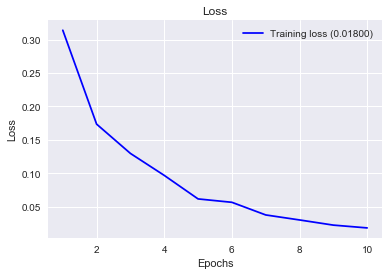

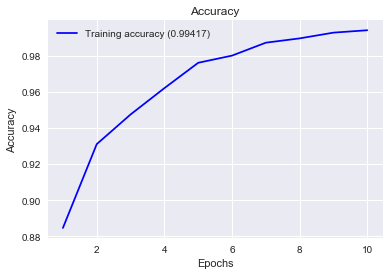

Epoch 1/10
3772/3772 [==============================] - 1s 192us/step - loss: 0.2628 - acc: 0.9128
Epoch 2/10
3772/3772 [==============================] - 1s 138us/step - loss: 0.1464 - acc: 0.9443
Epoch 3/10
3772/3772 [==============================] - 0s 127us/step - loss: 0.1013 - acc: 0.9594
Epoch 4/10
3772/3772 [==============================] - 1s 134us/step - loss: 0.0710 - acc: 0.9753
Epoch 5/10
3772/3772 [==============================] - 1s 137us/step - loss: 0.0468 - acc: 0.9817
Epoch 6/10
3772/3772 [==============================] - 1s 136us/step - loss: 0.0362 - acc: 0.9859
Epoch 7/10
3772/3772 [==============================] - 1s 137us/step - loss: 0.0274 - acc: 0.9907
Epoch 8/10
3772/3772 [==============================] - 1s 144us/step - loss: 0.0164 - acc: 0.9952
Epoch 9/10
3772/3772 [==============================] - 1s 141us/step - loss: 0.0170 - acc: 0.9955
Epoch 10/10
943/943 [==============================] - 0s 95us/step
acc: 35.74%
[49.73488865323436, 35.737009

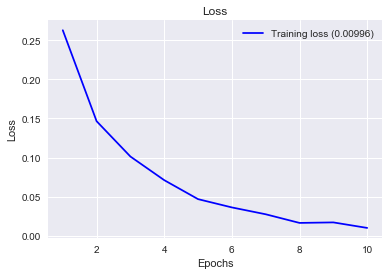

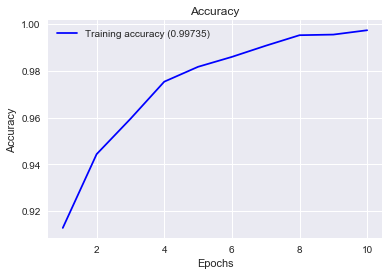

Epoch 1/10
3772/3772 [==============================] - 1s 192us/step - loss: 0.2207 - acc: 0.9207
Epoch 2/10
3772/3772 [==============================] - 1s 136us/step - loss: 0.1438 - acc: 0.9427
Epoch 3/10
3772/3772 [==============================] - 1s 148us/step - loss: 0.1052 - acc: 0.9578
Epoch 4/10
3772/3772 [==============================] - 1s 146us/step - loss: 0.0701 - acc: 0.9722
Epoch 5/10
3772/3772 [==============================] - 1s 133us/step - loss: 0.0526 - acc: 0.9788
Epoch 6/10
3772/3772 [==============================] - 1s 139us/step - loss: 0.0331 - acc: 0.9883
Epoch 7/10
3772/3772 [==============================] - 1s 142us/step - loss: 0.0250 - acc: 0.9915
Epoch 8/10
3772/3772 [==============================] - 1s 134us/step - loss: 0.0151 - acc: 0.9952
Epoch 9/10
3772/3772 [==============================] - 0s 131us/step - loss: 0.0127 - acc: 0.9944
Epoch 10/10
943/943 [==============================] - 0s 111us/step
acc: 39.55%
[49.73488865323436, 35.73700

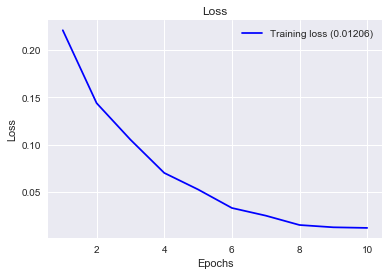

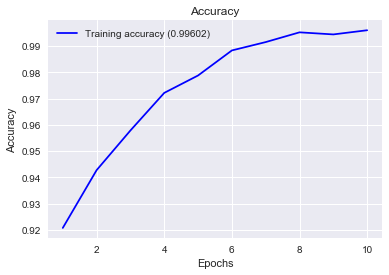

Epoch 1/10
3772/3772 [==============================] - 1s 207us/step - loss: 0.1960 - acc: 0.9284
Epoch 2/10
3772/3772 [==============================] - 1s 143us/step - loss: 0.1269 - acc: 0.9515
Epoch 3/10
3772/3772 [==============================] - 1s 204us/step - loss: 0.0846 - acc: 0.9671
Epoch 4/10
3772/3772 [==============================] - 1s 187us/step - loss: 0.0553 - acc: 0.9785
Epoch 5/10
3772/3772 [==============================] - 1s 145us/step - loss: 0.0422 - acc: 0.9852
Epoch 6/10
3772/3772 [==============================] - 1s 142us/step - loss: 0.0363 - acc: 0.9881
Epoch 7/10
3772/3772 [==============================] - 1s 143us/step - loss: 0.0150 - acc: 0.9963
Epoch 8/10
3772/3772 [==============================] - 1s 137us/step - loss: 0.0169 - acc: 0.9952
Epoch 9/10
3772/3772 [==============================] - 0s 132us/step - loss: 0.0115 - acc: 0.9973
Epoch 10/10
943/943 [==============================] - 0s 128us/step
acc: 48.99%
[49.73488865323436, 35.73700

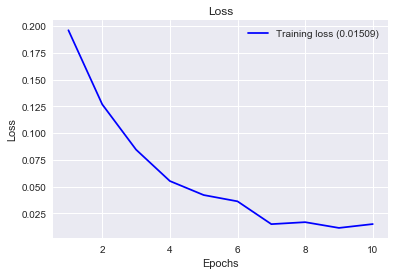

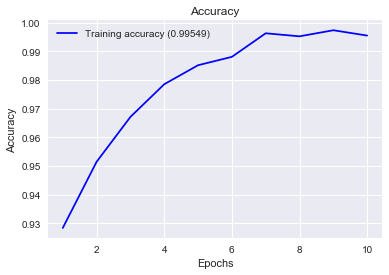

Epoch 1/10
3772/3772 [==============================] - 1s 223us/step - loss: 0.2610 - acc: 0.8971
Epoch 2/10
3772/3772 [==============================] - 1s 144us/step - loss: 0.1772 - acc: 0.9305
Epoch 3/10
3772/3772 [==============================] - 1s 149us/step - loss: 0.1225 - acc: 0.9536
Epoch 4/10
3772/3772 [==============================] - 1s 149us/step - loss: 0.0851 - acc: 0.9666
Epoch 5/10
3772/3772 [==============================] - 1s 146us/step - loss: 0.0600 - acc: 0.9780
Epoch 6/10
3772/3772 [==============================] - 1s 147us/step - loss: 0.0462 - acc: 0.9830
Epoch 7/10
3772/3772 [==============================] - 1s 139us/step - loss: 0.0298 - acc: 0.9897
Epoch 8/10
3772/3772 [==============================] - 1s 139us/step - loss: 0.0275 - acc: 0.9918
Epoch 9/10
3772/3772 [==============================] - 0s 116us/step - loss: 0.0165 - acc: 0.9944
Epoch 10/10
943/943 [==============================] - 0s 116us/step
acc: 51.43%
[49.73488865323436, 35.73700

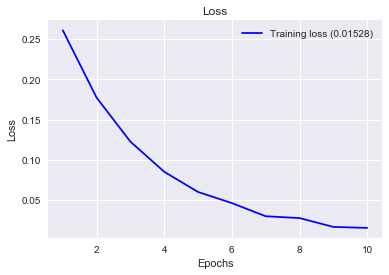

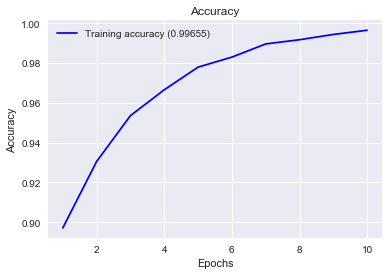

In [19]:
mlf.run_deep_learning_loop(CCLE_features, CCLE_label)

### Read in Data (gCSI Study)

In [22]:
agg_dataset = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/agg_response/combo_response_agg', sep = '\t')

agg_dataset.head()

agg_dataset_single_response = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/agg_response/combined_single_response_agg', sep = '\t')

agg_dataset_single_response.head()

dragon7_descriptors = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/drug_descriptors/combined_dragon7_descriptors', sep = '\t')

dragon7_descriptors.head()

combined_rnaseq_oncogenes = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/rna-seq/combined_rnaseq_data_oncogenes', sep = '\t')
combined_rnaseq_oncogenes.head()

agg_dataset_single_response = agg_dataset_single_response[agg_dataset_single_response['DRUG'].str.contains("gCSI")]

gCSI_10_drugs = agg_dataset_single_response['DRUG'].head(10).values.tolist() #Picking 10 drugs 
dragon7_descriptors = dragon7_descriptors[dragon7_descriptors['NAME'].isin(gCSI_10_drugs)] 
dragon7_descriptors.head()


agg_dataset_single_response = agg_dataset_single_response[agg_dataset_single_response['DRUG'].isin(gCSI_10_drugs)] 
agg_dataset_single_response.tail()

gCSI_10_drug_list = agg_dataset_single_response['CELL'].tolist()

combined_rnaseq_oncogenes = combined_rnaseq_oncogenes[combined_rnaseq_oncogenes['Sample'].isin(gCSI_10_drug_list)] 


combined_rnaseq_oncogenes.tail()

p2_gCSI_merge = pd.merge(combined_rnaseq_oncogenes, agg_dataset_single_response, how='inner', left_on='Sample', right_on='CELL')

p2_gCSI_merge = pd.merge(p2_gCSI_merge, dragon7_descriptors, how='inner', left_on='DRUG', right_on='NAME')

p2_gCSI_merge.head()

gCSI_label = p2_gCSI_merge.loc[:, p2_gCSI_merge.columns == 'AUC1']


gCSI_label['AUC1'] = np.where(gCSI_label['AUC1']<=.5, 1, 0) 

gCSI_merged_num = p2_gCSI_merge.select_dtypes(include=[np.number])
gCSI_merged_num = (gCSI_merged_num - gCSI_merged_num.mean()) / (gCSI_merged_num.max() - gCSI_merged_num.min())
gCSI_features = gCSI_merged_num.loc[:, gCSI_merged_num.columns != 'AUC1'] #Feature Set
gCSI_features = gCSI_features.dropna(axis='columns') #Drop NAs
# gCSI_label = gCSI_label.dropna(axis='columns') #Drop NAs


gCSI_features.head()



AARS     ABCB6     ABCC5     ABCF1     ABCF3     ABHD4     ABHD6  \
0  0.202903  0.193363 -0.057457 -0.004079  0.041449  0.215720  0.123211   
1  0.006607 -0.370993 -0.122591  0.026727 -0.093968 -0.127027 -0.267171   
2 -0.037837 -0.239451 -0.204967  0.050424 -0.010635  0.155387  0.024201   
3 -0.124874 -0.218235 -0.047879 -0.001709  0.044053 -0.066693 -0.008331   
4 -0.041541  0.142444 -0.038300 -0.134410  0.080511  0.034719  0.008642   

       ABI1      ABL1      ABL2     ACAA1     ACAD8     ACAT2     ACBD3  \
0  0.133233 -0.144923  0.030403  0.079065  0.041097  0.004946 -0.065782   
1  0.094615  0.192033  0.114103 -0.134516 -0.348903 -0.003397  0.041601   
2  0.064127  0.405077  0.122914  0.001287  0.028597 -0.016508  0.061735   
3  0.017379  0.220294  0.160359  0.018571  0.068597  0.013289 -0.189943   
4  0.090550 -0.436227  0.336570 -0.048096 -0.198903  0.087187  0.256366   

        ACD      ACLY      ACO1     ACOT9     ACSL3     ACSL6      ACTB  \
0 -0.259552 -0.129073  0.022938  0.037138  0.293102 -0.053749 -0.149359   
1 -0.091103  0.351604  0.168624  0.069836 -0.212274 -0.055811  0.165137   
2  0.136170  0.066580  0.315724  0.127056 -0.162812 -0.053749  0.273245   
3  0.213710  0.040009  0.223786  0.184277 -0.050984 -0.053749  0.265874   
4  0.117453  0.298464  0.088001  0.271470  0.073747 -0.041378  0.310100   

      ACTG1     ACTG2     ACVR1    ACVR1B    ACVR2A    ADAM10     ADAT1  \
0 -0.054254 -0.058246  0.092766  0.145956  0.178800  0.166721 -0.008843   
1  0.194587 -0.031958  0.270577 -0.074884 -0.124702 -0.012572  0.003090   
2  0.162130  0.065834  0.203708 -0.040669  0.079578  0.010155 -0.037483   
3  0.084850 -0.046679 -0.056170  0.169284  0.001757  0.171771  0.069916   
4  0.129672 -0.047730  0.167234 -0.099767 -0.093573  0.075812  0.272780   

      ADCY1      ADH5      ADI1       ADO     ADRB2      AFF1      AFF3  \
0 -0.183975  0.156736 -0.014506  0.162854 -0.283515  0.076685 -0.173372   
1 -0.118924  0.251331 -0.104439  0.088474 -0.263079  0.217594  0.497338   
2 -0.185251  0.073403 -0.095043 -0.046513  0.178338  0.026685 -0.036457   
3 -0.181424  0.021601 -0.011822 -0.220066  0.637466  0.150928  0.209643   
4  0.176994  0.235565 -0.018533  0.080209 -0.208583 -0.041497  0.128187   

       AFF4       AGL      AGO2    AHCTF1     AHNAK       AHR     AKAP8  \
0  0.169644  0.228884  0.272278  0.096043  0.067140  0.447794  0.035134   
1  0.018654 -0.034682 -0.020716  0.058686  0.134090 -0.118828 -0.015792   
2 -0.006099 -0.127705  0.034486 -0.332118  0.222294 -0.163243 -0.108385   
3  0.122614 -0.103157  0.134274 -0.145337  0.317937  0.151697  0.023560   
4  0.216674 -0.087654 -0.114134  0.176502  0.242485 -0.505100 -0.152366   

     AKAP8L     AKAP9    AKR1C4    AKR7A2      AKT1      AKT2      AKT3  \
0 -0.133622  0.336898  0.293657  0.039394  0.144503 -0.044505 -0.395316   
1 -0.077595 -0.298396 -0.038843 -0.175758 -0.212086  0.039132  0.237138   
2 -0.091177 -0.178396 -0.035093 -0.003030  0.263366  0.115495  0.305100   
3 -0.033452 -0.168984 -0.047593  0.178788  0.157423  0.020950  0.309260   
4 -0.086084 -0.044278 -0.023843 -0.042424 -0.036375  0.020950  0.439635   

      ALAS1     ALDH2   ALDH7A1     ALDOA     ALDOC       ALK   ALOX12B  \
0  0.224788  0.474348 -0.595742 -0.043063  0.141442 -0.045170 -0.107551   
1 -0.029088  0.261940  0.044151  0.238096 -0.325639 -0.045170 -0.069816   
2  0.019361 -0.044054  0.200778  0.220705 -0.415080  0.098659 -0.120130   
3  0.052307 -0.452045 -0.042863  0.226502 -0.321912 -0.044198 -0.098117   
4 -0.029088 -0.458354  0.127150  0.098966 -0.130608 -0.029621 -0.076105   

     AMDHD2     AMER1      ANK3   ANKRD10   ANKRD11     ANO10     ANXA7  \
0 -0.153333 -0.006124  0.342786  0.041803  0.224882  0.132511  0.117114   
1  0.211033  0.017008 -0.182354 -0.069962  0.071820  0.012172  0.188896   
2 -0.052209 -0.100430  0.188224 -0.336629 -0.038384  0.239290 -0.145263   
3  0.024837 -0.039932 -0.310845 -0.252315  0.063657  0.256239 -0.066055   
4  0.026443 -0.016800  0

In [ ]:
mlf.run_simple_loop(gCSI_features, gCSI_label, ['LR','NB','RF', 'DT'])  

### Run Keras Deep Learning Models gCSI

Epoch 1/10
2828/2828 [==============================] - 1s 242us/step - loss: 0.2183 - acc: 0.9162
Epoch 2/10
2828/2828 [==============================] - 0s 136us/step - loss: 0.1226 - acc: 0.9434
Epoch 3/10
2828/2828 [==============================] - 0s 137us/step - loss: 0.0774 - acc: 0.9692
Epoch 4/10
2828/2828 [==============================] - 0s 134us/step - loss: 0.0524 - acc: 0.9767
Epoch 5/10
2828/2828 [==============================] - 0s 139us/step - loss: 0.0372 - acc: 0.9823
Epoch 6/10
2828/2828 [==============================] - 0s 129us/step - loss: 0.0277 - acc: 0.9905
Epoch 7/10
2828/2828 [==============================] - 0s 139us/step - loss: 0.0198 - acc: 0.9940
Epoch 8/10
2828/2828 [==============================] - 0s 133us/step - loss: 0.0142 - acc: 0.9947
Epoch 9/10
2828/2828 [==============================] - 0s 144us/step - loss: 0.0134 - acc: 0.9961
Epoch 10/10
708/708 [==============================] - 0s 179us/step
acc: 50.14%
[50.141242958899944]


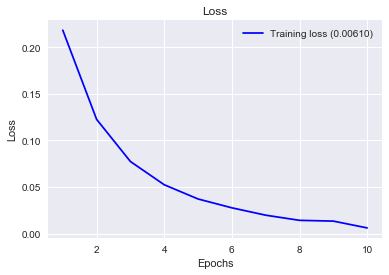

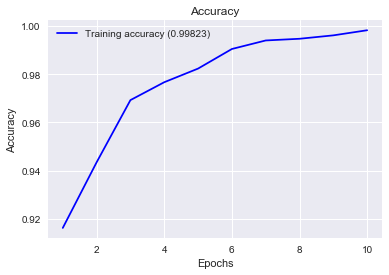

Epoch 1/10
2829/2829 [==============================] - 1s 239us/step - loss: 0.1454 - acc: 0.9406
Epoch 2/10
2829/2829 [==============================] - 0s 130us/step - loss: 0.0872 - acc: 0.9668
Epoch 3/10
2829/2829 [==============================] - 0s 126us/step - loss: 0.0539 - acc: 0.9777
Epoch 4/10
2829/2829 [==============================] - 0s 124us/step - loss: 0.0397 - acc: 0.9830
Epoch 5/10
2829/2829 [==============================] - 0s 128us/step - loss: 0.0257 - acc: 0.9897
Epoch 6/10
2829/2829 [==============================] - 0s 122us/step - loss: 0.0184 - acc: 0.9943
Epoch 7/10
2829/2829 [==============================] - 0s 135us/step - loss: 0.0118 - acc: 0.9954
Epoch 8/10
2829/2829 [==============================] - 0s 132us/step - loss: 0.0056 - acc: 0.9986
Epoch 9/10
2829/2829 [==============================] - 0s 124us/step - loss: 0.0056 - acc: 0.9986
Epoch 10/10
707/707 [==============================] - 0s 165us/step
acc: 63.22%
[50.141242958899944, 63.2248

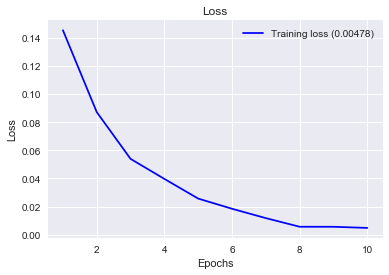

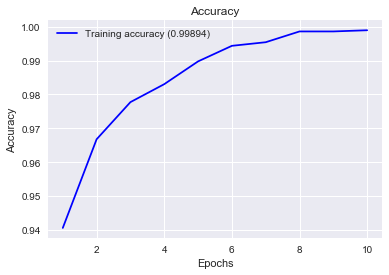

Epoch 1/10
2829/2829 [==============================] - 1s 252us/step - loss: 0.1320 - acc: 0.9565
Epoch 2/10
2829/2829 [==============================] - 0s 132us/step - loss: 0.0577 - acc: 0.9784
Epoch 3/10
2829/2829 [==============================] - 0s 128us/step - loss: 0.0418 - acc: 0.9855
Epoch 4/10
2829/2829 [==============================] - 0s 126us/step - loss: 0.0249 - acc: 0.9922
Epoch 5/10
2829/2829 [==============================] - 0s 124us/step - loss: 0.0173 - acc: 0.9929
Epoch 6/10
2829/2829 [==============================] - 0s 125us/step - loss: 0.0098 - acc: 0.9961
Epoch 7/10
2829/2829 [==============================] - 0s 135us/step - loss: 0.0057 - acc: 0.9979
Epoch 8/10
2829/2829 [==============================] - 0s 144us/step - loss: 0.0050 - acc: 0.9993
Epoch 9/10
2829/2829 [==============================] - 0s 136us/step - loss: 0.0022 - acc: 0.9996
Epoch 10/10
707/707 [==============================] - 0s 209us/step
acc: 81.19%
[50.141242958899944, 63.2248

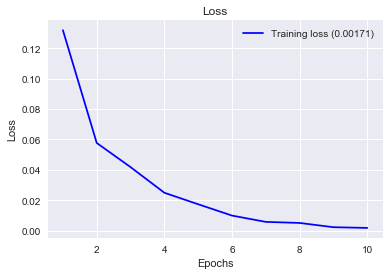

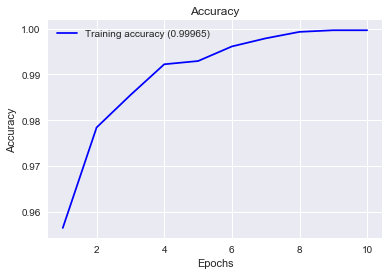

Epoch 1/10
2829/2829 [==============================] - 1s 249us/step - loss: 0.2063 - acc: 0.9183
Epoch 2/10
2829/2829 [==============================] - 0s 116us/step - loss: 0.1239 - acc: 0.9487
Epoch 3/10
2829/2829 [==============================] - 0s 114us/step - loss: 0.0782 - acc: 0.9668
Epoch 4/10
2829/2829 [==============================] - 0s 110us/step - loss: 0.0612 - acc: 0.9753
Epoch 5/10
2829/2829 [==============================] - 0s 109us/step - loss: 0.0350 - acc: 0.9852
Epoch 6/10
2829/2829 [==============================] - 0s 111us/step - loss: 0.0226 - acc: 0.9908
Epoch 7/10
2829/2829 [==============================] - 0s 123us/step - loss: 0.0176 - acc: 0.9940
Epoch 8/10
2829/2829 [==============================] - 0s 126us/step - loss: 0.0146 - acc: 0.9965
Epoch 9/10
2829/2829 [==============================] - 0s 122us/step - loss: 0.0080 - acc: 0.9986
Epoch 10/10
707/707 [==============================] - 0s 188us/step
acc: 45.69%
[50.141242958899944, 63.2248

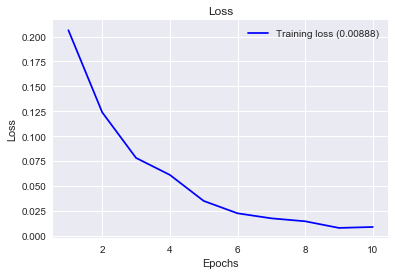

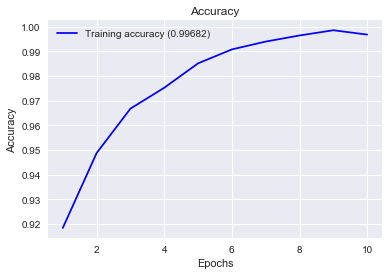

Epoch 1/10
2829/2829 [==============================] - 1s 278us/step - loss: 0.2459 - acc: 0.9130
Epoch 2/10
2829/2829 [==============================] - 0s 128us/step - loss: 0.1391 - acc: 0.9498
Epoch 3/10
2829/2829 [==============================] - 0s 121us/step - loss: 0.0973 - acc: 0.9647
Epoch 4/10
2829/2829 [==============================] - 0s 139us/step - loss: 0.0729 - acc: 0.9753
Epoch 5/10
2829/2829 [==============================] - 0s 137us/step - loss: 0.0515 - acc: 0.9848
Epoch 6/10
2829/2829 [==============================] - 0s 132us/step - loss: 0.0451 - acc: 0.9905
Epoch 7/10
2829/2829 [==============================] - 0s 131us/step - loss: 0.0319 - acc: 0.9936
Epoch 8/10
2829/2829 [==============================] - 0s 132us/step - loss: 0.0322 - acc: 0.9943
Epoch 9/10
2829/2829 [==============================] - 0s 128us/step - loss: 0.0279 - acc: 0.9954
Epoch 10/10
707/707 [==============================] - 0s 197us/step
acc: 51.06%
[50.141242958899944, 63.2248

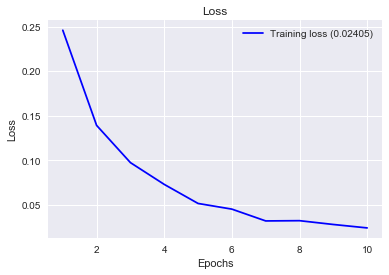

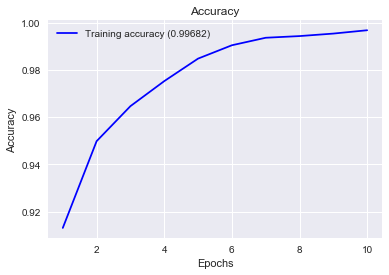

In [22]:
mlf.run_deep_learning_loop(gCSI_features, gCSI_label)

### Read in Data (CTRP Study)

In [24]:
agg_dataset = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/agg_response/combo_response_agg', sep = '\t')

agg_dataset.head()

agg_dataset_single_response = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/agg_response/combined_single_response_agg', sep = '\t')

agg_dataset_single_response.head()

dragon7_descriptors = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/drug_descriptors/combined_dragon7_descriptors', sep = '\t')

dragon7_descriptors.head()

combined_rnaseq_oncogenes = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/rna-seq/combined_rnaseq_data_oncogenes', sep = '\t')
combined_rnaseq_oncogenes.head()

agg_dataset_single_response = agg_dataset_single_response[agg_dataset_single_response['DRUG'].str.contains("CTRP")]

CTRP_10_drugs = agg_dataset_single_response['DRUG'].head(10).values.tolist() #Picking 10 drugs 
dragon7_descriptors = dragon7_descriptors[dragon7_descriptors['NAME'].isin(CTRP_10_drugs)] 
dragon7_descriptors.head()


agg_dataset_single_response = agg_dataset_single_response[agg_dataset_single_response['DRUG'].isin(CTRP_10_drugs)] 
agg_dataset_single_response.tail()

CTRP_10_drug_list = agg_dataset_single_response['CELL'].tolist()

combined_rnaseq_oncogenes = combined_rnaseq_oncogenes[combined_rnaseq_oncogenes['Sample'].isin(CTRP_10_drug_list)] 


combined_rnaseq_oncogenes.tail()

p2_CTRP_merge = pd.merge(combined_rnaseq_oncogenes, agg_dataset_single_response, how='inner', left_on='Sample', right_on='CELL')

p2_CTRP_merge = pd.merge(p2_CTRP_merge, dragon7_descriptors, how='inner', left_on='DRUG', right_on='NAME')

p2_CTRP_merge.head()

CTRP_label = p2_CTRP_merge.loc[:, p2_CTRP_merge.columns == 'AUC1']


CTRP_label['AUC1'] = np.where(CTRP_label['AUC1']<=.5, 1, 0) 

CTRP_merged_num = p2_CTRP_merge.select_dtypes(include=[np.number])
CTRP_merged_num = (CTRP_merged_num - CTRP_merged_num.mean()) / (CTRP_merged_num.max() - CTRP_merged_num.min())
CTRP_features = CTRP_merged_num.loc[:, CTRP_merged_num.columns != 'AUC1'] #Feature Set
CTRP_features = CTRP_features.dropna(axis='columns') #Drop NAs
CTRP_label = CTRP_label.dropna(axis='columns') #Drop NAs


CTRP_features.head()

AARS     ABCB6     ABCC5     ABCF1     ABCF3     ABHD4     ABHD6  \
0  0.081256  0.286035  0.004708 -0.224638  0.053190 -0.093845 -0.093590   
1  0.196430  0.180453 -0.036661  0.001777  0.040169  0.201722  0.138376   
2 -0.013808  0.145258 -0.005278 -0.035959  0.034961  0.108126  0.020979   
3 -0.004667  0.231423 -0.142225  0.077249 -0.105664  0.083495  0.176566   
4 -0.317281 -0.181198 -0.147931 -0.005298 -0.095247 -0.146800 -0.148752   

       ABI1      ABL1      ABL2     ACAA1     ACAD8     ACAT2     ACBD3  \
0  0.030299 -0.034545 -0.010348  0.014954  0.230250  0.127977  0.150361   
1  0.115241 -0.150164  0.028262  0.082855  0.028653  0.004882 -0.044701   
2 -0.176265 -0.064971 -0.016140 -0.088750 -0.093104 -0.030288  0.019496   
3  0.007133  0.089187  0.066872  0.007546  0.062585  0.049431  0.029373   
4 -0.031477  0.166266  0.184632 -0.014676 -0.051187  0.033018 -0.195318   

        ACD      ACLY      ACO1     ACOT9     ACSL3     ACSL6      ACTB  \
0  0.082162  0.229832  0.001363 -0.467653  0.166975  0.285295 -0.098477   
1 -0.219043 -0.119682  0.015183  0.043014  0.264045 -0.041855 -0.118333   
2  0.168909  0.106046  0.070459  0.140347 -0.146211 -0.043542 -0.008224   
3  0.103849  0.067211  0.036539 -0.046319 -0.096761 -0.041855  0.199357   
4 -0.045549  0.261386  0.178499  0.184347  0.022287 -0.016560  0.186721   

      ACTG1     ACTG2     ACVR1    ACVR1B    ACVR2A    ADAM10     ADAT1  \
0 -0.034671 -0.062667 -0.183152  0.116789  0.021304 -0.103996  0.235240   
1 -0.060946 -0.068727  0.102562  0.135941  0.180859  0.124461 -0.006218   
2 -0.105769 -0.062667 -0.044855  0.175613 -0.091868 -0.015820 -0.028997   
3  0.118343  0.601980  0.262136 -0.093881  0.281045  0.040292  0.030229   
4  0.175530 -0.068727  0.032653  0.047022  0.017594  0.050312 -0.060887   

      ADCY1      ADH5      ADI1       ADO     ADRB2      AFF1      AFF3  \
0 -0.150850 -0.018836  0.071600  0.069304  0.224134  0.060250  0.733998   
1 -0.176360  0.142455 -0.011622  0.118809 -0.302397  0.055857 -0.178283   
2  0.178232  0.025519 -0.133769  0.037621 -0.305118 -0.029062  0.356007   
3  0.148895  0.073906 -0.019675 -0.035646  0.002365 -0.018813 -0.068235   
4  0.300680  0.241245 -0.119004 -0.053468  0.629576 -0.130087 -0.049096   

       AFF4       AGL      AGO2    AHCTF1     AHNAK       AHR     AKAP8  \
0  0.022266  0.189808 -0.000533  0.278569  0.023977 -0.034164  0.073581   
1  0.135361  0.253277  0.183561  0.086100  0.065977  0.448363  0.040686   
2 -0.055115 -0.061250  0.030395  0.019155  0.012977 -0.116153 -0.095279   
3  0.182980  0.019145 -0.009369 -0.127289  0.241977  0.346213  0.036300   
4  0.014329 -0.058429  0.036286 -0.058251  0.110977  0.127127  0.029721   

     AKAP8L     AKAP9    AKR1C4    AKR7A2      AKT1      AKT2      AKT3  \
0 -0.040141  0.569460  0.064893 -0.003852  0.104842  0.078669 -0.268966   
1 -0.131822  0.251358  0.297393  0.031778  0.135690 -0.036837 -0.272704   
2 -0.125030 -0.133528 -0.028857 -0.051358 -0.131662 -0.084306  0.116081   
3  0.026073 -0.015777 -0.043857  0.019901  0.199958 -0.025761  0.069352   
4 -0.057119  0.040462 -0.043857  0.012775  0.135690  0.028036  0.136642   

      ALAS1     ALDH2   ALDH7A1     ALDOA     ALDOC       ALK   ALOX12B  \
0  0.066615 -0.173203  0.052328 -0.162741  0.130473 -0.036313  0.322419   
1  0.225105  0.480565 -0.499964 -0.032306  0.135195 -0.039229 -0.075044   
2  0.177935  0.278936  0.088756  0.163346 -0.058429 -0.039229  0.265337   
3 -0.065461 -0.424730  0.183938  0.193237 -0.366576  0.112375 -0.083500   
4  0.011898 -0.411492 -0.047555  0.030194 -0.286292 -0.023680 -0.083500   

     AMDHD2     AMER1      ANK3   ANKRD10   ANKRD11     ANO10     ANXA7  \
0 -0.096187 -0.004957  0.419224 -0.168247  0.029963 -0.147610  0.113790   
1 -0.145947 -0.003000  0.356724  0.034355  0.181949  0.121804  0.111315   
2  0.133347  0.175082 -0.268276 -0.229585 -0.073664 -0.027166  0.046959   
3 -0.033587 -0.071493 -0.226609 -0.155236  0.067959  0.292961  0.071711   
4 -0.097792  0.040053  0

### Run ML Loop CTRP

In [ ]:
mlf.run_simple_loop(CTRP_features, CTRP_label, ['LR','NB','RF', 'DT'])  

### Run Keras Deep Learning Model CTRP

In [ ]:
mlf.run_deep_learning_loop(CTRP_features, CTRP_label)

### Read in Data (GDSC Study)

In [20]:
agg_dataset = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/agg_response/combo_response_agg', sep = '\t')

agg_dataset.head()

agg_dataset_single_response = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/agg_response/combined_single_response_agg', sep = '\t')

agg_dataset_single_response.head()

dragon7_descriptors = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/drug_descriptors/combined_dragon7_descriptors', sep = '\t')

dragon7_descriptors.head()

combined_rnaseq_oncogenes = pd.read_csv('/Users/saptarshighose/Google Drive/MLiC2019/Labs/Lab3/data_frames/rna-seq/combined_rnaseq_data_oncogenes', sep = '\t')
combined_rnaseq_oncogenes.head()

agg_dataset_single_response = agg_dataset_single_response[agg_dataset_single_response['DRUG'].str.contains("GDSC")]

GDSC_10_drugs = agg_dataset_single_response['DRUG'].head(10).values.tolist() #Picking 10 drugs 
dragon7_descriptors = dragon7_descriptors[dragon7_descriptors['NAME'].isin(GDSC_10_drugs)] 
dragon7_descriptors.head()


agg_dataset_single_response = agg_dataset_single_response[agg_dataset_single_response['DRUG'].isin(GDSC_10_drugs)] 
agg_dataset_single_response.tail()

GDSC_10_drug_list = agg_dataset_single_response['CELL'].tolist()

combined_rnaseq_oncogenes = combined_rnaseq_oncogenes[combined_rnaseq_oncogenes['Sample'].isin(GDSC_10_drug_list)] 


combined_rnaseq_oncogenes.tail()

p2_GDSC_merge = pd.merge(combined_rnaseq_oncogenes, agg_dataset_single_response, how='inner', left_on='Sample', right_on='CELL')

p2_GDSC_merge = pd.merge(p2_GDSC_merge, dragon7_descriptors, how='inner', left_on='DRUG', right_on='NAME')

p2_GDSC_merge.head()

GDSC_label = p2_GDSC_merge.loc[:, p2_GDSC_merge.columns == 'AUC1']


GDSC_label['AUC1'] = np.where(GDSC_label['AUC1']<=.5, 1, 0) 

GDSC_merged_num = p2_GDSC_merge.select_dtypes(include=[np.number])
GDSC_merged_num = (GDSC_merged_num - GDSC_merged_num.mean()) / (GDSC_merged_num.max() - GDSC_merged_num.min())
GDSC_features = GDSC_merged_num.loc[:, GDSC_merged_num.columns != 'AUC1'] #Feature Set
GDSC_features = GDSC_features.dropna(axis='columns') #Drop NAs
GDSC_label = GDSC_label.dropna(axis='columns') #Drop NAs


GDSC_features.head()


AARS     ABCB6     ABCC5     ABCF1     ABCF3     ABHD4     ABHD6  \
0  0.076823  0.295243  0.006562 -0.179056  0.062054 -0.071135 -0.070233   
1  0.176982  0.190801 -0.034807  0.003108  0.051766  0.234209  0.133747   
2  0.002101  0.241221 -0.140371  0.063829 -0.063460  0.112071  0.167329   
3 -0.269759 -0.166942 -0.146077 -0.002585 -0.055230 -0.125842 -0.118741   
4 -0.107597 -0.104517  0.027960  0.044853  0.080572 -0.087674  0.095189   

       ABI1      ABL1      ABL2     ACAA1     ACAD8     ACAT2     ACBD3  \
0  0.046383 -0.003286 -0.000993  0.039317  0.236528  0.128565  0.143515   
1  0.131325 -0.093762  0.038222  0.148444  0.019324  0.005470 -0.002781   
2  0.023217  0.093539  0.077438  0.027412  0.055883  0.050019  0.052775   
3 -0.015393  0.153857  0.197046 -0.008302 -0.066698  0.033606 -0.115744   
4 -0.023115 -0.022334 -0.030405  0.120666  0.245130  0.103946 -0.080559   

        ACD      ACLY      ACO1     ACOT9     ACSL3     ACSL6      ACTB  \
0  0.089526  0.165697  0.004201 -0.471375  0.169865  0.272027 -0.095502   
1 -0.161983 -0.078785  0.019760  0.050423  0.256893 -0.060735 -0.111727   
2  0.107635  0.051945  0.043805 -0.040858 -0.066588 -0.060735  0.147860   
3 -0.017114  0.187768  0.203635  0.194837  0.040144 -0.035006  0.137536   
4  0.141840  0.116461  0.108869  0.051785 -0.081367 -0.036721  0.009217   

      ACTG1     ACTG2     ACVR1    ACVR1B    ACVR2A    ADAM10     ADAT1  \
0 -0.034560 -0.063422 -0.172304  0.125438  0.025832 -0.080776  0.232274   
1 -0.058106 -0.069614  0.113410  0.144829  0.185387  0.124260  0.007221   
2  0.102559  0.615629  0.272985 -0.087858  0.285573  0.048721  0.041191   
3  0.153806 -0.069614  0.043502  0.054801  0.022122  0.057713 -0.043734   
4  0.005606  0.039777 -0.106954  0.061726 -0.048379 -0.132934  0.019960   

      ADCY1      ADH5      ADI1       ADO     ADRB2      AFF1      AFF3  \
0 -0.166926 -0.000477  0.129782  0.088270  0.255890  0.057376  0.726695   
1 -0.192436  0.170463 -0.000470  0.122284 -0.271358  0.052984 -0.189971   
2  0.132819  0.097813 -0.013075  0.016161  0.033819 -0.021687 -0.079394   
3  0.284604  0.275164 -0.168537  0.003917  0.661885 -0.132961 -0.060163   
4 -0.182232 -0.019708  0.197009  0.056978 -0.165091 -0.037792 -0.186766   

       AFF4       AGL      AGO2    AHCTF1    AHNAK       AHR     AKAP8  \
0  0.021236  0.133592  0.003680  0.280939  0.05048 -0.023385  0.069087   
1  0.120366  0.182083  0.191933  0.079184  0.09248  0.457849  0.044212   
2  0.162105  0.003204 -0.005356 -0.144500  0.26848  0.355972  0.040895   
3  0.014279 -0.056063  0.041330 -0.072131  0.13748  0.137473  0.035920   
4  0.097757 -0.024813  0.088017  0.048483  0.14448 -0.463063  0.064112   

     AKAP8L     AKAP9    AKR1C4    AKR7A2      AKT1      AKT2      AKT3  \
0 -0.043286  0.557799  0.067187 -0.003219  0.091610  0.051073 -0.270578   
1 -0.134967  0.236307  0.299687  0.030114  0.115325 -0.055965 -0.274313   
2  0.022928 -0.033676 -0.041563  0.019003  0.164732 -0.045701  0.067424   
3 -0.060264  0.023163 -0.041563  0.012336  0.115325  0.004152  0.134651   
4  0.073862 -0.117157 -0.041563  0.030114  0.137064 -0.032505  0.011402   

      ALAS1     ALDH2   ALDH7A1     ALDOA     ALDOC       ALK   ALOX12B  \
0  0.087934 -0.171242  0.061969 -0.141991  0.138809 -0.039048  0.340037   
1  0.252963  0.479873 -0.488383 -0.037870  0.143658 -0.041963 -0.079606   
2 -0.049591 -0.421749  0.193116  0.142174 -0.371494  0.109640 -0.088534   
3  0.030959 -0.408565 -0.037563  0.012022 -0.289070 -0.026414 -0.088534   
4  0.195989  0.144174  0.071336  0.087944  0.276991 -0.040992 -0.081838   

     AMDHD2     AMER1      ANK3   ANKRD10   ANKRD11     ANO10     ANXA7  \
0 -0.066833 -0.004413  0.355528 -0.170168  0.032000 -0.142030  0.099483   
1 -0.117240 -0.002634  0.297928  0.036663  0.186115  0.127383  0.097438   
2 -0.003419 -0.064911 -0.239672 -0.156886  0.070529  0.298540  0.064718   
3 -0.068459  0.036512  0.078728 -0.126525 -0.015286  0.046559 -0.039576   
4  0.155931  0.100569 -0.26367

### Run ML Loop GDSC

In [5]:
mlf.run_simple_loop(GDSC_features, GDSC_label, ['LR','NB','RF', 'DT'])  

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.654994  0.670111   
1                        {'C': 0.01, 'penalty': 'l2'}  0.636857  0.670111   
2                         {'C': 0.1, 'penalty': 'l1'}  0.637140  0.670111   
3                         {'C': 0.1, 'penalty': 'l2'}  0.636712  0.670111   
4                           {'C': 1, 'penalty': 'l1'}  0.642153  0.670111   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.611614  0.658831   
1                        {'C': 0.01, 'penalty': 'l2'}  0.624662  0.658831   
2                         {'C': 0.1, 'penalty': 'l1'}  0.617500  0.658831   
3                         {'C': 0.1, 'penalty': 'l2'}  0.627751  0.658831   
4                           {'C': 1, 'penalty': 'l1'}  0.620111  0.658831   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.657889  0.662649   
1                        {'C': 0.01, 'penalty': 'l2'}  0.659870  0.662649   
2                         {'C': 0.1, 'penalty': 'l1'}  0.652417  0.662649   
3                         {'C': 0.1, 'penalty': 'l2'}  0.661959  0.662649   
4                           {'C': 1, 'penalty': 'l1'}  0.662892  0.662649   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.661828  0.668073   
1                        {'C': 0.01, 'penalty': 'l2'}  0.651809  0.668073   
2                         {'C': 0.1, 'penalty': 'l1'}  0.657030  0.668073   
3                         {'C': 0.1, 'penalty': 'l2'}  0.653993  0.668073   
4                           {'C': 1, 'penalty': 'l1'}  0.656523  0.668073   
5   

LR
NB
RF
DT


Model Type                                         Classifier  \
0          LR  LogisticRegression(C=1, class_weight=None, dua...   
1          LR  LogisticRegression(C=1, class_weight=None, dua...   
2          LR  LogisticRegression(C=1, class_weight=None, dua...   
3          LR  LogisticRegression(C=1, class_weight=None, dua...   
4          LR  LogisticRegression(C=1, class_weight=None, dua...   
5          LR  LogisticRegression(C=1, class_weight=None, dua...   
6          NB                            GaussianNB(priors=None)   
7          RF  (DecisionTreeClassifier(class_weight=None, cri...   
8          RF  (DecisionTreeClassifier(class_weight=None, cri...   
9          RF  (DecisionTreeClassifier(class_weight=None, cri...   
10         RF  (DecisionTreeClassifier(class_weight=None, cri...   
11         RF  (DecisionTreeClassifier(class_weight=None, cri...   
12         RF  (DecisionTreeClassifier(class_weight=None, cri...   
13         RF  (DecisionTreeClassifier(class_weight=None, cri...   
14         RF  (DecisionTreeClassifier(class_weight=None, cri...   
15         DT  DecisionTreeClassifier(class_weight=None, crit...   
16         DT  DecisionTreeClassifier(class_weight=None, crit...   
17         DT  DecisionTreeClassifier(class_weight=None, crit...   
18         DT  DecisionTreeClassifier(class_weight=None, crit...   
19         DT  DecisionTreeClassifier(class_weight=None, crit...   
20         DT  DecisionTreeClassifier(class_weight=None, crit...   
21         DT  DecisionTreeClassifier(class_weight=None, crit...   
22         DT  DecisionTreeClassifier(class_weight=None, crit...   
23         DT  DecisionTreeClassifier(class_weight=None, crit...   
24         DT  DecisionTreeClassifier(class_weight=None, crit...   
25         DT  DecisionTreeClassifier(class_weight=None, crit...   
26         DT  DecisionTreeClassifier(class_weight=None, crit...   
27         DT  DecisionTreeClassifier(class_weight=None, crit...   
28         DT  DecisionTreeClassifier(class_weight=None, crit...   
29         DT  DecisionTreeClassifier(class_weight=None, crit...   
30         DT  DecisionTreeClassifier(class_weight=None, crit...   
31         DT  DecisionTreeClassifier(class_weight=None, crit...   
32         DT  DecisionTreeClassifier(class_weight=None, crit...   
33         DT  DecisionTreeClassifier(class_weight=None, crit...   
34         DT  DecisionTreeClassifier(class_weight=None, crit...   
35         DT  DecisionTreeClassifier(class_weight=None, crit...   
36         DT  DecisionTreeClassifier(class_weight=None, crit...   
37         DT  DecisionTreeClassifier(class_weight=None, crit...   
38         DT  DecisionTreeClassifier(class_weight=None, crit...   
39         DT  DecisionTreeClassifier(class_weight=None, crit...   
40         DT  DecisionTreeClassifier(class_weight=None, crit...   
41         DT  DecisionTreeClassifier(class_weight=None, crit...   
42         DT  DecisionTreeClassifier(class_weight=None, crit...   
43         DT  DecisionTreeClassifier(class_weight=None, crit...   
44         DT  DecisionTreeClassifier(class_weight=None, crit...   
45         DT  DecisionTreeClassifier(class_weight=None, crit...   
46         DT  DecisionTreeClassifier(class_weight=None, crit...   
47         DT  DecisionTreeClassifier(class_weight=None, crit...   
48         DT  DecisionTreeClassifier(class_weight=None, crit...   
49         DT  DecisionTreeClassifier(class_weight=None, crit...   
50         DT  DecisionTreeClassifier(class_weight=None, crit...   

                                           Parameters   AUC-ROC  Baseline  \
0                        {'C': 0.01, 'penalty': 'l1'}  0.646504  0.692612   
1                        {'C': 0.01, 'penalty': 'l2'}  0.649165  0.692612   
2                         {'C': 0.1, 'penalty': 'l1'}  0.648946  0.692612   
3                         {'C': 0.1, 'penalty': 'l2'}  0.649640  0.692612   
4                           {'C': 1, 'penalty': 'l1'}  0.643740  0.692612   
5   

lr_model1:  0.6465657567732442
lr_model2:  0.6444725452654863
lr_model3:  0.6426067469602377
lr_model4:  0.6460109415687093
lr_model5:  0.6450837820330945
lr_model6:  0.6460923015607989

nb_model1:  0.5230475347125714

rf_model1:  0.6558783015963654
rf_model2:  0.656848042037613
rf_model3:  0.6564333515606293
rf_model4:  0.6552951919742915
rf_model5:  0.6477188887965412
rf_model6:  0.6499424791514244
rf_model7:  0.646330459973357
rf_model8:  0.6507532399452485



### Run Keras Deep Learning Model GDSC

Epoch 1/10
4464/4464 [==============================] - 1s 255us/step - loss: 0.2126 - acc: 0.9223
Epoch 2/10
4464/4464 [==============================] - 1s 153us/step - loss: 0.1229 - acc: 0.9527
Epoch 3/10
4464/4464 [==============================] - 1s 151us/step - loss: 0.0974 - acc: 0.9617
Epoch 4/10
4464/4464 [==============================] - 1s 149us/step - loss: 0.0681 - acc: 0.9718
Epoch 5/10
4464/4464 [==============================] - 1s 149us/step - loss: 0.0593 - acc: 0.9794
Epoch 6/10
4464/4464 [==============================] - 1s 144us/step - loss: 0.0396 - acc: 0.9834
Epoch 7/10
4464/4464 [==============================] - 1s 145us/step - loss: 0.0338 - acc: 0.9872
Epoch 8/10
4464/4464 [==============================] - 1s 147us/step - loss: 0.0289 - acc: 0.9904
Epoch 9/10
4464/4464 [==============================] - 1s 148us/step - loss: 0.0214 - acc: 0.9924
Epoch 10/10
1117/1117 [==============================] - 0s 188us/step
acc: 62.58%
[62.578334769395816]


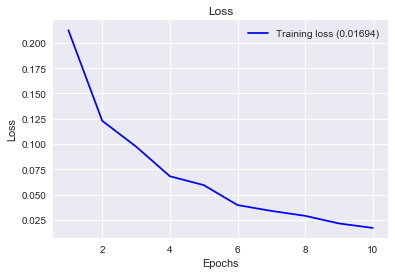

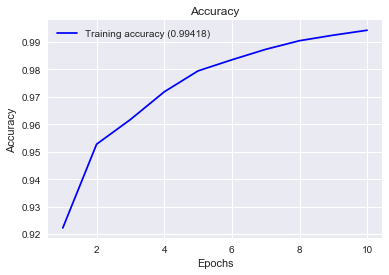

Epoch 1/10
4465/4465 [==============================] - 1s 250us/step - loss: 0.2448 - acc: 0.9212
Epoch 2/10
4465/4465 [==============================] - 1s 145us/step - loss: 0.1510 - acc: 0.9494
Epoch 3/10
4465/4465 [==============================] - 1s 147us/step - loss: 0.1015 - acc: 0.9651
Epoch 4/10
4465/4465 [==============================] - 1s 147us/step - loss: 0.0842 - acc: 0.9718
Epoch 5/10
4465/4465 [==============================] - 1s 148us/step - loss: 0.0602 - acc: 0.9805
Epoch 6/10
4465/4465 [==============================] - 1s 149us/step - loss: 0.0493 - acc: 0.9828
Epoch 7/10
4465/4465 [==============================] - 1s 147us/step - loss: 0.0357 - acc: 0.9888
Epoch 8/10
4465/4465 [==============================] - 1s 148us/step - loss: 0.0325 - acc: 0.9904
Epoch 9/10
4465/4465 [==============================] - 1s 146us/step - loss: 0.0280 - acc: 0.9906
Epoch 10/10
1116/1116 [==============================] - 0s 172us/step
acc: 11.65%
[62.578334769395816, 11.64

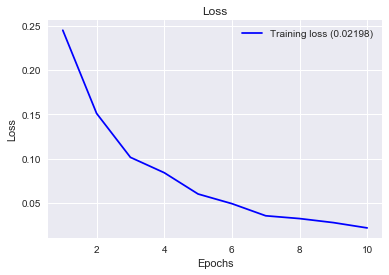

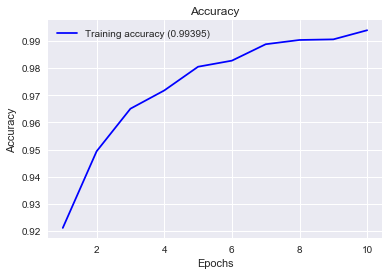

Epoch 1/10
4465/4465 [==============================] - 1s 245us/step - loss: 0.2176 - acc: 0.9124
Epoch 2/10
4465/4465 [==============================] - 1s 154us/step - loss: 0.1369 - acc: 0.9449
Epoch 3/10
4465/4465 [==============================] - 1s 143us/step - loss: 0.1091 - acc: 0.9543
Epoch 4/10
4465/4465 [==============================] - 1s 152us/step - loss: 0.0772 - acc: 0.9675
Epoch 5/10
4465/4465 [==============================] - 1s 155us/step - loss: 0.0618 - acc: 0.9754
Epoch 6/10
4465/4465 [==============================] - 1s 147us/step - loss: 0.0491 - acc: 0.9814
Epoch 7/10
4465/4465 [==============================] - 1s 143us/step - loss: 0.0349 - acc: 0.9854
Epoch 8/10
4465/4465 [==============================] - 1s 147us/step - loss: 0.0278 - acc: 0.9901
Epoch 9/10
4465/4465 [==============================] - 1s 142us/step - loss: 0.0210 - acc: 0.9933
Epoch 10/10
1116/1116 [==============================] - 0s 192us/step
acc: 49.82%
[62.578334769395816, 11.64

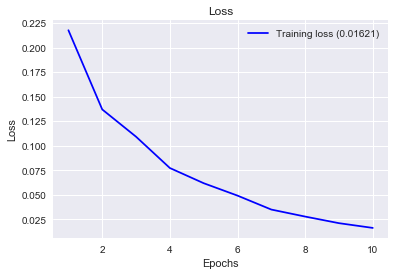

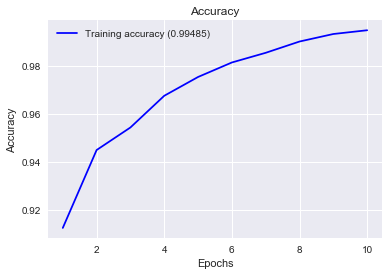

Epoch 1/10
4465/4465 [==============================] - 1s 247us/step - loss: 0.2754 - acc: 0.8985
Epoch 2/10
4465/4465 [==============================] - 1s 147us/step - loss: 0.1618 - acc: 0.9373
Epoch 3/10
4465/4465 [==============================] - 1s 146us/step - loss: 0.1133 - acc: 0.9550
Epoch 4/10
4465/4465 [==============================] - 1s 146us/step - loss: 0.0868 - acc: 0.9664
Epoch 5/10
4465/4465 [==============================] - 1s 142us/step - loss: 0.0685 - acc: 0.9736
Epoch 6/10
4465/4465 [==============================] - 1s 145us/step - loss: 0.0551 - acc: 0.9796
Epoch 7/10
4465/4465 [==============================] - 1s 142us/step - loss: 0.0419 - acc: 0.9854
Epoch 8/10
4465/4465 [==============================] - 1s 146us/step - loss: 0.0298 - acc: 0.9895
Epoch 9/10
4465/4465 [==============================] - 1s 162us/step - loss: 0.0271 - acc: 0.9908
Epoch 10/10
1116/1116 [==============================] - 0s 201us/step
acc: 47.58%
[62.578334769395816, 11.64

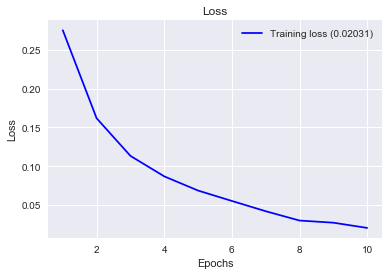

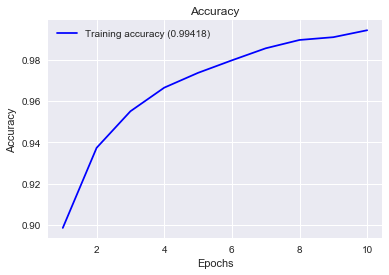

Epoch 1/10
4465/4465 [==============================] - 1s 260us/step - loss: 0.2367 - acc: 0.9102
Epoch 2/10
4465/4465 [==============================] - 1s 150us/step - loss: 0.1564 - acc: 0.9393
Epoch 3/10
4465/4465 [==============================] - 1s 140us/step - loss: 0.1103 - acc: 0.9550
Epoch 4/10
4465/4465 [==============================] - 1s 115us/step - loss: 0.0886 - acc: 0.9617
Epoch 5/10
4465/4465 [==============================] - 1s 120us/step - loss: 0.0708 - acc: 0.9704
Epoch 6/10
4465/4465 [==============================] - 1s 114us/step - loss: 0.0555 - acc: 0.9789
Epoch 7/10
4465/4465 [==============================] - 1s 118us/step - loss: 0.0453 - acc: 0.9819
Epoch 8/10
4465/4465 [==============================] - 1s 145us/step - loss: 0.0350 - acc: 0.9866
Epoch 9/10
4465/4465 [==============================] - 1s 148us/step - loss: 0.0338 - acc: 0.9868
Epoch 10/10
1116/1116 [==============================] - 0s 233us/step
acc: 53.58%
[62.578334769395816, 11.64

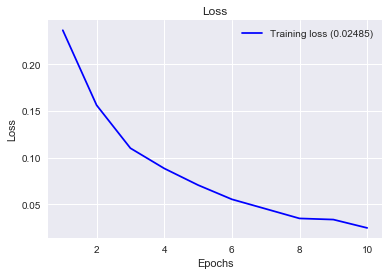

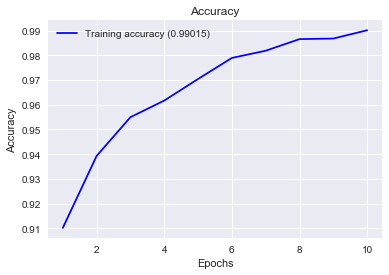

In [34]:
mlf.run_deep_learning_loop(GDSC_features, GDSC_label)

### Feature Selection 100 Most Important Features CCLE

In [44]:
from sklearn import preprocessing

x = CCLE_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
CCLE_features = pd.DataFrame(x_scaled)

selector = SelectKBest(chi2, k=100)
selector.fit(CCLE_features, CCLE_label)

feature_selection_100_CCLE = CCLE_features.columns[selector.get_support(indices=True)]

feature_selection_100_CCLE_list = feature_selection_100_CCLE.tolist()
print(feature_selection_100_CCLE_list)

[1947, 1948, 2000, 2003, 2009, 2012, 2013, 2099, 2101, 2106, 2107, 2108, 2109, 2114, 2115, 2170, 2172, 2174, 2175, 2237, 2245, 2283, 2289, 2292, 2295, 2300, 2301, 2302, 2303, 2307, 2316, 2319, 2320, 2321, 2327, 2335, 2338, 2341, 2342, 2344, 2345, 2355, 2356, 2365, 2367, 2369, 2370, 2391, 2404, 2414, 2420, 2427, 2436, 2441, 2445, 2452, 2453, 2460, 2461, 2462, 2463, 2464, 2465, 2471, 2472, 2473, 2474, 2486, 2487, 2501, 2502, 2503, 2504, 2505, 2508, 2509, 2517, 2543, 2578, 2623, 2641, 2654, 2672, 2680, 2698, 2707, 2717, 2727, 2731, 2740, 2749, 2760, 2766, 2776, 2782, 2784, 2796, 2801, 2803, 2811]


### Feature Selection 100 Most Important Features CTRP

In [ ]:
from sklearn import preprocessing

x = CTRP_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
CTRP_features = pd.DataFrame(x_scaled)

selector = SelectKBest(chi2, k=100)
selector.fit(CTRP_features, CTRP_label)

feature_selection_100_CTRP = CTRP_features.columns[selector.get_support(indices=True)]

feature_selection_100_CTRP_list = feature_selection_100_CTRP.tolist()
print(feature_selection_100_CTRP_list)

### Feature Selection 100 Most Important Features GDSC

In [21]:
from sklearn import preprocessing

x = GDSC_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
GDSC_features = pd.DataFrame(x_scaled)

selector = SelectKBest(chi2, k=100)
selector.fit(GDSC_features, GDSC_label)

feature_selection_100_GDSC = GDSC_features.columns[selector.get_support(indices=True)]

feature_selection_100_GDSC_list = feature_selection_100_GDSC.tolist()
print(feature_selection_100_GDSC_list)

[814, 899, 1183, 1387, 1875, 1945, 1947, 1948, 1985, 1986, 1987, 1989, 1991, 1996, 1999, 2000, 2001, 2002, 2006, 2009, 2011, 2012, 2013, 2022, 2023, 2024, 2038, 2040, 2042, 2129, 2169, 2278, 2289, 2290, 2292, 2293, 2301, 2305, 2317, 2318, 2322, 2326, 2328, 2330, 2331, 2337, 2338, 2339, 2343, 2348, 2350, 2354, 2358, 2367, 2370, 2375, 2376, 2398, 2399, 2403, 2407, 2414, 2422, 2423, 2426, 2430, 2437, 2439, 2456, 2457, 2488, 2498, 2499, 2500, 2501, 2502, 2506, 2507, 2521, 2528, 2556, 2564, 2566, 2592, 2604, 2624, 2625, 2678, 2688, 2705, 2716, 2729, 2735, 2740, 2746, 2747, 2753, 2767, 2787, 2789]


### Feature Selection 100 Most Important Features gCSI

In [23]:
from sklearn import preprocessing

x = gCSI_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
gCSI_features = pd.DataFrame(x_scaled)

selector = SelectKBest(chi2, k=100)
selector.fit(gCSI_features, gCSI_label)

feature_selection_100_gCSI = gCSI_features.columns[selector.get_support(indices=True)]

feature_selection_100_gCSI_list = feature_selection_100_gCSI.tolist()
print(feature_selection_100_gCSI_list)

[1947, 1948, 1974, 1996, 2000, 2002, 2005, 2009, 2011, 2186, 2248, 2253, 2257, 2267, 2268, 2280, 2290, 2293, 2301, 2314, 2315, 2321, 2332, 2375, 2399, 2409, 2422, 2424, 2428, 2431, 2432, 2438, 2439, 2451, 2452, 2500, 2505, 2508, 2510, 2516, 2526, 2535, 2540, 2544, 2549, 2555, 2560, 2569, 2570, 2579, 2585, 2588, 2593, 2597, 2600, 2602, 2607, 2609, 2614, 2616, 2622, 2627, 2630, 2631, 2632, 2644, 2646, 2653, 2665, 2676, 2681, 2685, 2692, 2695, 2703, 2709, 2714, 2715, 2717, 2723, 2725, 2731, 2733, 2734, 2741, 2745, 2748, 2750, 2757, 2759, 2764, 2766, 2773, 2778, 2781, 2782, 2783, 2795, 2796, 2798]
